In [1]:
import re
import sys
from time import time, sleep
from pprint import pprint
from functools import partial
from multiprocessing import Pool

import numpy as np
import pandas as pd
import optuna
import matplotlib.pyplot as plt

FILENAME = "main.cpp"

In [2]:
!cp ../answer/{FILENAME} ./{FILENAME}

In [2]:
#!g++ {FILENAME} -std=gnu++17 -Wall -Wextra -O2 -DONLINE_JUDGE -o {FILENAME}.out
!g++ {FILENAME} -std=gnu++17 -Wall -Wextra -O2 -o {FILENAME}.out

main.cpp:49: warning: ignoring #pragma clang attribute [-Wunknown-pragmas]
   49 | #pragma clang attribute push (__attribute__((target("arch=skylake"))),apply_to=function)
      | 
main.cpp:1824: warning: ignoring #pragma clang attribute [-Wunknown-pragmas]
 1824 | #pragma clang attribute pop
      | 
main.cpp: In function ‘void test::TestBitBoardGetSpeed()’:
main.cpp:855:9: warning: unused variable ‘t0’ [-Wunused-variable]
  855 |  double t0;
      |         ^~
main.cpp: In function ‘void globals::UpdateValueTable()’:
main.cpp:962:15: warning: unused variable ‘vm’ [-Wunused-variable]
  962 |   const auto& vm = v_modified[idx_RCSEV];
      |               ^~
main.cpp: In member function ‘void State::RecalcFutureScore()’:
main.cpp:1068:14: warning: unused variable ‘old_subscore2’ [-Wunused-variable]
 1068 |   const auto old_subscore2 = subscore2;
      |              ^~~~~~~~~~~~~
main.cpp: In function ‘void Solve()’:
main.cpp:1631:54: warning: suggest parentheses around ‘-’ in operand 

In [4]:
# テストケース生成
SEED = 0
N_TESTCASES = 500

# !mkdir in
# for i in range(N_TESTCASES):
#     filename = f"{i:04d}.txt"
#     seed = SEED + i
#     !python3 ../A/tester/generator.py {seed} > ./in/{filename}
# !ls in

In [5]:
TESTCASE_DIRECTORY = "./in/"
TESTCASES = [f"{i:04d}.txt" for i in range(N_TESTCASES)]

In [6]:
# 速度チェック
# 並列実行すると半分くらいの速度に

!mkdir out

def parallel(i):
    testcase = TESTCASES[i]
    i = f"{i:04d}"
    t0 = time()
    !./{FILENAME}.out < {TESTCASE_DIRECTORY}{testcase} > ./out/{testcase}
    t = time() - t0
    score = !python3 ../A/tester/judge.py {TESTCASE_DIRECTORY}{testcase} ./out/{testcase}
    print(i, f"time:{t:.4f}", *score)
    score = int(score[0].split(":")[-1])
    return score, t

parallel(0)

mkdir: cannot create directory ‘out’: File exists
elapsed_time=0.011507  cum_base_sec/elapsed_time=8.23256e+09  modified=3.98011e+09
remaining_time=4.93091
turn=49
time / width = 1.79435e-06
beam_width=234
q.size()=525

elapsed_time=0.0281804  cum_base_sec/elapsed_time=1.06507e+10  modified=6.60896e+09
remaining_time=4.91424
turn=99
time / width = 1.16627e-06
beam_width=437
q.size()=878

elapsed_time=0.0593  cum_base_sec/elapsed_time=1.09636e+10  modified=8.32694e+09
remaining_time=4.88312
turn=149
time / width = 1.31478e-06
beam_width=596
q.size()=1002

elapsed_time=0.099634  cum_base_sec/elapsed_time=1.08352e+10  modified=9.07929e+09
remaining_time=4.84278
turn=199
time / width = 1.55397e-06
beam_width=596
q.size()=1021

elapsed_time=0.14473  cum_base_sec/elapsed_time=1.06545e+10  modified=9.39233e+09
remaining_time=4.79769
turn=249
time / width = 1.83065e-06
beam_width=596
q.size()=1024

elapsed_time=0.199262  cum_base_sec/elapsed_time=1.02229e+10  modified=9.3156e+09
remaining_time

(5356080, 2.786996603012085)

In [7]:
# もとのスコアの確認

scores = []
times = []

!mkdir out

def parallel(i):
    testcase = TESTCASES[i]
    i = f"{i:04d}"
    t0 = time()
    if i == "0123":
        !./{FILENAME}.out < {TESTCASE_DIRECTORY}{testcase} > ./out/{testcase}
    else:
        !./{FILENAME}.out < {TESTCASE_DIRECTORY}{testcase} > ./out/{testcase} 2> /dev/null
    t = time() - t0
    score = !python3 ../A/tester/judge.py {TESTCASE_DIRECTORY}{testcase} ./out/{testcase}
    print(i, f"time:{t:.4f}", *score)
    score = int(score[0].split(":")[-1])
    return score, t

# for i in range(200):
#     score, t = parallel(i)
#     scores.append(score)
#     times.append(t)

with Pool(30) as p:
    for score, t in p.map(parallel, range(N_TESTCASES)):
        scores.append(score)
        times.append(t)

np.mean(scores) * 50 / 1e6, np.std(scores) * 50 / 1e6

mkdir: cannot create directory ‘out’: File exists
0035 time:3.0411 score:5098610
0130 time:3.2154 score:5250204
0010 time:4.3346 score:4918255
0000 time:4.5143 score:5309371
0030 time:4.6100 score:4651291
0075 time:4.6138 score:4888706
0045 time:4.5670 score:4967965
0040 0090time:4.5820  time:4.7036score:4884694 
score:5624593
0120 time:4.5916 score:4979686
0070 time:4.7375 score:5046505
0115 time:4.6362 score:5264300
01000110 0085 time:4.7553 time:4.7256  time:4.6373score:4983384 
score:5074203
score:5271572
0145 time:4.7664 score:5770078
0025 time:4.7998 score:4823911
0060 time:4.8056 score:5797033
0080 time:4.7768 score:5273895
0135 time:4.8084 score:5846212
0105 time:4.8188 score:55516260005 time:4.8354 score:5038844

0140 time:4.8226 0055score:4974968 time:4.9138 
score:4948121
0065 time:4.8518 score:5230397
0020 time:4.8821 score:5599674
0095 time:4.9151 score:5376404
0125 time:4.9341 score:5068936
0015 time:4.9463 score:5124243
0050 time:5.0361 score:5762738
0036 time:3.7365 sco

0069 time:4.8860 score:5331504
0155 time:4.5589 score:5443081
0165 time:4.5865 score:5263596
0170 time:4.3968 score:5056206
0175 time:4.4130 score:5037633
0250 time:3.6167 score:5130978
0180 time:4.8795 score:5011734
0185 time:4.8098 score:5467189
0225 time:3.9850 score:5445142
0200 time:4.4909 score:5244040
0240 time:4.1793 score:5076089
0190 time:5.1731 score:5073812
0195 time:4.8569 score:5402326
0270 time:3.8959 score:5923169
0215 time:4.4627 score:4730371
0235 time:4.4582 score:5276769
0230 time:4.6000 score:6306664
0205 time:4.7291 score:5298821
0210 time:4.7403 score:4991524
0255 time:4.6512 score:4779145
0245 time:4.8375 score:5445684
0260 time:4.5988 score:4526374
0220 time:4.9525 score:5603750
0275 time:4.5649 score:5613487
0265 time:4.8796 score:5081651
0161 time:4.6163 score:4958226
0280 time:4.6933 score:4712027
0290 time:4.6263 score:5061665
0295 time:4.6199 score:5140438
0285 time:4.7868 score:5288402
0166 time:3.9413 score:4786211
0151 time:4.9282 score:5282574
0156 tim

0388 time:4.5984 score:5198311
0423 time:4.5593 score:4793950
0309 time:4.9545 score:5274059
0324 time:4.7950 score:4370903
0438 time:4.3188 score:4620371
0443 time:4.3558 score:5004228
0433 time:4.2790 score:4925195
0448 time:4.5368 score:4746438
0314 time:4.9798 score:5235509
0319 time:4.7741 score:5258181
0334 time:4.4691 score:4929774
0329 time:5.0000 score:4633211
0344 time:4.5453 score:5000795
0414 time:4.06360364  time:4.2557score:5059276 score:5056832

0359 time:5.0660 score:4919964
0374 time:4.6244 score:5057481
0339 time:4.9395 score:4846569
0394 time:4.7926 score:5069281
0379 time:4.8333 score:4967948
0349 time:4.8288 score:5190907
0450 time:5.0736 score:5551008
0354 time:4.5431 score:5195744
0404 time:4.7024 score:5738960
0384 time:4.6687 score:5338543
0369 time:4.3527 score:4425723
0409 time:4.7577 score:5351602
0419 time:4.6930 score:57442440460
 time:3.4686 score:5055408
0429 time:4.5538 score:5823777
0389 time:4.2535 score:5499929
0399 time:4.7722 score:5609443
0439 tim

(260.898088, 18.068150092509082)

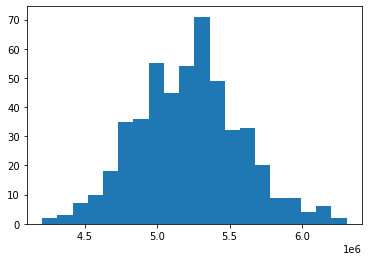

In [8]:
plt.hist(scores, bins=20)
plt.show()

In [9]:
# ここでエラー出力は何かおかしいかもしれない


# パラメータ抽出
with open(FILENAME) as f:
    answer = f.read()


variables_optimize = []

for left, value, right, options in re.findall(r"^([^/\n]*=\s*)(.+?)(\s*;\s*//(?:.*\W)?OPTIMIZE(\W.*))$", answer, re.MULTILINE):
    name = left.replace("=", "").strip().split()[-1]
    
    searched = re.search(r".*\[(?P<min>.*),(?P<max>.*)\].*", options)
    if searched:
        min_value = max_value = None
        try:
            min_value = eval(searched.group("min"))
            max_value = eval(searched.group("max"))
            assert min_value <= max_value
        except Exception as e:
            print(f"searched={searched}", file=sys.stderr)
            print(e, file=sys.stderr)
            continue
        log = "LOG" in options  # 雑、直したほうが良い
        if type(min_value) != type(max_value):
            print(f"searched={searched}", file=sys.stderr)
            print("types not matched", file=sys.stderr)
            continue
        if isinstance(min_value, int):
            method = "suggest_int"
        elif isinstance(min_value, float):
            method = "suggest_float"
        else:
            print(f"searched={searched}", file=sys.stderr)
            print(f"unknown type ({type(min_value)})", file=sys.stderr)
            continue
        variables_optimize.append({
            "name": name,
            "method": method,
            "min": min_value,
            "max": max_value,
            "log": log,
            "left": left,
            "right": right,
        })
    elif searched := re.search(r".*\{(?P<choices>.*?)\}.*", options):
        choices = list(map(lambda x: x.strip(), searched.group("choices").split(",")))
        variables_optimize.append({
            "name": name,
            "method": "suggest_categorical",
            "choices": choices,
            "left": left,
            "right": right,
        })
    else:
        print(f"searched={searched}", file=sys.stderr)
        print(f"pattern was matched but options are incorrect.", file=sys.stderr)

print(len(variables_optimize), "variables were found.")
if globals().get("pd"):
    display(pd.DataFrame(variables_optimize))
else:
    pprint(variables_optimize)

9 variables were found.


,name,method,min,max,log,left,right,choices
0,hash_table_size,suggest_int,7.000,12.000,False,constexpr int hash_table_size =,"; // OPTIMIZE [7, 12]",NaN
1,K_START,suggest_float,0.040,0.100,True,constexpr double K_START =,"; // OPTIMIZE [0.04, 0.1] LOG",NaN
2,K_END,suggest_float,0.030,0.100,True,constexpr double K_END =,"; // OPTIMIZE [0.03, 0.1] LOG",NaN
3,K_H,suggest_float,0.001,0.999,False,constexpr double K_H =,"; // OPTIMIZE [0.001, 0.999]",NaN
4,PURCHASE_TURN_LIMIT,suggest_int,810.000,850.000,False,constexpr short PURCHASE_TURN_LIMIT =,"; // OPTIMIZE [810, 850]",NaN
5,ROUGH_HASH,suggest_categorical,NaN,NaN,NaN,constexpr int ROUGH_HASH =,"; // OPTIMIZE {0, 0b00010001, 0b00110011}","[0, 0b00010001, 0b00110011]"
6,TARGET_BEAM_WIDTH_INCREASE_RATE,suggest_float,0.250,4.000,True,constexpr double TARGET_BEAM_WIDTH_INCREASE_RA...,"; // OPTIMIZE [0.25, 4.0] LOG",NaN
7,TARGET_BEAM_WIDTH_HALF_PROGRES_RATE,suggest_float,0.020,0.980,False,constexpr double TARGET_BEAM_WIDTH_HALF_PROGRE...,"; // OPTIMIZE [0.02, 0.98]",NaN
8,MAX_BEAM_WIDTH,suggest_int,400.000,4000.000,True,constexpr auto MAX_BEAM_WIDTH =,"; // OPTIMIZE [400, 400...",NaN


In [10]:
def escape(string):  # 正規表現の中でそのまま使いたい文字列をエスケープ
    res = !echo '{string}' | sed -e 's/[]\/$*.^[]/\\&/g'
    return res[0]

def escape_sed(string):  # sed の置換後の文字列用のエスケープ
    res = !echo '{string}' | sed -e 's/[\/&]/\\&/g'
    return res[0]


def objective_with_index(trial, n_internal_parallel):
    index_parallel = trial.number % 12  # これ変数にする
    print(f"{index_parallel=}")
    
    parameters_changed_filename = f"{index_parallel}_{FILENAME}"
    #directory_input = "./in"  # "/" をつけない  # 中のすべてのファイルに対して実行される
    
    !mkdir {index_parallel}_out 2> /dev/null
    !mkdir {index_parallel}_score 2> /dev/null
    !rm {index_parallel}_out/*
    !rm {index_parallel}_score/*
    
    # ファイル作成
    !cp {FILENAME} {parameters_changed_filename}
    sed_options = [f"-i {parameters_changed_filename}"]
    for variable in variables_optimize:
        if variable["method"] == "suggest_categorical":
            val =  trial.suggest_categorical(variable["name"], variable["choices"])
        else:
            val = getattr(trial, variable["method"])(variable["name"], variable["min"], variable["max"], log=variable["log"])
        left = variable["left"]
        right = variable["right"]
        sed_options.append(f"""-e 's/^{escape(left)}.*{escape(right)}$/{escape_sed(left)}{val}{escape_sed(right)}/'""")
    command_sed = f"sed {' '.join(sed_options)}"
    print(command_sed)
    !{command_sed}
    
    # コンパイル
    #command_compile = f"g++ {parameters_changed_filename} -std=gnu++17 -O2 -DONLINE_JUDGE -o {parameters_changed_filename}.out 2> /dev/null"
    command_compile = f"g++ {parameters_changed_filename} -std=gnu++17 -O2 -o {parameters_changed_filename}.out 2> /dev/null"
    print(command_compile)
    !{command_compile}
    
    # 実行・採点コマンド (@ はファイル名)
    command_exec = (
        f"./{parameters_changed_filename}.out < {TESTCASE_DIRECTORY}@ >./{index_parallel}_out/@ 2> /dev/null;"
        f"python3 ../A/tester/judge.py {TESTCASE_DIRECTORY}@ ./{index_parallel}_out/@ > ./{index_parallel}_score/@"
        
        #f"cargo run --release --manifest-path ../tools/Cargo.toml --bin tester {directory_input}/@ $(pwd)/{parameters_changed_filename}.out 2>&1 | grep Score | sed -E s/[^0-9]+// > ./{index_parallel}_score/@;"
        
        #f"./{parameters_changed_filename}.out < {directory_input}/@ > ./{index_parallel}_out/@;"
        #f"cargo run --release --manifest-path ./tools/Cargo.toml --bin vis {directory_input}/@ ./{index_parallel}_out/@ 2> /dev/null > ./{index_parallel}_score/@;"
    )
    
    # 並列実行 (sed はパスのディレクトリ部分を消してファイル名にしてる)
    !find {TESTCASE_DIRECTORY}/* | sed 's!^.*/!!' | xargs -I@ -P {n_internal_parallel} sh -c '{command_exec}'
    
    # 集計
    file_paths = !find ./{index_parallel}_score/*
    sum_score = 0
    for file_path in file_paths:  
        with open(file_path) as f:
            sum_score += int(f.read().split(":")[-1])
    return sum_score

In [11]:
storage_path = f"study.db"
storage = f"sqlite:///{storage_path}"
study_name = "study"
study = optuna.create_study(storage=storage, load_if_exists=True, study_name=study_name, direction="maximize")

def callback(study, trial):
    try:
        if study.best_value == trial.value:
            print(f"Updated! {study.best_value}")
            index_parallel = trial.number % 12
            parameters_changed_filename = f"{index_parallel}_{FILENAME}"
            !cp {parameters_changed_filename} 00000optimized.cpp
        print("callback ok")
    except:
        print(":(")

objective = partial(objective_with_index, n_internal_parallel=6)
study.optimize(objective, n_trials=3000, timeout=86400, n_jobs=5, callbacks=[callback])

[I 2021-09-11 16:53:28,460] A new study created in RDB with name: study


index_parallel=1
index_parallel=2
index_parallel=0
index_parallel=3
index_parallel=4


/home/nagis/anaconda3/lib/python3.8/site-packages/optuna/study/study.py:393: FutureWarning: `n_jobs` argument has been deprecated in v2.7.0. This feature will be removed in v4.0.0. See https://github.com/optuna/optuna/releases/tag/v2.7.0.
  warnings.warn(


rm: cannot remove '0_out/*': No such file or directory
rm: cannot remove '3_out/*': No such file or directory
rm: cannot remove '1_out/*': No such file or directory
rm: cannot remove '2_out/*': No such file or directory
rm: cannot remove '4_out/*': No such file or directory
rm: cannot remove '3_score/*': No such file or directory
rm: cannot remove '1_score/*': No such file or directory
rm: cannot remove '4_score/*': No such file or directory
rm: cannot remove '2_score/*': No such file or directory
rm: cannot remove '0_score/*': No such file or directory
sed -i 4_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.05792652304144019;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.0761221867949165;   \/\/

g++ 1_main.cpp -std=gnu++17 -O2 -o 1_main.cpp.out 2> /dev/null
g++ 0_main.cpp -std=gnu++17 -O2 -o 0_main.cpp.out 2> /dev/null


[I 2021-09-11 16:55:39,212] Trial 3 finished with value: 2418565577.0 and parameters: {'hash_table_size': 7, 'K_START': 0.045352894538093824, 'K_END': 0.0433015212137182, 'K_H': 0.5256536785623808, 'PURCHASE_TURN_LIMIT': 829, 'ROUGH_HASH': '0b00110011', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.9312396244903585, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.3022018435017214, 'MAX_BEAM_WIDTH': 2132}. Best is trial 3 with value: 2418565577.0.


Updated! 2418565577.0
callback ok
index_parallel=5
rm: cannot remove '5_out/*': No such file or directory
rm: cannot remove '5_score/*': No such file or directory
sed -i 5_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 8;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.0777460877631654;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.03795131457917527;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.3445774441249893;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 833;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010

[I 2021-09-11 16:55:41,499] Trial 1 finished with value: 2428836466.0 and parameters: {'hash_table_size': 7, 'K_START': 0.041524788585260056, 'K_END': 0.03312458562778958, 'K_H': 0.9839434092499088, 'PURCHASE_TURN_LIMIT': 826, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.5017009911981709, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.7799372056536731, 'MAX_BEAM_WIDTH': 1935}. Best is trial 1 with value: 2428836466.0.


Updated! 2428836466.0
callback ok
index_parallel=6
rm: cannot remove '6_out/*': No such file or directory
rm: cannot remove '6_score/*': No such file or directory
sed -i 6_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.08441915243302406;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.03611127028043075;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.1644853748301287;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 826;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b0001

[I 2021-09-11 16:57:03,315] Trial 0 finished with value: 2557948315.0 and parameters: {'hash_table_size': 8, 'K_START': 0.061616467418030785, 'K_END': 0.060290606045318725, 'K_H': 0.5716896997070323, 'PURCHASE_TURN_LIMIT': 848, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.4392109641546282, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.796668249961945, 'MAX_BEAM_WIDTH': 1912}. Best is trial 0 with value: 2557948315.0.


Updated! 2557948315.0
callback ok
index_parallel=7
rm: cannot remove '7_out/*': No such file or directory
rm: cannot remove '7_score/*': No such file or directory
sed -i 7_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.04678548260076116;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.04920558174238458;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.16318967009845478;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 810;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b000

[I 2021-09-11 16:57:58,438] Trial 6 finished with value: 2480926500.0 and parameters: {'hash_table_size': 7, 'K_START': 0.08441915243302406, 'K_END': 0.03611127028043075, 'K_H': 0.1644853748301287, 'PURCHASE_TURN_LIMIT': 826, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 2.690728848278297, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.3844638738084249, 'MAX_BEAM_WIDTH': 2452}. Best is trial 0 with value: 2557948315.0.


callback ok
index_parallel=8
rm: cannot remove '8_out/*': No such file or directory
rm: cannot remove '8_score/*': No such file or directory
sed -i 8_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 12;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.043993547648891525;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.03146516433501594;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.028270924729332;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 825;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/co

[I 2021-09-11 16:58:46,524] Trial 5 finished with value: 2523513424.0 and parameters: {'hash_table_size': 8, 'K_START': 0.0777460877631654, 'K_END': 0.03795131457917527, 'K_H': 0.3445774441249893, 'PURCHASE_TURN_LIMIT': 833, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 2.0795138235641466, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.3998903041047251, 'MAX_BEAM_WIDTH': 950}. Best is trial 0 with value: 2557948315.0.


callback ok
index_parallel=9
rm: cannot remove '9_out/*': No such file or directory
rm: cannot remove '9_score/*': No such file or directory
sed -i 9_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 12;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.09388655278345771;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.09788130847299405;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.8343125780634464;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 830;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/co

[I 2021-09-11 16:59:04,965] Trial 4 finished with value: 2546045625.0 and parameters: {'hash_table_size': 9, 'K_START': 0.05792652304144019, 'K_END': 0.0761221867949165, 'K_H': 0.4740577736794287, 'PURCHASE_TURN_LIMIT': 820, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 2.8744300004727177, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.08929913027171356, 'MAX_BEAM_WIDTH': 2599}. Best is trial 0 with value: 2557948315.0.


callback ok
index_parallel=10
rm: cannot remove '10_out/*': No such file or directory
rm: cannot remove '10_score/*': No such file or directory
sed -i 10_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 8;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.041284972436443954;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.041576112624575695;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.8453914604856291;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 843;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011

[I 2021-09-11 16:59:29,103] Trial 7 finished with value: 2460537932.0 and parameters: {'hash_table_size': 7, 'K_START': 0.04678548260076116, 'K_END': 0.04920558174238458, 'K_H': 0.16318967009845478, 'PURCHASE_TURN_LIMIT': 810, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 2.091231963554292, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.7619744505072878, 'MAX_BEAM_WIDTH': 3469}. Best is trial 0 with value: 2557948315.0.


callback ok
index_parallel=11
rm: cannot remove '11_out/*': No such file or directory
rm: cannot remove '11_score/*': No such file or directory
sed -i 11_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 11;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.07310057933612024;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.073837949916964;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.10550785764002207;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 844;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$

[I 2021-09-11 17:01:04,134] Trial 2 finished with value: 2532531487.0 and parameters: {'hash_table_size': 10, 'K_START': 0.04629681803835563, 'K_END': 0.06835141164693637, 'K_H': 0.8604639442172983, 'PURCHASE_TURN_LIMIT': 836, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.32337700467880093, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9217673941763513, 'MAX_BEAM_WIDTH': 3324}. Best is trial 0 with value: 2557948315.0.


callback ok
index_parallel=0
sed -i 0_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 10;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.04545348823106946;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.04478688137510419;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.9023097536632544;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 824;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0b00010001;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TA

[I 2021-09-11 17:02:13,434] Trial 10 finished with value: 2502172074.0 and parameters: {'hash_table_size': 8, 'K_START': 0.041284972436443954, 'K_END': 0.041576112624575695, 'K_H': 0.8453914604856291, 'PURCHASE_TURN_LIMIT': 843, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.5123482494410718, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.048734936731388, 'MAX_BEAM_WIDTH': 617}. Best is trial 0 with value: 2557948315.0.


callback ok
index_parallel=1
sed -i 1_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 8;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.0782407036699252;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.058742343395708205;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.9588613306264007;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 842;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM_

[I 2021-09-11 17:05:28,772] Trial 13 finished with value: 2523044281.0 and parameters: {'hash_table_size': 8, 'K_START': 0.0782407036699252, 'K_END': 0.058742343395708205, 'K_H': 0.9588613306264007, 'PURCHASE_TURN_LIMIT': 842, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.4591126969741188, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.24762187369631147, 'MAX_BEAM_WIDTH': 1163}. Best is trial 0 with value: 2557948315.0.


callback ok
index_parallel=2
sed -i 2_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 12;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.061668858563828415;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.08932466661035608;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.62002509184993;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 849;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0b00010001;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TAR

[I 2021-09-11 17:05:31,380] Trial 8 finished with value: 2568035325.0 and parameters: {'hash_table_size': 12, 'K_START': 0.043993547648891525, 'K_END': 0.03146516433501594, 'K_H': 0.028270924729332, 'PURCHASE_TURN_LIMIT': 825, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.5210998638301225, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.6019716569760293, 'MAX_BEAM_WIDTH': 1026}. Best is trial 8 with value: 2568035325.0.


Updated! 2568035325.0
callback ok
index_parallel=3
sed -i 3_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 12;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.060115815958559325;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.0990782433521277;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.6356144043379237;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 848;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0b00010001;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e '

[I 2021-09-11 17:06:02,190] Trial 9 finished with value: 2494051606.0 and parameters: {'hash_table_size': 12, 'K_START': 0.09388655278345771, 'K_END': 0.09788130847299405, 'K_H': 0.8343125780634464, 'PURCHASE_TURN_LIMIT': 830, 'ROUGH_HASH': '0b00010001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.39538170480244217, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.0764834509226923, 'MAX_BEAM_WIDTH': 969}. Best is trial 8 with value: 2568035325.0.


callback ok
index_parallel=4
sed -i 4_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 12;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.05955679951551387;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.030119201342717186;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.6673982957514865;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 849;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0b00110011;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double T

[I 2021-09-11 17:06:33,802] Trial 11 finished with value: 2539691198.0 and parameters: {'hash_table_size': 11, 'K_START': 0.07310057933612024, 'K_END': 0.073837949916964, 'K_H': 0.10550785764002207, 'PURCHASE_TURN_LIMIT': 844, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.7833370417410676, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.09839610832863702, 'MAX_BEAM_WIDTH': 840}. Best is trial 8 with value: 2568035325.0.


callback ok
index_parallel=5
sed -i 5_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 12;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.057920917470829;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.030173366326219104;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.6239845118971483;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 819;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0b00110011;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TAR

[I 2021-09-11 17:08:10,247] Trial 12 finished with value: 2535829089.0 and parameters: {'hash_table_size': 10, 'K_START': 0.04545348823106946, 'K_END': 0.04478688137510419, 'K_H': 0.9023097536632544, 'PURCHASE_TURN_LIMIT': 824, 'ROUGH_HASH': '0b00010001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.204495653884934, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.3896631770444255, 'MAX_BEAM_WIDTH': 2529}. Best is trial 8 with value: 2568035325.0.


callback ok
index_parallel=6
sed -i 6_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 12;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.05832143518742097;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.03003559152857846;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.6402398539180043;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 849;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0b00110011;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TA

[I 2021-09-11 17:10:41,464] Trial 14 finished with value: 2512776956.0 and parameters: {'hash_table_size': 12, 'K_START': 0.061668858563828415, 'K_END': 0.08932466661035608, 'K_H': 0.62002509184993, 'PURCHASE_TURN_LIMIT': 849, 'ROUGH_HASH': '0b00010001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.6981715353756047, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.5939068513031365, 'MAX_BEAM_WIDTH': 425}. Best is trial 8 with value: 2568035325.0.


callback ok
index_parallel=7
sed -i 7_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.05470243727346053;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.03039886276903675;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.643617162136607;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 818;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0b00110011;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARG

[I 2021-09-11 17:11:08,376] Trial 16 finished with value: 2482653037.0 and parameters: {'hash_table_size': 12, 'K_START': 0.05955679951551387, 'K_END': 0.030119201342717186, 'K_H': 0.6673982957514865, 'PURCHASE_TURN_LIMIT': 849, 'ROUGH_HASH': '0b00110011', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.680906830915521, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.6040696548815077, 'MAX_BEAM_WIDTH': 426}. Best is trial 8 with value: 2568035325.0.


callback ok
index_parallel=8
sed -i 8_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.05329905218733037;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.05675158317952332;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.3130227185514286;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 818;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0b00110011;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TAR

[I 2021-09-11 17:11:17,651] Trial 17 finished with value: 2469256305.0 and parameters: {'hash_table_size': 12, 'K_START': 0.057920917470829, 'K_END': 0.030173366326219104, 'K_H': 0.6239845118971483, 'PURCHASE_TURN_LIMIT': 819, 'ROUGH_HASH': '0b00110011', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.675241140183434, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.5910192752957241, 'MAX_BEAM_WIDTH': 405}. Best is trial 8 with value: 2568035325.0.


callback ok
index_parallel=9
sed -i 9_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.05208525860370607;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.05618526427296202;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.005924847078669665;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 838;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEA

[I 2021-09-11 17:12:56,859] Trial 15 finished with value: 2530169213.0 and parameters: {'hash_table_size': 12, 'K_START': 0.060115815958559325, 'K_END': 0.0990782433521277, 'K_H': 0.6356144043379237, 'PURCHASE_TURN_LIMIT': 848, 'ROUGH_HASH': '0b00010001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.6878905847222369, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.6072612191918151, 'MAX_BEAM_WIDTH': 741}. Best is trial 8 with value: 2568035325.0.


callback ok
index_parallel=10
sed -i 10_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.05121736658913888;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.05749112151418476;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.293402093102348;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 838;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM

[I 2021-09-11 17:15:45,564] Trial 18 finished with value: 2488916286.0 and parameters: {'hash_table_size': 12, 'K_START': 0.05832143518742097, 'K_END': 0.03003559152857846, 'K_H': 0.6402398539180043, 'PURCHASE_TURN_LIMIT': 849, 'ROUGH_HASH': '0b00110011', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.6883673779098853, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.6377733029993202, 'MAX_BEAM_WIDTH': 1528}. Best is trial 8 with value: 2568035325.0.


callback ok
index_parallel=11
sed -i 11_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.0523046903572073;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.0556784908375778;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.016639264177657043;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 838;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEA

[I 2021-09-11 17:16:22,184] Trial 19 finished with value: 2481695909.0 and parameters: {'hash_table_size': 9, 'K_START': 0.05470243727346053, 'K_END': 0.03039886276903675, 'K_H': 0.643617162136607, 'PURCHASE_TURN_LIMIT': 818, 'ROUGH_HASH': '0b00110011', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.5410967008337694, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.5986124307358252, 'MAX_BEAM_WIDTH': 1500}. Best is trial 8 with value: 2568035325.0.


callback ok
index_parallel=0
sed -i 0_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 11;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.0701451942940971;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.05720856605454078;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.3115531820477795;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 836;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM_

[I 2021-09-11 17:16:50,487] Trial 20 finished with value: 2555048895.0 and parameters: {'hash_table_size': 9, 'K_START': 0.05329905218733037, 'K_END': 0.05675158317952332, 'K_H': 0.3130227185514286, 'PURCHASE_TURN_LIMIT': 818, 'ROUGH_HASH': '0b00110011', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.26417337390006196, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.7662739082653149, 'MAX_BEAM_WIDTH': 1249}. Best is trial 8 with value: 2568035325.0.


callback ok
index_parallel=1
sed -i 1_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.05152423368846138;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.058135497747015305;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.35031969345261904;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 813;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0b00110011;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double T

[I 2021-09-11 17:17:23,151] Trial 21 finished with value: 2610045158.0 and parameters: {'hash_table_size': 9, 'K_START': 0.05208525860370607, 'K_END': 0.05618526427296202, 'K_H': 0.005924847078669665, 'PURCHASE_TURN_LIMIT': 838, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.2814462438693058, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9547065573280071, 'MAX_BEAM_WIDTH': 1587}. Best is trial 21 with value: 2610045158.0.


Updated! 2610045158.0
callback ok
index_parallel=2
sed -i 2_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 11;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.06771346630122226;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.06275570788706329;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.026637953390361103;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 838;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^cons

[I 2021-09-11 17:19:00,739] Trial 22 finished with value: 2610114199.0 and parameters: {'hash_table_size': 9, 'K_START': 0.05121736658913888, 'K_END': 0.05749112151418476, 'K_H': 0.293402093102348, 'PURCHASE_TURN_LIMIT': 838, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.2502992207227915, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9510358196121675, 'MAX_BEAM_WIDTH': 1528}. Best is trial 22 with value: 2610114199.0.


Updated! 2610114199.0
callback ok
index_parallel=3
sed -i 3_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 10;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.05118869799591057;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.05053044508951719;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.010789323951298285;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 838;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^cons

[I 2021-09-11 17:21:50,332] Trial 23 finished with value: 2609936654.0 and parameters: {'hash_table_size': 9, 'K_START': 0.0523046903572073, 'K_END': 0.0556784908375778, 'K_H': 0.016639264177657043, 'PURCHASE_TURN_LIMIT': 838, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.2695577913760618, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9512541321651106, 'MAX_BEAM_WIDTH': 1506}. Best is trial 22 with value: 2610114199.0.


callback ok
index_parallel=4
sed -i 4_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 10;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.050515180110705674;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.05076197983568049;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.0040285003195851266;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 838;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_

[I 2021-09-11 17:22:36,875] Trial 25 finished with value: 2538060400.0 and parameters: {'hash_table_size': 9, 'K_START': 0.05152423368846138, 'K_END': 0.058135497747015305, 'K_H': 0.35031969345261904, 'PURCHASE_TURN_LIMIT': 813, 'ROUGH_HASH': '0b00110011', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.2591381584476431, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.972251510749268, 'MAX_BEAM_WIDTH': 1415}. Best is trial 22 with value: 2610114199.0.


callback ok
index_parallel=5
sed -i 5_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 10;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.050229158867087495;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.0505280349127608;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.03280067052214189;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 838;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEA

[I 2021-09-11 17:23:56,540] Trial 24 finished with value: 2595118321.0 and parameters: {'hash_table_size': 11, 'K_START': 0.0701451942940971, 'K_END': 0.05720856605454078, 'K_H': 0.3115531820477795, 'PURCHASE_TURN_LIMIT': 836, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.2606338031274385, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9648255344254602, 'MAX_BEAM_WIDTH': 1298}. Best is trial 22 with value: 2610114199.0.


callback ok
index_parallel=6
sed -i 6_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 10;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.050528211986225695;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.049404237107589885;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.03497430016407771;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 840;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_B

[I 2021-09-11 17:24:58,156] Trial 26 finished with value: 2587077164.0 and parameters: {'hash_table_size': 11, 'K_START': 0.06771346630122226, 'K_END': 0.06275570788706329, 'K_H': 0.026637953390361103, 'PURCHASE_TURN_LIMIT': 838, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.40362768462523646, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.936270877187546, 'MAX_BEAM_WIDTH': 1632}. Best is trial 22 with value: 2610114199.0.


callback ok
index_parallel=7
sed -i 7_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 10;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.049554517869491596;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.05050571346155917;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.22043345492124383;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 840;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BE

[I 2021-09-11 17:26:36,984] Trial 27 finished with value: 2585550427.0 and parameters: {'hash_table_size': 10, 'K_START': 0.05118869799591057, 'K_END': 0.05053044508951719, 'K_H': 0.010789323951298285, 'PURCHASE_TURN_LIMIT': 838, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.25985283158278893, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9609946650989778, 'MAX_BEAM_WIDTH': 1670}. Best is trial 22 with value: 2610114199.0.


callback ok
index_parallel=8
sed -i 8_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.048579436130040246;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.04815379749941092;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.21649121545871877;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 840;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEA

[I 2021-09-11 17:29:26,296] Trial 28 finished with value: 2585431138.0 and parameters: {'hash_table_size': 10, 'K_START': 0.050515180110705674, 'K_END': 0.05076197983568049, 'K_H': 0.0040285003195851266, 'PURCHASE_TURN_LIMIT': 838, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.2785196623245732, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9630470199950898, 'MAX_BEAM_WIDTH': 1527}. Best is trial 22 with value: 2610114199.0.


callback ok
index_parallel=9
sed -i 9_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.0545158527709654;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.06371897236044693;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.24377512980137708;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 833;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM_

[I 2021-09-11 17:30:12,937] Trial 29 finished with value: 2579203743.0 and parameters: {'hash_table_size': 10, 'K_START': 0.050229158867087495, 'K_END': 0.0505280349127608, 'K_H': 0.03280067052214189, 'PURCHASE_TURN_LIMIT': 838, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.35398419943088355, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.8685563284420035, 'MAX_BEAM_WIDTH': 1786}. Best is trial 22 with value: 2610114199.0.


callback ok
index_parallel=10
sed -i 10_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.055038908169625166;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.06502340838632761;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.23045789947199435;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 833;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_B

[I 2021-09-11 17:31:32,425] Trial 30 finished with value: 2580400927.0 and parameters: {'hash_table_size': 10, 'K_START': 0.050528211986225695, 'K_END': 0.049404237107589885, 'K_H': 0.03497430016407771, 'PURCHASE_TURN_LIMIT': 840, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.34667939610672416, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.851779465011853, 'MAX_BEAM_WIDTH': 1660}. Best is trial 22 with value: 2610114199.0.


callback ok
index_parallel=11
sed -i 11_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.06582286595751977;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.06411911281074947;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.26852501273469276;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 833;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BE

[I 2021-09-11 17:32:34,729] Trial 31 finished with value: 2572992675.0 and parameters: {'hash_table_size': 10, 'K_START': 0.049554517869491596, 'K_END': 0.05050571346155917, 'K_H': 0.22043345492124383, 'PURCHASE_TURN_LIMIT': 840, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.3273014003570543, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.8727354789158458, 'MAX_BEAM_WIDTH': 1922}. Best is trial 22 with value: 2610114199.0.


callback ok
index_parallel=0
sed -i 0_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 11;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.06957003127564201;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.06436554658389428;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.29571159128628416;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 833;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEA

[I 2021-09-11 17:32:55,158] Trial 32 finished with value: 2604161220.0 and parameters: {'hash_table_size': 9, 'K_START': 0.048579436130040246, 'K_END': 0.04815379749941092, 'K_H': 0.21649121545871877, 'PURCHASE_TURN_LIMIT': 840, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.33632452170533866, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.8501207784621284, 'MAX_BEAM_WIDTH': 2870}. Best is trial 22 with value: 2610114199.0.


callback ok
index_parallel=1
sed -i 1_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.05511928199374023;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.06469512194728091;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.25169023906267396;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 845;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM

[I 2021-09-11 17:35:33,186] Trial 33 finished with value: 2610892439.0 and parameters: {'hash_table_size': 9, 'K_START': 0.0545158527709654, 'K_END': 0.06371897236044693, 'K_H': 0.24377512980137708, 'PURCHASE_TURN_LIMIT': 833, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.3491687226528852, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.8337020292204622, 'MAX_BEAM_WIDTH': 1971}. Best is trial 33 with value: 2610892439.0.


Updated! 2610892439.0
callback ok
index_parallel=2
sed -i 2_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.055176756828863346;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.06558077304371097;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.10850768250838674;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 833;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^const

[I 2021-09-11 17:36:16,875] Trial 34 finished with value: 2607438524.0 and parameters: {'hash_table_size': 9, 'K_START': 0.055038908169625166, 'K_END': 0.06502340838632761, 'K_H': 0.23045789947199435, 'PURCHASE_TURN_LIMIT': 833, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 3.8099683980515917, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.8449183237478143, 'MAX_BEAM_WIDTH': 1951}. Best is trial 33 with value: 2610892439.0.


callback ok
index_parallel=3
sed -i 3_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 8;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.06387046662711351;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.07124864013558078;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.41411741590715095;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 833;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM

[I 2021-09-11 17:37:30,433] Trial 35 finished with value: 2613536339.0 and parameters: {'hash_table_size': 9, 'K_START': 0.06582286595751977, 'K_END': 0.06411911281074947, 'K_H': 0.26852501273469276, 'PURCHASE_TURN_LIMIT': 833, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.30769519900542874, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.8584056840914923, 'MAX_BEAM_WIDTH': 1243}. Best is trial 35 with value: 2613536339.0.


Updated! 2613536339.0
callback ok
index_parallel=4
sed -i 4_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 8;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.06552951544457589;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.07049311319262762;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.40923402279354326;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 833;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^conste

[I 2021-09-11 17:39:32,719] Trial 37 finished with value: 2606133396.0 and parameters: {'hash_table_size': 9, 'K_START': 0.05511928199374023, 'K_END': 0.06469512194728091, 'K_H': 0.25169023906267396, 'PURCHASE_TURN_LIMIT': 845, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.467643542654152, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.7081007782670665, 'MAX_BEAM_WIDTH': 3973}. Best is trial 35 with value: 2613536339.0.


callback ok
index_parallel=5
sed -i 5_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 8;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.0648840281579306;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.07249204334375572;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.389589045482481;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 833;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM_WI

[I 2021-09-11 17:39:56,236] Trial 39 finished with value: 2565283891.0 and parameters: {'hash_table_size': 8, 'K_START': 0.06387046662711351, 'K_END': 0.07124864013558078, 'K_H': 0.41411741590715095, 'PURCHASE_TURN_LIMIT': 833, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.4557954548317984, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.7003053672379338, 'MAX_BEAM_WIDTH': 2237}. Best is trial 35 with value: 2613536339.0.


callback ok
index_parallel=6
sed -i 6_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 8;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.06422817278226643;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.0797075675174908;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.4452860825080863;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 830;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM_W

[I 2021-09-11 17:40:05,777] Trial 36 finished with value: 2606987521.0 and parameters: {'hash_table_size': 11, 'K_START': 0.06957003127564201, 'K_END': 0.06436554658389428, 'K_H': 0.29571159128628416, 'PURCHASE_TURN_LIMIT': 833, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 3.9229480671428743, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.713574762316344, 'MAX_BEAM_WIDTH': 1125}. Best is trial 35 with value: 2613536339.0.


callback ok
index_parallel=7
sed -i 7_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 8;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.0653764780009387;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.08388487567946769;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.4248657814738477;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 830;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0b00010001;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARG

[I 2021-09-11 17:41:04,596] Trial 40 finished with value: 2565212207.0 and parameters: {'hash_table_size': 8, 'K_START': 0.06552951544457589, 'K_END': 0.07049311319262762, 'K_H': 0.40923402279354326, 'PURCHASE_TURN_LIMIT': 833, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.4593467745667749, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.7213607951721807, 'MAX_BEAM_WIDTH': 2169}. Best is trial 35 with value: 2613536339.0.


callback ok
index_parallel=8
sed -i 8_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.05653974277976271;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.08072002163168962;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.1388729718506831;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 828;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0b00010001;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TAR

[I 2021-09-11 17:41:40,232] Trial 38 finished with value: 2612642372.0 and parameters: {'hash_table_size': 9, 'K_START': 0.055176756828863346, 'K_END': 0.06558077304371097, 'K_H': 0.10850768250838674, 'PURCHASE_TURN_LIMIT': 833, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.4720146018064316, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.7347985809537259, 'MAX_BEAM_WIDTH': 2083}. Best is trial 35 with value: 2613536339.0.


callback ok
index_parallel=9
sed -i 9_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.05621323626884332;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.061085400036319494;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.1271344692638519;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 829;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM

[I 2021-09-11 17:43:07,406] Trial 41 finished with value: 2567233371.0 and parameters: {'hash_table_size': 8, 'K_START': 0.0648840281579306, 'K_END': 0.07249204334375572, 'K_H': 0.389589045482481, 'PURCHASE_TURN_LIMIT': 833, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.4195525097484675, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.8027383692420689, 'MAX_BEAM_WIDTH': 2214}. Best is trial 35 with value: 2613536339.0.


callback ok
index_parallel=10
sed -i 10_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.04758417130679031;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.07834913640617253;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.11554196038484386;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 830;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BE

[I 2021-09-11 17:43:19,244] Trial 42 finished with value: 2558389352.0 and parameters: {'hash_table_size': 8, 'K_START': 0.06422817278226643, 'K_END': 0.0797075675174908, 'K_H': 0.4452860825080863, 'PURCHASE_TURN_LIMIT': 830, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.39460435869463445, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.798195940666857, 'MAX_BEAM_WIDTH': 1096}. Best is trial 35 with value: 2613536339.0.


callback ok
index_parallel=11
sed -i 11_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.04348687130523847;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.07904102478831561;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.10709876704733202;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 828;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BE

[I 2021-09-11 17:43:29,786] Trial 43 finished with value: 2542450677.0 and parameters: {'hash_table_size': 8, 'K_START': 0.0653764780009387, 'K_END': 0.08388487567946769, 'K_H': 0.4248657814738477, 'PURCHASE_TURN_LIMIT': 830, 'ROUGH_HASH': '0b00010001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.3923283930351735, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.8047961973870611, 'MAX_BEAM_WIDTH': 2257}. Best is trial 35 with value: 2613536339.0.


callback ok
index_parallel=0
sed -i 0_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.04310661378710292;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.054138008471810974;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.10658987390248661;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 836;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEA

[I 2021-09-11 17:47:11,035] Trial 44 finished with value: 2595534610.0 and parameters: {'hash_table_size': 9, 'K_START': 0.05653974277976271, 'K_END': 0.08072002163168962, 'K_H': 0.1388729718506831, 'PURCHASE_TURN_LIMIT': 828, 'ROUGH_HASH': '0b00010001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.30797296144587943, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.906242366085319, 'MAX_BEAM_WIDTH': 2928}. Best is trial 35 with value: 2613536339.0.


callback ok
index_parallel=1
sed -i 1_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.0427356060343181;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.06131321018215975;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.11410950402396876;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 836;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM_

[I 2021-09-11 17:47:47,604] Trial 45 finished with value: 2610430679.0 and parameters: {'hash_table_size': 9, 'K_START': 0.05621323626884332, 'K_END': 0.061085400036319494, 'K_H': 0.1271344692638519, 'PURCHASE_TURN_LIMIT': 829, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.30749705779241926, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9032755261137811, 'MAX_BEAM_WIDTH': 1961}. Best is trial 35 with value: 2613536339.0.


callback ok
index_parallel=2
sed -i 2_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.04316558504335774;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.06759781400455275;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.08627208092241889;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 827;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM

[I 2021-09-11 17:49:24,524] Trial 46 finished with value: 2608523262.0 and parameters: {'hash_table_size': 9, 'K_START': 0.04758417130679031, 'K_END': 0.07834913640617253, 'K_H': 0.11554196038484386, 'PURCHASE_TURN_LIMIT': 830, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.3138466549853634, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9041828922896098, 'MAX_BEAM_WIDTH': 2814}. Best is trial 35 with value: 2613536339.0.


callback ok
index_parallel=3
sed -i 3_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.06119348293056349;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.061262739626570153;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.08923574259273431;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 828;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEA

[I 2021-09-11 17:49:28,980] Trial 48 finished with value: 2601168169.0 and parameters: {'hash_table_size': 9, 'K_START': 0.04310661378710292, 'K_END': 0.054138008471810974, 'K_H': 0.10658987390248661, 'PURCHASE_TURN_LIMIT': 836, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.3073588667558664, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9041600948465941, 'MAX_BEAM_WIDTH': 1344}. Best is trial 35 with value: 2613536339.0.


callback ok
index_parallel=4
sed -i 4_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.06044599115985777;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.06096276146018538;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.18398795332897055;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 827;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM

[I 2021-09-11 17:49:34,982] Trial 47 finished with value: 2604414404.0 and parameters: {'hash_table_size': 9, 'K_START': 0.04348687130523847, 'K_END': 0.07904102478831561, 'K_H': 0.10709876704733202, 'PURCHASE_TURN_LIMIT': 828, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.30583383415619786, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.905300859649753, 'MAX_BEAM_WIDTH': 2971}. Best is trial 35 with value: 2613536339.0.


callback ok
index_parallel=5
sed -i 5_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.061704675998502434;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.06739539901971686;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.1833247304579799;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 823;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM

[I 2021-09-11 17:51:38,580] Trial 52 finished with value: 2499266116.0 and parameters: {'hash_table_size': 7, 'K_START': 0.06044599115985777, 'K_END': 0.06096276146018538, 'K_H': 0.18398795332897055, 'PURCHASE_TURN_LIMIT': 827, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.5825601220166832, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.4567467343877574, 'MAX_BEAM_WIDTH': 1779}. Best is trial 35 with value: 2613536339.0.


callback ok
index_parallel=6
sed -i 6_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 8;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.056698905794356616;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.0674316266534877;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.2707685631846246;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 824;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM_

[I 2021-09-11 17:51:48,407] Trial 53 finished with value: 2502455045.0 and parameters: {'hash_table_size': 7, 'K_START': 0.061704675998502434, 'K_END': 0.06739539901971686, 'K_H': 0.1833247304579799, 'PURCHASE_TURN_LIMIT': 823, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.9507515763971233, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.5142506443973833, 'MAX_BEAM_WIDTH': 1977}. Best is trial 35 with value: 2613536339.0.


callback ok
index_parallel=7
sed -i 7_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.05426109500299102;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.0678019844064901;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.26988004113863273;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 836;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM_

[I 2021-09-11 17:53:13,073] Trial 49 finished with value: 2611498701.0 and parameters: {'hash_table_size': 9, 'K_START': 0.0427356060343181, 'K_END': 0.06131321018215975, 'K_H': 0.11410950402396876, 'PURCHASE_TURN_LIMIT': 836, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.30331532139316303, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.5210096928024515, 'MAX_BEAM_WIDTH': 1327}. Best is trial 35 with value: 2613536339.0.


callback ok
index_parallel=8
sed -i 8_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 10;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.045738158881925554;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.06053973411545904;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.07010508710120772;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 835;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BE

[I 2021-09-11 17:53:48,944] Trial 50 finished with value: 2604350158.0 and parameters: {'hash_table_size': 9, 'K_START': 0.04316558504335774, 'K_END': 0.06759781400455275, 'K_H': 0.08627208092241889, 'PURCHASE_TURN_LIMIT': 827, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.5650677937734613, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9077377146934716, 'MAX_BEAM_WIDTH': 1950}. Best is trial 35 with value: 2613536339.0.


callback ok
index_parallel=9
sed -i 9_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 10;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.07655244572299524;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.060694359541131386;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.539192534243802;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 835;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM

[I 2021-09-11 17:55:11,660] Trial 54 finished with value: 2557340554.0 and parameters: {'hash_table_size': 8, 'K_START': 0.056698905794356616, 'K_END': 0.0674316266534877, 'K_H': 0.2707685631846246, 'PURCHASE_TURN_LIMIT': 824, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.929536202964326, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.821644535907073, 'MAX_BEAM_WIDTH': 1999}. Best is trial 35 with value: 2613536339.0.


callback ok
index_parallel=10
sed -i 10_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 10;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.04030845007598699;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.05393486047453173;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.07270627007799654;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 831;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_B

[I 2021-09-11 17:55:28,908] Trial 51 finished with value: 2613544798.0 and parameters: {'hash_table_size': 9, 'K_START': 0.06119348293056349, 'K_END': 0.061262739626570153, 'K_H': 0.08923574259273431, 'PURCHASE_TURN_LIMIT': 828, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.5439098166596364, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.49461535084610053, 'MAX_BEAM_WIDTH': 1869}. Best is trial 51 with value: 2613544798.0.


Updated! 2613544798.0
callback ok
index_parallel=11
sed -i 11_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 10;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.08125095808193529;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.060448984674041535;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5290454332374421;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 835;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^con

[I 2021-09-11 17:58:07,118] Trial 55 finished with value: 2613481195.0 and parameters: {'hash_table_size': 9, 'K_START': 0.05426109500299102, 'K_END': 0.0678019844064901, 'K_H': 0.26988004113863273, 'PURCHASE_TURN_LIMIT': 836, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.3696099357869926, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.8255940046727316, 'MAX_BEAM_WIDTH': 2500}. Best is trial 51 with value: 2613544798.0.


callback ok
index_parallel=0
sed -i 0_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 10;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.07697017777726774;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.053465807037587534;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5274487186291021;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 835;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0b00010001;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double T

[I 2021-09-11 18:00:42,595] Trial 56 finished with value: 2596765108.0 and parameters: {'hash_table_size': 10, 'K_START': 0.045738158881925554, 'K_END': 0.06053973411545904, 'K_H': 0.07010508710120772, 'PURCHASE_TURN_LIMIT': 835, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.3659398962420524, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.5282023439039031, 'MAX_BEAM_WIDTH': 911}. Best is trial 51 with value: 2613544798.0.


callback ok
index_parallel=1
sed -i 1_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 8;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.07467780046305485;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.07478381553599087;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5072633215031331;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 835;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0b00010001;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TAR

[I 2021-09-11 18:01:18,102] Trial 57 finished with value: 2598010749.0 and parameters: {'hash_table_size': 10, 'K_START': 0.07655244572299524, 'K_END': 0.060694359541131386, 'K_H': 0.539192534243802, 'PURCHASE_TURN_LIMIT': 835, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.3696516683215945, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.6671246193585836, 'MAX_BEAM_WIDTH': 862}. Best is trial 51 with value: 2613544798.0.


callback ok
index_parallel=2
sed -i 2_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.040114344610543064;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.07494827628755282;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.3527178270298118;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 832;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0b00010001;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TA

[I 2021-09-11 18:02:38,426] Trial 59 finished with value: 2565373541.0 and parameters: {'hash_table_size': 10, 'K_START': 0.08125095808193529, 'K_END': 0.060448984674041535, 'K_H': 0.5290454332374421, 'PURCHASE_TURN_LIMIT': 835, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.3545668555297544, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.3379283240997365, 'MAX_BEAM_WIDTH': 869}. Best is trial 51 with value: 2613544798.0.


callback ok
index_parallel=3
sed -i 3_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.04002660184253485;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.05362687562100606;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.3499544212591072;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 831;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0b00010001;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TAR

[I 2021-09-11 18:02:43,138] Trial 58 finished with value: 2593490761.0 and parameters: {'hash_table_size': 10, 'K_START': 0.04030845007598699, 'K_END': 0.05393486047453173, 'K_H': 0.07270627007799654, 'PURCHASE_TURN_LIMIT': 831, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.3644690641368061, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.7522104258796554, 'MAX_BEAM_WIDTH': 938}. Best is trial 51 with value: 2613544798.0.


callback ok
index_parallel=4
sed -i 4_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.0931309666390042;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.07479856698703852;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.7494249543458349;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 822;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0b00010001;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARG

[I 2021-09-11 18:03:57,782] Trial 61 finished with value: 2505818511.0 and parameters: {'hash_table_size': 8, 'K_START': 0.07467780046305485, 'K_END': 0.07478381553599087, 'K_H': 0.5072633215031331, 'PURCHASE_TURN_LIMIT': 835, 'ROUGH_HASH': '0b00010001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.50685238885774, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.3076791146023177, 'MAX_BEAM_WIDTH': 2507}. Best is trial 51 with value: 2613544798.0.


callback ok
index_parallel=5
sed -i 5_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.05360802787913265;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.06300485446573796;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.1642014372877703;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 831;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM_

[I 2021-09-11 18:05:37,354] Trial 60 finished with value: 2536137003.0 and parameters: {'hash_table_size': 10, 'K_START': 0.07697017777726774, 'K_END': 0.053465807037587534, 'K_H': 0.5274487186291021, 'PURCHASE_TURN_LIMIT': 835, 'ROUGH_HASH': '0b00010001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.37426924592205185, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.31469698106882127, 'MAX_BEAM_WIDTH': 2540}. Best is trial 51 with value: 2613544798.0.


callback ok
index_parallel=6
sed -i 6_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.053263443679511295;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.0636337732222895;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.1379013016797332;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 831;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM_

[I 2021-09-11 18:07:11,269] Trial 62 finished with value: 2571333134.0 and parameters: {'hash_table_size': 9, 'K_START': 0.040114344610543064, 'K_END': 0.07494827628755282, 'K_H': 0.3527178270298118, 'PURCHASE_TURN_LIMIT': 832, 'ROUGH_HASH': '0b00010001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.6140933938664956, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.4304006849828379, 'MAX_BEAM_WIDTH': 2509}. Best is trial 51 with value: 2613544798.0.


callback ok
index_parallel=7
sed -i 7_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.09977937121043887;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.0703315072998362;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.16709243824567716;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 821;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM_

[I 2021-09-11 18:08:14,764] Trial 63 finished with value: 2543345182.0 and parameters: {'hash_table_size': 9, 'K_START': 0.04002660184253485, 'K_END': 0.05362687562100606, 'K_H': 0.3499544212591072, 'PURCHASE_TURN_LIMIT': 831, 'ROUGH_HASH': '0b00010001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.4982806039545181, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.19974697913357808, 'MAX_BEAM_WIDTH': 2475}. Best is trial 51 with value: 2613544798.0.


callback ok
index_parallel=8
sed -i 8_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.058840110767801226;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.06303387358044991;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.1511277818531256;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 821;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0b00110011;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TA

[I 2021-09-11 18:08:16,855] Trial 64 finished with value: 2540984751.0 and parameters: {'hash_table_size': 9, 'K_START': 0.0931309666390042, 'K_END': 0.07479856698703852, 'K_H': 0.7494249543458349, 'PURCHASE_TURN_LIMIT': 822, 'ROUGH_HASH': '0b00010001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.504315289733461, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.18757667490642876, 'MAX_BEAM_WIDTH': 2446}. Best is trial 51 with value: 2613544798.0.


callback ok
index_parallel=9
sed -i 9_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.05363129771321622;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.0629962511667883;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.1543189350209086;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 826;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0b00110011;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARG

[I 2021-09-11 18:10:07,882] Trial 65 finished with value: 2609720175.0 and parameters: {'hash_table_size': 9, 'K_START': 0.05360802787913265, 'K_END': 0.06300485446573796, 'K_H': 0.1642014372877703, 'PURCHASE_TURN_LIMIT': 831, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.4298778892456492, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.4712149195359933, 'MAX_BEAM_WIDTH': 2416}. Best is trial 51 with value: 2613544798.0.


callback ok
index_parallel=10
sed -i 10_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.05853693003034799;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.06720778491874779;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.20263066304992355;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 825;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0b00110011;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double 

[I 2021-09-11 18:11:48,040] Trial 66 finished with value: 2602400460.0 and parameters: {'hash_table_size': 9, 'K_START': 0.053263443679511295, 'K_END': 0.0636337732222895, 'K_H': 0.1379013016797332, 'PURCHASE_TURN_LIMIT': 831, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.6105387970841388, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.45630914695124275, 'MAX_BEAM_WIDTH': 3243}. Best is trial 51 with value: 2613544798.0.


callback ok
index_parallel=11
sed -i 11_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.05795218186808298;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.07033583748896223;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.19849670646962847;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 825;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0b00110011;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double 

[I 2021-09-11 18:13:26,059] Trial 67 finished with value: 2598718743.0 and parameters: {'hash_table_size': 9, 'K_START': 0.09977937121043887, 'K_END': 0.0703315072998362, 'K_H': 0.16709243824567716, 'PURCHASE_TURN_LIMIT': 821, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.2949062732896381, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.5483217752965186, 'MAX_BEAM_WIDTH': 3253}. Best is trial 51 with value: 2613544798.0.


callback ok
index_parallel=0
sed -i 0_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.05780577537591419;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.06620202818453723;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.2572343169771603;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 829;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0b00110011;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TAR

[I 2021-09-11 18:14:02,133] Trial 68 finished with value: 2559362252.0 and parameters: {'hash_table_size': 9, 'K_START': 0.058840110767801226, 'K_END': 0.06303387358044991, 'K_H': 0.1511277818531256, 'PURCHASE_TURN_LIMIT': 821, 'ROUGH_HASH': '0b00110011', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.8280767121104095, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.4645800570056567, 'MAX_BEAM_WIDTH': 1786}. Best is trial 51 with value: 2613544798.0.


callback ok
index_parallel=1
sed -i 1_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.061720031770176105;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.05862838225175004;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.19411810636710974;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 826;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEA

[I 2021-09-11 18:14:06,639] Trial 69 finished with value: 2559821777.0 and parameters: {'hash_table_size': 9, 'K_START': 0.05363129771321622, 'K_END': 0.0629962511667883, 'K_H': 0.1543189350209086, 'PURCHASE_TURN_LIMIT': 826, 'ROUGH_HASH': '0b00110011', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.43183570109323005, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.5399793259281129, 'MAX_BEAM_WIDTH': 1781}. Best is trial 51 with value: 2613544798.0.


callback ok
index_parallel=2
sed -i 2_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.06131431251992392;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.058904962872157636;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.21319305327140065;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 829;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEA

[I 2021-09-11 18:15:57,983] Trial 70 finished with value: 2565775358.0 and parameters: {'hash_table_size': 9, 'K_START': 0.05853693003034799, 'K_END': 0.06720778491874779, 'K_H': 0.20263066304992355, 'PURCHASE_TURN_LIMIT': 825, 'ROUGH_HASH': '0b00110011', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.7600837964069216, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.6448096646588862, 'MAX_BEAM_WIDTH': 1779}. Best is trial 51 with value: 2613544798.0.


callback ok
index_parallel=3
sed -i 3_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.05666517236983406;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.057764544003741904;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.26021447958414023;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 841;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEA

[I 2021-09-11 18:17:38,644] Trial 71 finished with value: 2562244736.0 and parameters: {'hash_table_size': 9, 'K_START': 0.05795218186808298, 'K_END': 0.07033583748896223, 'K_H': 0.19849670646962847, 'PURCHASE_TURN_LIMIT': 825, 'ROUGH_HASH': '0b00110011', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.2880246824553341, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.7592846319035153, 'MAX_BEAM_WIDTH': 1766}. Best is trial 51 with value: 2613544798.0.


callback ok
index_parallel=4
sed -i 4_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.06190788000091751;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.05788486169798712;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.310697059180631;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 837;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM_W

[I 2021-09-11 18:19:18,283] Trial 72 finished with value: 2566540418.0 and parameters: {'hash_table_size': 9, 'K_START': 0.05780577537591419, 'K_END': 0.06620202818453723, 'K_H': 0.2572343169771603, 'PURCHASE_TURN_LIMIT': 829, 'ROUGH_HASH': '0b00110011', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.7887968320366296, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.7476699001856155, 'MAX_BEAM_WIDTH': 1821}. Best is trial 51 with value: 2613544798.0.


callback ok
index_parallel=5
sed -i 5_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.06212042841174505;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.057906776171023695;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.2913623061662169;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 842;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM

[I 2021-09-11 18:19:56,410] Trial 73 finished with value: 2607107923.0 and parameters: {'hash_table_size': 9, 'K_START': 0.061720031770176105, 'K_END': 0.05862838225175004, 'K_H': 0.19411810636710974, 'PURCHASE_TURN_LIMIT': 826, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.2369444051379253, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.750437472063598, 'MAX_BEAM_WIDTH': 1202}. Best is trial 51 with value: 2613544798.0.


callback ok
index_parallel=6
sed -i 6_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 8;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.06787907871729543;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.0580834129641275;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.2990109001474875;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 837;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM_W

[I 2021-09-11 18:20:03,424] Trial 74 finished with value: 2617605726.0 and parameters: {'hash_table_size': 9, 'K_START': 0.06131431251992392, 'K_END': 0.058904962872157636, 'K_H': 0.21319305327140065, 'PURCHASE_TURN_LIMIT': 829, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.2851269060820557, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.7724843007446381, 'MAX_BEAM_WIDTH': 730}. Best is trial 74 with value: 2617605726.0.


Updated! 2617605726.0
callback ok
index_parallel=7
sed -i 7_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 8;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.07067316790589187;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.05914029837293412;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.05728829979122302;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 829;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^conste

[I 2021-09-11 18:22:00,605] Trial 75 finished with value: 2613840200.0 and parameters: {'hash_table_size': 9, 'K_START': 0.05666517236983406, 'K_END': 0.057764544003741904, 'K_H': 0.26021447958414023, 'PURCHASE_TURN_LIMIT': 841, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.2839604708891414, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.7554828641115189, 'MAX_BEAM_WIDTH': 1388}. Best is trial 74 with value: 2617605726.0.


callback ok
index_parallel=8
sed -i 8_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 8;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.0685465152011746;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.05651968502058266;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.28631023692684743;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 841;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM_

[I 2021-09-11 18:23:23,447] Trial 79 finished with value: 2565803305.0 and parameters: {'hash_table_size': 8, 'K_START': 0.07067316790589187, 'K_END': 0.05914029837293412, 'K_H': 0.05728829979122302, 'PURCHASE_TURN_LIMIT': 829, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.33024934014253066, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.8817335851057477, 'MAX_BEAM_WIDTH': 592}. Best is trial 74 with value: 2617605726.0.


callback ok
index_parallel=9
sed -i 9_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 8;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.0672646242357346;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.056254039173658926;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.24213010312145772;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 841;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM

[I 2021-09-11 18:23:26,311] Trial 78 finished with value: 2569689661.0 and parameters: {'hash_table_size': 8, 'K_START': 0.06787907871729543, 'K_END': 0.0580834129641275, 'K_H': 0.2990109001474875, 'PURCHASE_TURN_LIMIT': 837, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.2520979188948121, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.8721896872780956, 'MAX_BEAM_WIDTH': 1382}. Best is trial 74 with value: 2617605726.0.


callback ok
index_parallel=10
sed -i 10_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.06225873469369603;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.035572556632037185;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.2295178383533903;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 845;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BE

[I 2021-09-11 18:23:41,434] Trial 76 finished with value: 2617992732.0 and parameters: {'hash_table_size': 9, 'K_START': 0.06190788000091751, 'K_END': 0.05788486169798712, 'K_H': 0.310697059180631, 'PURCHASE_TURN_LIMIT': 837, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.25240106019179814, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.8252232377707425, 'MAX_BEAM_WIDTH': 1219}. Best is trial 76 with value: 2617992732.0.


Updated! 2617992732.0
callback ok
index_parallel=11
sed -i 11_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.06688443810550884;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.0554087390840413;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.28053859744383713;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 842;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^const

[I 2021-09-11 18:25:17,510] Trial 77 finished with value: 2612620721.0 and parameters: {'hash_table_size': 9, 'K_START': 0.06212042841174505, 'K_END': 0.057906776171023695, 'K_H': 0.2913623061662169, 'PURCHASE_TURN_LIMIT': 842, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.3277578354733534, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.8283347844849737, 'MAX_BEAM_WIDTH': 1208}. Best is trial 76 with value: 2617992732.0.


callback ok
index_parallel=0
sed -i 0_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.06058068097087622;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.04487563625680858;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.37362668486673356;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 842;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM

[I 2021-09-11 18:25:20,879] Trial 80 finished with value: 2567066727.0 and parameters: {'hash_table_size': 8, 'K_START': 0.0685465152011746, 'K_END': 0.05651968502058266, 'K_H': 0.28631023692684743, 'PURCHASE_TURN_LIMIT': 841, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.3324812421492179, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.829855885254643, 'MAX_BEAM_WIDTH': 512}. Best is trial 76 with value: 2617992732.0.


callback ok
index_parallel=1
sed -i 1_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.06283407915042218;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.05216369741803535;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.37985421777263784;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 844;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM

[I 2021-09-11 18:26:46,710] Trial 81 finished with value: 2573438556.0 and parameters: {'hash_table_size': 8, 'K_START': 0.0672646242357346, 'K_END': 0.056254039173658926, 'K_H': 0.24213010312145772, 'PURCHASE_TURN_LIMIT': 841, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.2683296619629801, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.8324864799555686, 'MAX_BEAM_WIDTH': 769}. Best is trial 76 with value: 2617992732.0.


callback ok
index_parallel=2
sed -i 2_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.0631098607027353;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.04519655533957058;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.3228058437438033;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 845;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM_W

[I 2021-09-11 18:29:27,419] Trial 82 finished with value: 2590461192.0 and parameters: {'hash_table_size': 9, 'K_START': 0.06225873469369603, 'K_END': 0.035572556632037185, 'K_H': 0.2295178383533903, 'PURCHASE_TURN_LIMIT': 845, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.2789090993786701, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.8309607052070881, 'MAX_BEAM_WIDTH': 692}. Best is trial 76 with value: 2617992732.0.


callback ok
index_parallel=3
sed -i 3_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.06044252618050316;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.05492239429593067;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.3383424552725288;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 843;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM_

[I 2021-09-11 18:29:45,280] Trial 83 finished with value: 2613144614.0 and parameters: {'hash_table_size': 9, 'K_START': 0.06688443810550884, 'K_END': 0.0554087390840413, 'K_H': 0.28053859744383713, 'PURCHASE_TURN_LIMIT': 842, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.27017522778473396, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.6637952470368946, 'MAX_BEAM_WIDTH': 1038}. Best is trial 76 with value: 2617992732.0.


callback ok
index_parallel=4
sed -i 4_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.06013083972626325;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.04755850884371127;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.3346990505539329;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 843;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM_

[I 2021-09-11 18:31:20,300] Trial 84 finished with value: 2604221393.0 and parameters: {'hash_table_size': 9, 'K_START': 0.06058068097087622, 'K_END': 0.04487563625680858, 'K_H': 0.37362668486673356, 'PURCHASE_TURN_LIMIT': 842, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.33310056654923076, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.6808640966120242, 'MAX_BEAM_WIDTH': 1049}. Best is trial 76 with value: 2617992732.0.


callback ok
index_parallel=5
sed -i 5_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.06284591195499767;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.04717753524652825;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.3239869689854877;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 844;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM_

[I 2021-09-11 18:31:23,775] Trial 85 finished with value: 2604885676.0 and parameters: {'hash_table_size': 9, 'K_START': 0.06283407915042218, 'K_END': 0.05216369741803535, 'K_H': 0.37985421777263784, 'PURCHASE_TURN_LIMIT': 844, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.2783869837673931, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.6754176695362825, 'MAX_BEAM_WIDTH': 752}. Best is trial 76 with value: 2617992732.0.


callback ok
index_parallel=6
sed -i 6_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.059925881805035726;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.04670278333713847;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.3093859147436391;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 839;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM

[I 2021-09-11 18:32:50,362] Trial 86 finished with value: 2606761918.0 and parameters: {'hash_table_size': 9, 'K_START': 0.0631098607027353, 'K_END': 0.04519655533957058, 'K_H': 0.3228058437438033, 'PURCHASE_TURN_LIMIT': 845, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.2789859080191422, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.7878006460380741, 'MAX_BEAM_WIDTH': 1042}. Best is trial 76 with value: 2617992732.0.


callback ok
index_parallel=7
sed -i 7_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.07270167049919324;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.04695837103205304;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.32336590301500834;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 843;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM

[I 2021-09-11 18:35:32,713] Trial 87 finished with value: 2611479121.0 and parameters: {'hash_table_size': 9, 'K_START': 0.06044252618050316, 'K_END': 0.05492239429593067, 'K_H': 0.3383424552725288, 'PURCHASE_TURN_LIMIT': 843, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.28767923589990957, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.7802093177651134, 'MAX_BEAM_WIDTH': 1274}. Best is trial 76 with value: 2617992732.0.


callback ok
index_parallel=8
sed -i 8_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 10;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.06541341307480036;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.05218836654617924;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.2150140049745239;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 847;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM

[I 2021-09-11 18:35:49,054] Trial 88 finished with value: 2602832973.0 and parameters: {'hash_table_size': 9, 'K_START': 0.06013083972626325, 'K_END': 0.04755850884371127, 'K_H': 0.3346990505539329, 'PURCHASE_TURN_LIMIT': 843, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.25018496374620547, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.7738830971244667, 'MAX_BEAM_WIDTH': 1068}. Best is trial 76 with value: 2617992732.0.


callback ok
index_parallel=9
sed -i 9_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 10;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.05636349176337447;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.051763802001316916;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.4631350320485751;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 839;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEA

[I 2021-09-11 18:37:28,286] Trial 89 finished with value: 2606945651.0 and parameters: {'hash_table_size': 9, 'K_START': 0.06284591195499767, 'K_END': 0.04717753524652825, 'K_H': 0.3239869689854877, 'PURCHASE_TURN_LIMIT': 844, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.40014663225326746, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.7895662735456591, 'MAX_BEAM_WIDTH': 1244}. Best is trial 76 with value: 2617992732.0.


callback ok
index_parallel=10


[I 2021-09-11 18:37:29,118] Trial 90 finished with value: 2607247168.0 and parameters: {'hash_table_size': 9, 'K_START': 0.059925881805035726, 'K_END': 0.04670278333713847, 'K_H': 0.3093859147436391, 'PURCHASE_TURN_LIMIT': 839, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.38600238533517467, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.7862756579574794, 'MAX_BEAM_WIDTH': 1216}. Best is trial 76 with value: 2617992732.0.


callback ok
index_parallel=11
sed -i 10_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 10;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.06640943551330085;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.05201223196058067;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.2652784124418648;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 837;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BE

[I 2021-09-11 18:38:50,793] Trial 91 finished with value: 2613008232.0 and parameters: {'hash_table_size': 9, 'K_START': 0.07270167049919324, 'K_END': 0.04695837103205304, 'K_H': 0.32336590301500834, 'PURCHASE_TURN_LIMIT': 843, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.836753687021686, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.7278522214201555, 'MAX_BEAM_WIDTH': 1264}. Best is trial 76 with value: 2617992732.0.


callback ok
index_parallel=0
sed -i 0_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.0719443134935925;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.06560517410144376;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.2659617914179935;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 847;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM_W

[I 2021-09-11 18:43:08,733] Trial 92 finished with value: 2579855713.0 and parameters: {'hash_table_size': 10, 'K_START': 0.06541341307480036, 'K_END': 0.05218836654617924, 'K_H': 0.2150140049745239, 'PURCHASE_TURN_LIMIT': 847, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.3953303143689088, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.7295636157837662, 'MAX_BEAM_WIDTH': 1433}. Best is trial 76 with value: 2617992732.0.


callback ok
index_parallel=1
sed -i 1_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.06621745105538324;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.04322556808313383;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.2678292915267044;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 841;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM_

[I 2021-09-11 18:43:21,404] Trial 93 finished with value: 2600057581.0 and parameters: {'hash_table_size': 10, 'K_START': 0.05636349176337447, 'K_END': 0.051763802001316916, 'K_H': 0.4631350320485751, 'PURCHASE_TURN_LIMIT': 839, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.3983418865231734, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.7306103183776255, 'MAX_BEAM_WIDTH': 990}. Best is trial 76 with value: 2617992732.0.


callback ok
index_parallel=2
sed -i 2_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.06663010564263756;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.04198735303110823;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.2642119297044068;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 841;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM_

[I 2021-09-11 18:43:31,936] Trial 95 finished with value: 2606540510.0 and parameters: {'hash_table_size': 9, 'K_START': 0.06629779393656184, 'K_END': 0.05167928017079919, 'K_H': 0.27737971894302493, 'PURCHASE_TURN_LIMIT': 847, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.2985190165915477, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.7362853792899413, 'MAX_BEAM_WIDTH': 988}. Best is trial 76 with value: 2617992732.0.


callback ok
index_parallel=3
sed -i 3_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.07169321716538427;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.04010231345843267;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.2852226826638939;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 834;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM_

[I 2021-09-11 18:44:55,813] Trial 96 finished with value: 2608135577.0 and parameters: {'hash_table_size': 9, 'K_START': 0.0719443134935925, 'K_END': 0.06560517410144376, 'K_H': 0.2659617914179935, 'PURCHASE_TURN_LIMIT': 847, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.746232144807321, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.6301077502833597, 'MAX_BEAM_WIDTH': 1139}. Best is trial 76 with value: 2617992732.0.


callback ok
index_parallel=4
sed -i 4_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.07344590384224778;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.05932524217031402;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.2500570825116513;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 834;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM_

[I 2021-09-11 18:45:04,286] Trial 94 finished with value: 2586888942.0 and parameters: {'hash_table_size': 10, 'K_START': 0.06640943551330085, 'K_END': 0.05201223196058067, 'K_H': 0.2652784124418648, 'PURCHASE_TURN_LIMIT': 837, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.3138690266317532, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.57863320949783, 'MAX_BEAM_WIDTH': 1421}. Best is trial 76 with value: 2617992732.0.


callback ok
index_parallel=5
sed -i 5_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.06411617779334422;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.04185732554138231;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.23435602531391278;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 842;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM

[I 2021-09-11 18:49:11,189] Trial 97 finished with value: 2606098119.0 and parameters: {'hash_table_size': 9, 'K_START': 0.06621745105538324, 'K_END': 0.04322556808313383, 'K_H': 0.2678292915267044, 'PURCHASE_TURN_LIMIT': 841, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 2.3679917098796444, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.5757937537636281, 'MAX_BEAM_WIDTH': 1159}. Best is trial 76 with value: 2617992732.0.


callback ok
index_parallel=6
sed -i 6_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.05724276867332036;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.059166154266473384;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.2439086942073685;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 839;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM

[I 2021-09-11 18:49:22,730] Trial 98 finished with value: 2603241952.0 and parameters: {'hash_table_size': 9, 'K_START': 0.06663010564263756, 'K_END': 0.04198735303110823, 'K_H': 0.2642119297044068, 'PURCHASE_TURN_LIMIT': 841, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.7770701029257823, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.8155026092334896, 'MAX_BEAM_WIDTH': 1139}. Best is trial 76 with value: 2617992732.0.


callback ok
index_parallel=7
sed -i 7_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.06412295381465542;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.05919419429407804;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.36485691881396903;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 834;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM

[I 2021-09-11 18:49:27,771] Trial 99 finished with value: 2607742899.0 and parameters: {'hash_table_size': 9, 'K_START': 0.07169321716538427, 'K_END': 0.04010231345843267, 'K_H': 0.2852226826638939, 'PURCHASE_TURN_LIMIT': 834, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 2.235134507422759, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.6365450219349394, 'MAX_BEAM_WIDTH': 1143}. Best is trial 76 with value: 2617992732.0.


callback ok
index_parallel=8
sed -i 8_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.07411181044016564;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.059542473807062235;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.23447405252918385;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 839;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEA

[I 2021-09-11 18:51:01,293] Trial 100 finished with value: 2618606788.0 and parameters: {'hash_table_size': 9, 'K_START': 0.07344590384224778, 'K_END': 0.05932524217031402, 'K_H': 0.2500570825116513, 'PURCHASE_TURN_LIMIT': 834, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.320079646881079, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.6928092020453036, 'MAX_BEAM_WIDTH': 1451}. Best is trial 100 with value: 2618606788.0.


Updated! 2618606788.0
callback ok
index_parallel=9
sed -i 9_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.07461374660505751;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.05972006854355486;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.23676496190281798;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 834;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^conste

[I 2021-09-11 18:51:05,078] Trial 101 finished with value: 2605095436.0 and parameters: {'hash_table_size': 9, 'K_START': 0.06411617779334422, 'K_END': 0.04185732554138231, 'K_H': 0.23435602531391278, 'PURCHASE_TURN_LIMIT': 842, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 2.663528433703833, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.816123664870455, 'MAX_BEAM_WIDTH': 1167}. Best is trial 100 with value: 2618606788.0.


callback ok
index_parallel=10
sed -i 10_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.07969527250807461;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.05978440781370984;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.368971237847535;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 834;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM

[I 2021-09-11 18:55:12,459] Trial 102 finished with value: 2612783201.0 and parameters: {'hash_table_size': 9, 'K_START': 0.05724276867332036, 'K_END': 0.059166154266473384, 'K_H': 0.2439086942073685, 'PURCHASE_TURN_LIMIT': 839, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 2.901219431262172, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.8088682245755183, 'MAX_BEAM_WIDTH': 1631}. Best is trial 100 with value: 2618606788.0.


callback ok
index_parallel=11
sed -i 11_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.07984002166757206;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.05924588425590926;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.3648940932720639;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 834;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEA

[I 2021-09-11 18:55:32,106] Trial 103 finished with value: 2615142466.0 and parameters: {'hash_table_size': 9, 'K_START': 0.06412295381465542, 'K_END': 0.05919419429407804, 'K_H': 0.36485691881396903, 'PURCHASE_TURN_LIMIT': 834, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.3326243615165796, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.6932280279517989, 'MAX_BEAM_WIDTH': 2110}. Best is trial 100 with value: 2618606788.0.


callback ok
index_parallel=0


[I 2021-09-11 18:55:32,584] Trial 104 finished with value: 2615849329.0 and parameters: {'hash_table_size': 9, 'K_START': 0.07411181044016564, 'K_END': 0.059542473807062235, 'K_H': 0.23447405252918385, 'PURCHASE_TURN_LIMIT': 839, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 3.306630258288556, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9245255420115974, 'MAX_BEAM_WIDTH': 2080}. Best is trial 100 with value: 2618606788.0.


callback ok
index_parallel=1
sed -i 0_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.07427058349188438;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.06200165949475987;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.3658872432362389;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 834;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM_

[I 2021-09-11 18:57:02,022] Trial 105 finished with value: 2617574929.0 and parameters: {'hash_table_size': 9, 'K_START': 0.07461374660505751, 'K_END': 0.05972006854355486, 'K_H': 0.23676496190281798, 'PURCHASE_TURN_LIMIT': 834, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 2.835180441702108, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.6902836020512229, 'MAX_BEAM_WIDTH': 1564}. Best is trial 100 with value: 2618606788.0.


callback ok
index_parallel=2
sed -i 2_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.0790282637792978;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.05565085424659688;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.2199925531836509;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 834;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM_W

[I 2021-09-11 18:57:06,445] Trial 106 finished with value: 2620237725.0 and parameters: {'hash_table_size': 9, 'K_START': 0.07969527250807461, 'K_END': 0.05978440781370984, 'K_H': 0.368971237847535, 'PURCHASE_TURN_LIMIT': 834, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 3.3834317178074382, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.6805860454440715, 'MAX_BEAM_WIDTH': 1612}. Best is trial 106 with value: 2620237725.0.


Updated! 2620237725.0
callback ok
index_parallel=3
sed -i 3_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.08128988229346108;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.06184096026167108;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.2111288359610955;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 832;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constex

[I 2021-09-11 19:01:11,718] Trial 107 finished with value: 2615688329.0 and parameters: {'hash_table_size': 9, 'K_START': 0.07984002166757206, 'K_END': 0.05924588425590926, 'K_H': 0.3648940932720639, 'PURCHASE_TURN_LIMIT': 834, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 3.3595342998405986, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.7135054358726206, 'MAX_BEAM_WIDTH': 1606}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=4
sed -i 4_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.08016595415031606;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.062014443495810145;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.39224362848144484;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 834;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEA

[I 2021-09-11 19:01:37,191] Trial 108 finished with value: 2617691906.0 and parameters: {'hash_table_size': 9, 'K_START': 0.07427058349188438, 'K_END': 0.06200165949475987, 'K_H': 0.3658872432362389, 'PURCHASE_TURN_LIMIT': 834, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.1715548450196913, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.6923197355739129, 'MAX_BEAM_WIDTH': 1568}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=5
sed -i 5_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.08058069446109854;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.06169362324181206;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.4335503344083927;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 834;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM_

[I 2021-09-11 19:01:46,565] Trial 109 finished with value: 2614587412.0 and parameters: {'hash_table_size': 9, 'K_START': 0.07503268045584824, 'K_END': 0.055934166058722305, 'K_H': 0.3917711595282884, 'PURCHASE_TURN_LIMIT': 837, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.2771294690405048, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.6943078962772783, 'MAX_BEAM_WIDTH': 2338}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=6
sed -i 6_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.07950455015514578;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.05545605551564991;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.39759689119798225;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 834;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM

[I 2021-09-11 19:03:10,876] Trial 111 finished with value: 2613991644.0 and parameters: {'hash_table_size': 9, 'K_START': 0.08128988229346108, 'K_END': 0.06184096026167108, 'K_H': 0.2111288359610955, 'PURCHASE_TURN_LIMIT': 832, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 3.4358370397655085, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.702059050314246, 'MAX_BEAM_WIDTH': 2076}. Best is trial 106 with value: 2620237725.0.
[I 2021-09-11 19:03:10,902] Trial 110 finished with value: 2616613382.0 and parameters: {'hash_table_size': 9, 'K_START': 0.0790282637792978, 'K_END': 0.05565085424659688, 'K_H': 0.2199925531836509, 'PURCHASE_TURN_LIMIT': 834, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 3.4628851974717465, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.7001335625979013, 'MAX_BEAM_WIDTH': 2691}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=7
callback ok
index_parallel=8
sed -i 7_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.08066943223794416;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.05938737826014421;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.419429689792437;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 834;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^c

[I 2021-09-11 19:07:09,123] Trial 112 finished with value: 2617602601.0 and parameters: {'hash_table_size': 9, 'K_START': 0.08016595415031606, 'K_END': 0.062014443495810145, 'K_H': 0.39224362848144484, 'PURCHASE_TURN_LIMIT': 834, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 3.47131440980094, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.6159680577566006, 'MAX_BEAM_WIDTH': 1573}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=9
sed -i 9_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.07924399962149535;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.059541218424051086;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.4114043820073494;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 834;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM

[I 2021-09-11 19:07:35,483] Trial 113 finished with value: 2616201871.0 and parameters: {'hash_table_size': 9, 'K_START': 0.08058069446109854, 'K_END': 0.06169362324181206, 'K_H': 0.4335503344083927, 'PURCHASE_TURN_LIMIT': 834, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 3.6913537226287256, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.6943168819647693, 'MAX_BEAM_WIDTH': 1573}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=10
sed -i 10_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.07944546336067626;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.05967345058020308;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.43383216772990785;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 834;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BE

[I 2021-09-11 19:07:51,426] Trial 114 finished with value: 2616173892.0 and parameters: {'hash_table_size': 9, 'K_START': 0.07950455015514578, 'K_END': 0.05545605551564991, 'K_H': 0.39759689119798225, 'PURCHASE_TURN_LIMIT': 834, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 3.632994329701609, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.6958830824566739, 'MAX_BEAM_WIDTH': 2076}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=11
sed -i 11_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.07973934274764609;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.05953300948743926;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.43119982737288026;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 834;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BE

[I 2021-09-11 19:09:19,895] Trial 115 finished with value: 2613780551.0 and parameters: {'hash_table_size': 9, 'K_START': 0.08066943223794416, 'K_END': 0.05938737826014421, 'K_H': 0.419429689792437, 'PURCHASE_TURN_LIMIT': 834, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 3.552521834417927, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.6969087377163569, 'MAX_BEAM_WIDTH': 2088}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=0
sed -i 0_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.08572234462524837;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.06195714078037804;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.43752696421820175;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 832;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM

[I 2021-09-11 19:09:21,677] Trial 116 finished with value: 2617189688.0 and parameters: {'hash_table_size': 9, 'K_START': 0.08121724564083559, 'K_END': 0.05952066658082621, 'K_H': 0.40029367742141436, 'PURCHASE_TURN_LIMIT': 834, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 3.610588831336013, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.6975022248474314, 'MAX_BEAM_WIDTH': 2695}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=1
sed -i 1_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.08393373441009234;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.0623226788483435;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.4568563090540943;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 832;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM_W

[I 2021-09-11 19:13:09,649] Trial 117 finished with value: 2617588657.0 and parameters: {'hash_table_size': 9, 'K_START': 0.07924399962149535, 'K_END': 0.059541218424051086, 'K_H': 0.4114043820073494, 'PURCHASE_TURN_LIMIT': 834, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 3.405051145434503, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.6917465078183954, 'MAX_BEAM_WIDTH': 1685}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=2
sed -i 2_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.08643580362343535;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.0622458688718004;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.4430290316167212;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 832;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM_W

[I 2021-09-11 19:13:39,770] Trial 118 finished with value: 2616803700.0 and parameters: {'hash_table_size': 9, 'K_START': 0.07944546336067626, 'K_END': 0.05967345058020308, 'K_H': 0.43383216772990785, 'PURCHASE_TURN_LIMIT': 834, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 3.379559951894559, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.6477967100339674, 'MAX_BEAM_WIDTH': 1566}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=3
sed -i 3_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.08418609646412752;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.062472408543984656;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.47088148207849545;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 832;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEA

[I 2021-09-11 19:13:50,616] Trial 119 finished with value: 2616661567.0 and parameters: {'hash_table_size': 9, 'K_START': 0.07973934274764609, 'K_END': 0.05953300948743926, 'K_H': 0.43119982737288026, 'PURCHASE_TURN_LIMIT': 834, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 3.459932172932603, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.6469218394449262, 'MAX_BEAM_WIDTH': 1586}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=4
sed -i 4_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.08420002537760547;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.05753207337922526;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.4516089013323362;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 832;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM_

[I 2021-09-11 19:15:16,623] Trial 120 finished with value: 2616468359.0 and parameters: {'hash_table_size': 9, 'K_START': 0.08572234462524837, 'K_END': 0.06195714078037804, 'K_H': 0.43752696421820175, 'PURCHASE_TURN_LIMIT': 832, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 3.22152449220764, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.6517939785691019, 'MAX_BEAM_WIDTH': 1579}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=5


[I 2021-09-11 19:15:18,074] Trial 121 finished with value: 2615777445.0 and parameters: {'hash_table_size': 9, 'K_START': 0.08393373441009234, 'K_END': 0.0623226788483435, 'K_H': 0.4568563090540943, 'PURCHASE_TURN_LIMIT': 832, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 3.1335992777914163, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.6526279721107612, 'MAX_BEAM_WIDTH': 1479}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=6
sed -i 5_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.08622167408042865;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.05770816351601257;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.48294552260622875;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 832;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM

[I 2021-09-11 19:19:03,985] Trial 122 finished with value: 2614299662.0 and parameters: {'hash_table_size': 9, 'K_START': 0.08643580362343535, 'K_END': 0.0622458688718004, 'K_H': 0.4430290316167212, 'PURCHASE_TURN_LIMIT': 832, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 3.1264589348585603, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.645550926415108, 'MAX_BEAM_WIDTH': 1486}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=7
sed -i 7_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.08353163642157736;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.06450112696501682;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.48828145504294423;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 836;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM

[I 2021-09-11 19:19:34,928] Trial 123 finished with value: 2615694003.0 and parameters: {'hash_table_size': 9, 'K_START': 0.08418609646412752, 'K_END': 0.062472408543984656, 'K_H': 0.47088148207849545, 'PURCHASE_TURN_LIMIT': 832, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 3.123595291046105, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.6294990000799523, 'MAX_BEAM_WIDTH': 1463}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=8
sed -i 8_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.08924365733016731;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.05746075061033156;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.40385343249900235;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 836;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM

[I 2021-09-11 19:19:51,630] Trial 124 finished with value: 2615278420.0 and parameters: {'hash_table_size': 9, 'K_START': 0.08420002537760547, 'K_END': 0.05753207337922526, 'K_H': 0.4516089013323362, 'PURCHASE_TURN_LIMIT': 832, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 3.0246350036157232, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.6574206185250361, 'MAX_BEAM_WIDTH': 1687}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=9
sed -i 9_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.08781397057209818;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.06451289157632174;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.4884577236429897;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 836;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM_

[I 2021-09-11 19:21:16,600] Trial 126 finished with value: 2616610743.0 and parameters: {'hash_table_size': 9, 'K_START': 0.08778272609945631, 'K_END': 0.05741404485577648, 'K_H': 0.4775409858794466, 'PURCHASE_TURN_LIMIT': 832, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 3.0589586846433314, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.6206746655189305, 'MAX_BEAM_WIDTH': 1517}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=10
sed -i 10_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.0898698788873181;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.05730582614962795;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.4980131423351501;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 836;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM

[I 2021-09-11 19:21:20,088] Trial 125 finished with value: 2615182934.0 and parameters: {'hash_table_size': 9, 'K_START': 0.08622167408042865, 'K_END': 0.05770816351601257, 'K_H': 0.48294552260622875, 'PURCHASE_TURN_LIMIT': 832, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 2.9700696452027993, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.6199058725981111, 'MAX_BEAM_WIDTH': 1505}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=11
sed -i 11_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.07793983317036517;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.054122096965772776;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.4902990955271996;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 836;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BE

[I 2021-09-11 19:25:06,450] Trial 127 finished with value: 2611866969.0 and parameters: {'hash_table_size': 9, 'K_START': 0.08353163642157736, 'K_END': 0.06450112696501682, 'K_H': 0.48828145504294423, 'PURCHASE_TURN_LIMIT': 836, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 3.8809669598833527, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.6216561304447378, 'MAX_BEAM_WIDTH': 1722}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=0
sed -i 0_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.08959224115437947;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.054515622926107954;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5028687436242326;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 836;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM

[I 2021-09-11 19:25:32,689] Trial 128 finished with value: 2616674830.0 and parameters: {'hash_table_size': 9, 'K_START': 0.08924365733016731, 'K_END': 0.05746075061033156, 'K_H': 0.40385343249900235, 'PURCHASE_TURN_LIMIT': 836, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 3.9350202263178056, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.6655325516737874, 'MAX_BEAM_WIDTH': 1682}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=1
sed -i 1_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 8;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.07835627381011463;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.05367463762171522;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.40739753274525736;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 835;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM

[I 2021-09-11 19:25:54,368] Trial 129 finished with value: 2609188269.0 and parameters: {'hash_table_size': 9, 'K_START': 0.08781397057209818, 'K_END': 0.06451289157632174, 'K_H': 0.4884577236429897, 'PURCHASE_TURN_LIMIT': 836, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 2.669022838033815, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.6162974585873793, 'MAX_BEAM_WIDTH': 1713}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=2
sed -i 2_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 8;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.07861971391704137;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.05401987372403112;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.551948848304352;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 835;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM_W

[I 2021-09-11 19:27:26,606] Trial 130 finished with value: 2615021348.0 and parameters: {'hash_table_size': 9, 'K_START': 0.0898698788873181, 'K_END': 0.05730582614962795, 'K_H': 0.4980131423351501, 'PURCHASE_TURN_LIMIT': 836, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 2.5835714326400603, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.6118828523387945, 'MAX_BEAM_WIDTH': 2707}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=3


[I 2021-09-11 19:27:27,098] Trial 131 finished with value: 2616268899.0 and parameters: {'hash_table_size': 9, 'K_START': 0.07793983317036517, 'K_END': 0.054122096965772776, 'K_H': 0.4902990955271996, 'PURCHASE_TURN_LIMIT': 836, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 2.633356615127897, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.5970562737328144, 'MAX_BEAM_WIDTH': 1723}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=4
sed -i 3_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.07521827011379459;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.06058675008468315;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.41005414532867523;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 835;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM

[I 2021-09-11 19:29:25,417] Trial 133 finished with value: 2570736863.0 and parameters: {'hash_table_size': 8, 'K_START': 0.07835627381011463, 'K_END': 0.05367463762171522, 'K_H': 0.40739753274525736, 'PURCHASE_TURN_LIMIT': 835, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 2.5701531750763293, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.6727316026365747, 'MAX_BEAM_WIDTH': 3707}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=5
sed -i 5_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.07646879634381104;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.060097851449153875;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.4055621655888117;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 837;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM

[I 2021-09-11 19:29:46,370] Trial 134 finished with value: 2566238580.0 and parameters: {'hash_table_size': 8, 'K_START': 0.07861971391704137, 'K_END': 0.05401987372403112, 'K_H': 0.551948848304352, 'PURCHASE_TURN_LIMIT': 835, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 3.970632525323377, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.6737457633879408, 'MAX_BEAM_WIDTH': 3878}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=6
sed -i 6_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.07591621462136988;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.06004325994821892;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.41437006531853143;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 837;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM

[I 2021-09-11 19:31:16,748] Trial 132 finished with value: 2617064648.0 and parameters: {'hash_table_size': 9, 'K_START': 0.08959224115437947, 'K_END': 0.054515622926107954, 'K_H': 0.5028687436242326, 'PURCHASE_TURN_LIMIT': 836, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 2.690042713541359, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.5819054184822068, 'MAX_BEAM_WIDTH': 2730}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=7
sed -i 7_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.07594291009952563;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.060145970212094946;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5846462825257704;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 837;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM

[I 2021-09-11 19:33:24,027] Trial 136 finished with value: 2611456698.0 and parameters: {'hash_table_size': 9, 'K_START': 0.08226226017843738, 'K_END': 0.06019337184428703, 'K_H': 0.416694252743042, 'PURCHASE_TURN_LIMIT': 835, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 3.9930799433951814, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.6654989150771918, 'MAX_BEAM_WIDTH': 1354}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=8


[I 2021-09-11 19:33:24,160] Trial 135 finished with value: 2611986210.0 and parameters: {'hash_table_size': 9, 'K_START': 0.07521827011379459, 'K_END': 0.06058675008468315, 'K_H': 0.41005414532867523, 'PURCHASE_TURN_LIMIT': 835, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 3.991467709841394, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.6702945591006287, 'MAX_BEAM_WIDTH': 1336}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=9
sed -i 8_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.07651378259490306;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.05637447595182866;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.35762660102353067;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 837;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0b00010001;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TA

[I 2021-09-11 19:35:25,435] Trial 137 finished with value: 2615849598.0 and parameters: {'hash_table_size': 9, 'K_START': 0.07646879634381104, 'K_END': 0.060097851449153875, 'K_H': 0.4055621655888117, 'PURCHASE_TURN_LIMIT': 837, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 3.984824665086673, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.5822666003930382, 'MAX_BEAM_WIDTH': 1860}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=10
sed -i 10_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.09656773676737877;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.056046811429110624;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5842294816533516;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 837;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0b00010001;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double 

[I 2021-09-11 19:35:42,524] Trial 138 finished with value: 2614901017.0 and parameters: {'hash_table_size': 9, 'K_START': 0.07591621462136988, 'K_END': 0.06004325994821892, 'K_H': 0.41437006531853143, 'PURCHASE_TURN_LIMIT': 837, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 3.500969686740076, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.5594706140885776, 'MAX_BEAM_WIDTH': 1335}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=11
sed -i 11_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.09756909122200498;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.0559281222959411;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.6007926706065119;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 833;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0b00010001;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TA

[I 2021-09-11 19:37:31,850] Trial 139 finished with value: 2616431246.0 and parameters: {'hash_table_size': 9, 'K_START': 0.07594291009952563, 'K_END': 0.060145970212094946, 'K_H': 0.5846462825257704, 'PURCHASE_TURN_LIMIT': 837, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 3.4940135577880302, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.6810641885491053, 'MAX_BEAM_WIDTH': 3112}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=0
sed -i 0_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.09096190609455378;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.0563509775961414;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.37231124864846993;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 833;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0b00010001;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TAR

[I 2021-09-11 19:39:39,603] Trial 140 finished with value: 2602699184.0 and parameters: {'hash_table_size': 9, 'K_START': 0.07651378259490306, 'K_END': 0.05637447595182866, 'K_H': 0.35762660102353067, 'PURCHASE_TURN_LIMIT': 837, 'ROUGH_HASH': '0b00010001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 3.4948988878436547, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.7176171142289518, 'MAX_BEAM_WIDTH': 3039}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=1
sed -i 1_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.0917985070523432;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.056467925942415766;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.3768100861560835;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 833;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM_

[I 2021-09-11 19:39:45,241] Trial 141 finished with value: 2601760918.0 and parameters: {'hash_table_size': 9, 'K_START': 0.07697946282442364, 'K_END': 0.0563005432461716, 'K_H': 0.34858035240790186, 'PURCHASE_TURN_LIMIT': 837, 'ROUGH_HASH': '0b00010001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.0628030412084002, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.5732170740619945, 'MAX_BEAM_WIDTH': 3106}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=2
sed -i 2_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.09637463258071145;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.055105375549667136;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.3813927748995959;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 833;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM

[I 2021-09-11 19:41:23,742] Trial 142 finished with value: 2602783534.0 and parameters: {'hash_table_size': 9, 'K_START': 0.09656773676737877, 'K_END': 0.056046811429110624, 'K_H': 0.5842294816533516, 'PURCHASE_TURN_LIMIT': 837, 'ROUGH_HASH': '0b00010001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 3.4764297562448148, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.7253588120551551, 'MAX_BEAM_WIDTH': 1579}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=3
sed -i 3_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.0913504496496907;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.057607886547204;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.510798195754872;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 833;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM_WIDT

[I 2021-09-11 19:41:50,203] Trial 143 finished with value: 2604837877.0 and parameters: {'hash_table_size': 9, 'K_START': 0.09756909122200498, 'K_END': 0.0559281222959411, 'K_H': 0.6007926706065119, 'PURCHASE_TURN_LIMIT': 833, 'ROUGH_HASH': '0b00010001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 2.8718117049369867, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.7088339539310414, 'MAX_BEAM_WIDTH': 3028}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=4
sed -i 4_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.0902850525273567;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.057976779206211616;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.38135085901490984;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 830;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM

[I 2021-09-11 19:43:27,660] Trial 144 finished with value: 2598982330.0 and parameters: {'hash_table_size': 9, 'K_START': 0.09096190609455378, 'K_END': 0.0563509775961414, 'K_H': 0.37231124864846993, 'PURCHASE_TURN_LIMIT': 833, 'ROUGH_HASH': '0b00010001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 2.7621839112236, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.7105376241008821, 'MAX_BEAM_WIDTH': 1575}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=5
sed -i 5_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.08235381564712196;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.0580773683283887;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5163868745659068;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 831;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM_W

[I 2021-09-11 19:45:39,409] Trial 145 finished with value: 2612194536.0 and parameters: {'hash_table_size': 9, 'K_START': 0.0917985070523432, 'K_END': 0.056467925942415766, 'K_H': 0.3768100861560835, 'PURCHASE_TURN_LIMIT': 833, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 3.2660552969624614, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.5944504435016987, 'MAX_BEAM_WIDTH': 1556}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=6
sed -i 6_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.08899570446567251;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.05823050812066053;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.3847353801470837;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 830;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM_

[I 2021-09-11 19:45:56,597] Trial 146 finished with value: 2616654191.0 and parameters: {'hash_table_size': 9, 'K_START': 0.09637463258071145, 'K_END': 0.055105375549667136, 'K_H': 0.3813927748995959, 'PURCHASE_TURN_LIMIT': 833, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 2.808202769165883, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.6068341356420963, 'MAX_BEAM_WIDTH': 2631}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=7
sed -i 7_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.08231238010670903;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.05295013771508615;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.34026485862472355;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 830;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM

[I 2021-09-11 19:47:26,148] Trial 147 finished with value: 2611066709.0 and parameters: {'hash_table_size': 9, 'K_START': 0.0913504496496907, 'K_END': 0.057607886547204, 'K_H': 0.510798195754872, 'PURCHASE_TURN_LIMIT': 833, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 2.842361361553897, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.6434462193294326, 'MAX_BEAM_WIDTH': 1554}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=8
sed -i 8_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 10;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.07358329391815206;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.05475361090028183;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.38157892797954673;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 830;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEA

[I 2021-09-11 19:47:56,101] Trial 148 finished with value: 2615151822.0 and parameters: {'hash_table_size': 9, 'K_START': 0.0902850525273567, 'K_END': 0.057976779206211616, 'K_H': 0.38135085901490984, 'PURCHASE_TURN_LIMIT': 830, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 3.74878597800771, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.5999447168517771, 'MAX_BEAM_WIDTH': 2622}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=9
sed -i 9_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 10;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.0825829749662589;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.05272971661610033;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.3107655274188888;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 834;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM_

[I 2021-09-11 19:49:22,361] Trial 149 finished with value: 2617355190.0 and parameters: {'hash_table_size': 9, 'K_START': 0.08235381564712196, 'K_END': 0.0580773683283887, 'K_H': 0.5163868745659068, 'PURCHASE_TURN_LIMIT': 831, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 3.6765961658496784, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.6367576347211331, 'MAX_BEAM_WIDTH': 1669}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=10
sed -i 10_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 10;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.08221819388737564;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.049541769290697396;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.34014150531655;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 831;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0b00110011;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double T

[I 2021-09-11 19:51:51,808] Trial 150 finished with value: 2613364219.0 and parameters: {'hash_table_size': 9, 'K_START': 0.08899570446567251, 'K_END': 0.05823050812066053, 'K_H': 0.3847353801470837, 'PURCHASE_TURN_LIMIT': 830, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 2.3792759576371534, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.6458412906819254, 'MAX_BEAM_WIDTH': 2672}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=11
sed -i 11_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.08197649117010859;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.052712834369948974;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.3092665522999737;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 834;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BE

[I 2021-09-11 19:52:05,533] Trial 151 finished with value: 2618791573.0 and parameters: {'hash_table_size': 9, 'K_START': 0.08231238010670903, 'K_END': 0.05295013771508615, 'K_H': 0.34026485862472355, 'PURCHASE_TURN_LIMIT': 830, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 3.800813686916599, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.6449653776778916, 'MAX_BEAM_WIDTH': 2713}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=0
sed -i 0_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.0829343861390917;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.04992216073741809;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.34204063070475704;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 831;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0b00110011;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TAR

[I 2021-09-11 19:54:59,375] Trial 152 finished with value: 2611451407.0 and parameters: {'hash_table_size': 10, 'K_START': 0.07358329391815206, 'K_END': 0.05475361090028183, 'K_H': 0.38157892797954673, 'PURCHASE_TURN_LIMIT': 830, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 2.424206219721609, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.7665333512962424, 'MAX_BEAM_WIDTH': 2677}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=1
sed -i 1_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.08246533959111316;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.06357649618945573;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.3367806270761459;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 831;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0b00110011;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TAR

[I 2021-09-11 19:55:29,462] Trial 153 finished with value: 2608111330.0 and parameters: {'hash_table_size': 10, 'K_START': 0.0825829749662589, 'K_END': 0.05272971661610033, 'K_H': 0.3107655274188888, 'PURCHASE_TURN_LIMIT': 834, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 2.4520719115279044, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.7488513093355845, 'MAX_BEAM_WIDTH': 2730}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=2
sed -i 2_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.08225527614091684;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.04861472166503666;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.33388909272171335;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 831;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0b00110011;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TA

[I 2021-09-11 19:56:56,680] Trial 154 finished with value: 2562707225.0 and parameters: {'hash_table_size': 10, 'K_START': 0.08221819388737564, 'K_END': 0.049541769290697396, 'K_H': 0.34014150531655, 'PURCHASE_TURN_LIMIT': 831, 'ROUGH_HASH': '0b00110011', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 2.40612811976742, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.6409072897370786, 'MAX_BEAM_WIDTH': 1876}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=3
sed -i 3_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.08037058630384863;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.06116923161922893;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5498383914218619;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 829;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM_

[I 2021-09-11 19:58:02,359] Trial 155 finished with value: 2612705845.0 and parameters: {'hash_table_size': 9, 'K_START': 0.08197649117010859, 'K_END': 0.052712834369948974, 'K_H': 0.3092665522999737, 'PURCHASE_TURN_LIMIT': 834, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 3.6758344570023276, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.6860663886240994, 'MAX_BEAM_WIDTH': 2834}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=4
sed -i 4_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.09552983954172517;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.06334290923314513;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.4358013358850591;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 831;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM_

[I 2021-09-11 19:58:17,444] Trial 156 finished with value: 2569476814.0 and parameters: {'hash_table_size': 9, 'K_START': 0.0829343861390917, 'K_END': 0.04992216073741809, 'K_H': 0.34204063070475704, 'PURCHASE_TURN_LIMIT': 831, 'ROUGH_HASH': '0b00110011', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 3.634149607076243, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.564312774158662, 'MAX_BEAM_WIDTH': 3466}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=5
sed -i 5_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.09549437606814078;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.061190306768253135;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.43605964324846275;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 828;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEA

[I 2021-09-11 20:01:00,307] Trial 157 finished with value: 2568961212.0 and parameters: {'hash_table_size': 9, 'K_START': 0.08246533959111316, 'K_END': 0.06357649618945573, 'K_H': 0.3367806270761459, 'PURCHASE_TURN_LIMIT': 831, 'ROUGH_HASH': '0b00110011', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 3.6993144718797533, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.6338950415935495, 'MAX_BEAM_WIDTH': 2835}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=6
sed -i 6_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.09615472063801013;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.061243172777926035;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5509598707808087;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 813;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM

[I 2021-09-11 20:01:24,471] Trial 158 finished with value: 2564993477.0 and parameters: {'hash_table_size': 9, 'K_START': 0.08225527614091684, 'K_END': 0.04861472166503666, 'K_H': 0.33388909272171335, 'PURCHASE_TURN_LIMIT': 831, 'ROUGH_HASH': '0b00110011', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 3.741965115281767, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.6831632128260607, 'MAX_BEAM_WIDTH': 1655}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=7
sed -i 7_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.09411804509625377;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.05891697789620741;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5507988768790923;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 810;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM_

[I 2021-09-11 20:02:54,452] Trial 159 finished with value: 2613369582.0 and parameters: {'hash_table_size': 9, 'K_START': 0.08037058630384863, 'K_END': 0.06116923161922893, 'K_H': 0.5498383914218619, 'PURCHASE_TURN_LIMIT': 829, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 3.6654842802692253, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.6759508803438428, 'MAX_BEAM_WIDTH': 1648}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=8
sed -i 8_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.09657133834060697;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.06596165053591672;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.4302112752505785;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 812;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM_

[I 2021-09-11 20:04:02,446] Trial 160 finished with value: 2614729009.0 and parameters: {'hash_table_size': 9, 'K_START': 0.09552983954172517, 'K_END': 0.06334290923314513, 'K_H': 0.4358013358850591, 'PURCHASE_TURN_LIMIT': 831, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 3.2625154635205385, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.6558361110133398, 'MAX_BEAM_WIDTH': 1650}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=9
sed -i 9_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.07954770383334667;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.054545691060663495;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.18281552676534668;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 834;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEA

[I 2021-09-11 20:04:15,045] Trial 161 finished with value: 2611747825.0 and parameters: {'hash_table_size': 9, 'K_START': 0.09549437606814078, 'K_END': 0.061190306768253135, 'K_H': 0.43605964324846275, 'PURCHASE_TURN_LIMIT': 828, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 3.737723481071886, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.6560069674563412, 'MAX_BEAM_WIDTH': 1658}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=10
sed -i 10_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.07903029753862098;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.05875576404602304;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.17452635750306006;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 835;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BE

[I 2021-09-11 20:06:42,167] Trial 162 finished with value: 2589615442.0 and parameters: {'hash_table_size': 9, 'K_START': 0.09615472063801013, 'K_END': 0.061243172777926035, 'K_H': 0.5509598707808087, 'PURCHASE_TURN_LIMIT': 813, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 3.2619376765149917, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.6074982112677176, 'MAX_BEAM_WIDTH': 495}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=11
sed -i 11_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.07860322724639604;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.05448170460120462;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.45981051967708625;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 834;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BE

[I 2021-09-11 20:07:14,112] Trial 163 finished with value: 2588099350.0 and parameters: {'hash_table_size': 9, 'K_START': 0.09411804509625377, 'K_END': 0.05891697789620741, 'K_H': 0.5507988768790923, 'PURCHASE_TURN_LIMIT': 810, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 3.302599589019176, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.6597364785424954, 'MAX_BEAM_WIDTH': 1441}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=0
sed -i 0_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.07861641794246257;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.0543009835745068;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.39804615953094424;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 834;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM_

[I 2021-09-11 20:08:44,817] Trial 164 finished with value: 2591254835.0 and parameters: {'hash_table_size': 9, 'K_START': 0.09657133834060697, 'K_END': 0.06596165053591672, 'K_H': 0.4302112752505785, 'PURCHASE_TURN_LIMIT': 812, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.6189853616618346, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.6064654188674637, 'MAX_BEAM_WIDTH': 1416}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=1
sed -i 1_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.0789854037956871;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.05485493440017535;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5153851368783169;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 835;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM_W

[I 2021-09-11 20:09:44,916] Trial 165 finished with value: 2608806106.0 and parameters: {'hash_table_size': 9, 'K_START': 0.07954770383334667, 'K_END': 0.054545691060663495, 'K_H': 0.18281552676534668, 'PURCHASE_TURN_LIMIT': 834, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.5575763204593558, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.607669210829719, 'MAX_BEAM_WIDTH': 485}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=2
sed -i 2_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.07842752632846696;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.0589709567300212;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.39915252790565053;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 835;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM_

[I 2021-09-11 20:10:17,053] Trial 166 finished with value: 2616485401.0 and parameters: {'hash_table_size': 9, 'K_START': 0.07903029753862098, 'K_END': 0.05875576404602304, 'K_H': 0.17452635750306006, 'PURCHASE_TURN_LIMIT': 835, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 2.0468310258096936, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.6157129532640877, 'MAX_BEAM_WIDTH': 515}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=3
sed -i 3_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.08550332809152486;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.05544461186487324;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.45698360084768025;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 835;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM

[I 2021-09-11 20:12:44,824] Trial 167 finished with value: 2611517234.0 and parameters: {'hash_table_size': 9, 'K_START': 0.07860322724639604, 'K_END': 0.05448170460120462, 'K_H': 0.45981051967708625, 'PURCHASE_TURN_LIMIT': 834, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 3.3429446986910505, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.7132155508312196, 'MAX_BEAM_WIDTH': 1423}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=4
sed -i 4_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.08564214015935696;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.05102517223510128;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.39302840629118946;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 833;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM

[I 2021-09-11 20:13:13,560] Trial 168 finished with value: 2614632203.0 and parameters: {'hash_table_size': 9, 'K_START': 0.07861641794246257, 'K_END': 0.0543009835745068, 'K_H': 0.39804615953094424, 'PURCHASE_TURN_LIMIT': 834, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 2.108873079140772, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.707719319783127, 'MAX_BEAM_WIDTH': 1404}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=5
sed -i 5_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.09899781895839173;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.057312927258869904;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.3940043743795669;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 836;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM

[I 2021-09-11 20:14:51,887] Trial 169 finished with value: 2615751648.0 and parameters: {'hash_table_size': 9, 'K_START': 0.0789854037956871, 'K_END': 0.05485493440017535, 'K_H': 0.5153851368783169, 'PURCHASE_TURN_LIMIT': 835, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 3.374211428222547, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.7351336924653536, 'MAX_BEAM_WIDTH': 2297}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=6
sed -i 6_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.08581450827676874;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.05890556504970783;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.3641062623200485;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 836;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM_

[I 2021-09-11 20:15:48,116] Trial 170 finished with value: 2615314671.0 and parameters: {'hash_table_size': 9, 'K_START': 0.07842752632846696, 'K_END': 0.0589709567300212, 'K_H': 0.39915252790565053, 'PURCHASE_TURN_LIMIT': 835, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 2.983608714368971, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.7376011701032807, 'MAX_BEAM_WIDTH': 1734}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=7
sed -i 7_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.08518662814391116;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.057582236654213165;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.4672433005160821;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 833;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM

[I 2021-09-11 20:16:07,522] Trial 171 finished with value: 2619617373.0 and parameters: {'hash_table_size': 9, 'K_START': 0.08550332809152486, 'K_END': 0.05544461186487324, 'K_H': 0.45698360084768025, 'PURCHASE_TURN_LIMIT': 835, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 2.930501018761216, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.7412656564418548, 'MAX_BEAM_WIDTH': 694}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=8
sed -i 8_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.08546628937924779;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.05711367093420678;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.45491919503030487;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 836;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM

[I 2021-09-11 20:18:41,663] Trial 172 finished with value: 2616151784.0 and parameters: {'hash_table_size': 9, 'K_START': 0.08564214015935696, 'K_END': 0.05102517223510128, 'K_H': 0.39302840629118946, 'PURCHASE_TURN_LIMIT': 833, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 3.0556931570577452, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.6306378956357717, 'MAX_BEAM_WIDTH': 799}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=9
sed -i 9_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.08793036192919391;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.057061731927834605;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.3611079353170054;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 836;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM

[I 2021-09-11 20:19:20,902] Trial 173 finished with value: 2614470680.0 and parameters: {'hash_table_size': 9, 'K_START': 0.09899781895839173, 'K_END': 0.057312927258869904, 'K_H': 0.3940043743795669, 'PURCHASE_TURN_LIMIT': 836, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 2.9768625702613853, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.7461523508789466, 'MAX_BEAM_WIDTH': 2332}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=10
sed -i 10_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.08824730356184546;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.059481643056126826;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.4574654235904475;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 836;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BE

[I 2021-09-11 20:20:52,821] Trial 174 finished with value: 2614207954.0 and parameters: {'hash_table_size': 9, 'K_START': 0.08581450827676874, 'K_END': 0.05890556504970783, 'K_H': 0.3641062623200485, 'PURCHASE_TURN_LIMIT': 836, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 2.9494205693422746, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.6297492520607813, 'MAX_BEAM_WIDTH': 1510}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=11
sed -i 11_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.08455306594069877;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.055427269038851076;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.4605554637374893;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 833;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BE

[I 2021-09-11 20:21:47,823] Trial 175 finished with value: 2616454683.0 and parameters: {'hash_table_size': 9, 'K_START': 0.08518662814391116, 'K_END': 0.057582236654213165, 'K_H': 0.4672433005160821, 'PURCHASE_TURN_LIMIT': 833, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 3.0891357175309255, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.6852156629912418, 'MAX_BEAM_WIDTH': 1510}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=0
sed -i 0_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.0880499419243384;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.055164639220196626;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.45095973818015306;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 833;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM

[I 2021-09-11 20:21:57,941] Trial 176 finished with value: 2615812321.0 and parameters: {'hash_table_size': 9, 'K_START': 0.08546628937924779, 'K_END': 0.05711367093420678, 'K_H': 0.45491919503030487, 'PURCHASE_TURN_LIMIT': 836, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 3.1271049735503857, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.6791008918395876, 'MAX_BEAM_WIDTH': 678}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=1
sed -i 1_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.08081219021741562;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.06005974179212151;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.4237283341675928;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 838;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM_

[I 2021-09-11 20:24:32,420] Trial 177 finished with value: 2613671659.0 and parameters: {'hash_table_size': 9, 'K_START': 0.08793036192919391, 'K_END': 0.057061731927834605, 'K_H': 0.3611079353170054, 'PURCHASE_TURN_LIMIT': 836, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 2.8255925968088653, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.688821752454824, 'MAX_BEAM_WIDTH': 722}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=2
sed -i 2_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.08015638379335538;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.05327885148240813;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.4234377056768854;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 835;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM_

[I 2021-09-11 20:25:14,194] Trial 178 finished with value: 2609385291.0 and parameters: {'hash_table_size': 9, 'K_START': 0.08824730356184546, 'K_END': 0.059481643056126826, 'K_H': 0.4574654235904475, 'PURCHASE_TURN_LIMIT': 836, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 3.4866904441063022, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.6943743562688504, 'MAX_BEAM_WIDTH': 705}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=3
sed -i 3_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.08103108976749133;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.09371300509014761;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.4258194528487981;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 838;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM_

[I 2021-09-11 20:26:54,937] Trial 179 finished with value: 2615583515.0 and parameters: {'hash_table_size': 9, 'K_START': 0.08455306594069877, 'K_END': 0.055427269038851076, 'K_H': 0.4605554637374893, 'PURCHASE_TURN_LIMIT': 833, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 2.789457004776797, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.6824548451738978, 'MAX_BEAM_WIDTH': 1800}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=4
sed -i 4_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.08065841503330115;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.053126120460393465;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.9074813287938346;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 838;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM

[I 2021-09-11 20:27:37,616] Trial 180 finished with value: 2613495703.0 and parameters: {'hash_table_size': 9, 'K_START': 0.0880499419243384, 'K_END': 0.055164639220196626, 'K_H': 0.45095973818015306, 'PURCHASE_TURN_LIMIT': 833, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 2.7450619552121744, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.5445266042030075, 'MAX_BEAM_WIDTH': 647}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=5
sed -i 5_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.08058786882234018;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.06008725928789003;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5282516381966054;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 832;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM_

[I 2021-09-11 20:27:53,145] Trial 181 finished with value: 2615683503.0 and parameters: {'hash_table_size': 9, 'K_START': 0.08081219021741562, 'K_END': 0.06005974179212151, 'K_H': 0.4237283341675928, 'PURCHASE_TURN_LIMIT': 838, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 2.803128429285053, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.7654862259261178, 'MAX_BEAM_WIDTH': 682}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=6
sed -i 6_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.08068576885767774;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.06226579500587723;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.21827399039287812;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 834;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM

[I 2021-09-11 20:30:45,655] Trial 182 finished with value: 2616557524.0 and parameters: {'hash_table_size': 9, 'K_START': 0.08015638379335538, 'K_END': 0.05327885148240813, 'K_H': 0.4234377056768854, 'PURCHASE_TURN_LIMIT': 835, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 3.4826153318528625, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.7740329383789389, 'MAX_BEAM_WIDTH': 2549}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=7
sed -i 7_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.09288913959430231;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.06225966599391227;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.48764389275560327;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 832;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM

[I 2021-09-11 20:31:23,579] Trial 183 finished with value: 2593209526.0 and parameters: {'hash_table_size': 9, 'K_START': 0.08103108976749133, 'K_END': 0.09371300509014761, 'K_H': 0.4258194528487981, 'PURCHASE_TURN_LIMIT': 838, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 3.7991666231514887, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.6621469076772347, 'MAX_BEAM_WIDTH': 2535}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=8
sed -i 8_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.08694950393123642;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.062472588691781995;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.526395524669402;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 832;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM_

[I 2021-09-11 20:33:07,506] Trial 184 finished with value: 2612812506.0 and parameters: {'hash_table_size': 9, 'K_START': 0.08065841503330115, 'K_END': 0.053126120460393465, 'K_H': 0.9074813287938346, 'PURCHASE_TURN_LIMIT': 838, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 3.817132487807473, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.7638934222119783, 'MAX_BEAM_WIDTH': 2533}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=9
sed -i 9_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.07423673023389907;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.062345225308777334;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.48382151292613806;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 834;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEA

[I 2021-09-11 20:33:37,572] Trial 185 finished with value: 2615006323.0 and parameters: {'hash_table_size': 9, 'K_START': 0.08058786882234018, 'K_END': 0.06008725928789003, 'K_H': 0.5282516381966054, 'PURCHASE_TURN_LIMIT': 832, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 3.4104993290841072, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.6596366452406655, 'MAX_BEAM_WIDTH': 1608}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=10
sed -i 10_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.07437440617439284;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.06243130847721677;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.47048252346691105;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 834;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BE

[I 2021-09-11 20:34:00,291] Trial 186 finished with value: 2615865178.0 and parameters: {'hash_table_size': 9, 'K_START': 0.08068576885767774, 'K_END': 0.06226579500587723, 'K_H': 0.21827399039287812, 'PURCHASE_TURN_LIMIT': 834, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 3.3760573585560296, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.5877126014301945, 'MAX_BEAM_WIDTH': 2537}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=11
sed -i 11_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.07740248123680969;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.05762086744206932;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.4841233529383294;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 834;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEA

[I 2021-09-11 20:37:03,384] Trial 187 finished with value: 2616117158.0 and parameters: {'hash_table_size': 9, 'K_START': 0.09288913959430231, 'K_END': 0.06225966599391227, 'K_H': 0.48764389275560327, 'PURCHASE_TURN_LIMIT': 832, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 3.18505970118069, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.6497492632569907, 'MAX_BEAM_WIDTH': 2909}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=0
sed -i 0_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.07711921040433878;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.05847857335599604;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.506961010317803;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 829;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM_W

[I 2021-09-11 20:37:35,393] Trial 188 finished with value: 2616743792.0 and parameters: {'hash_table_size': 9, 'K_START': 0.08694950393123642, 'K_END': 0.062472588691781995, 'K_H': 0.526395524669402, 'PURCHASE_TURN_LIMIT': 832, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 3.2416996404411784, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.6337293012377321, 'MAX_BEAM_WIDTH': 2923}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=1
sed -i 1_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.0774521185700796;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.06331374001102374;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.2013006560006034;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 834;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM_W

[I 2021-09-11 20:39:04,593] Trial 189 finished with value: 2611343255.0 and parameters: {'hash_table_size': 9, 'K_START': 0.07423673023389907, 'K_END': 0.062345225308777334, 'K_H': 0.48382151292613806, 'PURCHASE_TURN_LIMIT': 834, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 3.1985107632105243, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.5864754512256595, 'MAX_BEAM_WIDTH': 1618}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=2
sed -i 2_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.07691121705650758;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.06392573835631216;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.3650409528010553;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 829;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM_

[I 2021-09-11 20:39:28,859] Trial 190 finished with value: 2611254879.0 and parameters: {'hash_table_size': 9, 'K_START': 0.07437440617439284, 'K_END': 0.06243130847721677, 'K_H': 0.47048252346691105, 'PURCHASE_TURN_LIMIT': 834, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 3.2357720577184996, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.5884479234780414, 'MAX_BEAM_WIDTH': 621}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=3
sed -i 3_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.08719275157972128;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.058246382818947146;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.2059008435873146;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 829;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM

[I 2021-09-11 20:40:10,804] Trial 191 finished with value: 2615293924.0 and parameters: {'hash_table_size': 9, 'K_START': 0.07740248123680969, 'K_END': 0.05762086744206932, 'K_H': 0.4841233529383294, 'PURCHASE_TURN_LIMIT': 834, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 3.1837874438080944, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.6368966860446323, 'MAX_BEAM_WIDTH': 2910}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=4
sed -i 4_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.08676413289261242;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.05839930272014154;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.4995779520645639;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 832;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM_

[I 2021-09-11 20:42:50,156] Trial 192 finished with value: 2614952626.0 and parameters: {'hash_table_size': 9, 'K_START': 0.07711921040433878, 'K_END': 0.05847857335599604, 'K_H': 0.506961010317803, 'PURCHASE_TURN_LIMIT': 829, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 3.171452565087198, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.7129779819464159, 'MAX_BEAM_WIDTH': 577}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=5
sed -i 5_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.08723925321876094;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.0646009572675285;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.7043682528000424;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 832;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM_W

[I 2021-09-11 20:43:48,942] Trial 193 finished with value: 2611778042.0 and parameters: {'hash_table_size': 9, 'K_START': 0.0774521185700796, 'K_END': 0.06331374001102374, 'K_H': 0.2013006560006034, 'PURCHASE_TURN_LIMIT': 834, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 3.579618567858344, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.7120790583649531, 'MAX_BEAM_WIDTH': 2763}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=6
sed -i 6_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.08352414199894452;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.06507804862421163;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5219817743759911;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 832;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM_

[I 2021-09-11 20:44:50,953] Trial 194 finished with value: 2614123199.0 and parameters: {'hash_table_size': 9, 'K_START': 0.07691121705650758, 'K_END': 0.06392573835631216, 'K_H': 0.3650409528010553, 'PURCHASE_TURN_LIMIT': 829, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 3.5686958468497156, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.7189388449039381, 'MAX_BEAM_WIDTH': 622}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=7
sed -i 7_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.08704919277565022;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.0610091851945462;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5229414537374858;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 832;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM_W

[I 2021-09-11 20:45:43,038] Trial 195 finished with value: 2611316208.0 and parameters: {'hash_table_size': 9, 'K_START': 0.08719275157972128, 'K_END': 0.058246382818947146, 'K_H': 0.2059008435873146, 'PURCHASE_TURN_LIMIT': 829, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 3.5778044285176844, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.6382503788957716, 'MAX_BEAM_WIDTH': 3323}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=8
sed -i 8_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.08338686045553499;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.06056350439884372;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.4142426904749337;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 832;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM_

[I 2021-09-11 20:46:20,530] Trial 196 finished with value: 2615552106.0 and parameters: {'hash_table_size': 9, 'K_START': 0.08676413289261242, 'K_END': 0.05839930272014154, 'K_H': 0.4995779520645639, 'PURCHASE_TURN_LIMIT': 832, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 3.6472644322489014, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.6178675004653612, 'MAX_BEAM_WIDTH': 2754}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=9
sed -i 9_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.08928357627347595;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.05601715917000057;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5311444702104433;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 835;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM_

[I 2021-09-11 20:49:00,555] Trial 197 finished with value: 2614342676.0 and parameters: {'hash_table_size': 9, 'K_START': 0.08723925321876094, 'K_END': 0.0646009572675285, 'K_H': 0.7043682528000424, 'PURCHASE_TURN_LIMIT': 832, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 3.5316001647557975, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.6180723101393352, 'MAX_BEAM_WIDTH': 2767}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=10
sed -i 10_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.08342023128886686;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.05630493895119254;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5213018794408109;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 835;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEA

[I 2021-09-11 20:49:49,413] Trial 198 finished with value: 2614464980.0 and parameters: {'hash_table_size': 9, 'K_START': 0.08352414199894452, 'K_END': 0.06507804862421163, 'K_H': 0.5219817743759911, 'PURCHASE_TURN_LIMIT': 832, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 3.628490973056903, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.6451285801694631, 'MAX_BEAM_WIDTH': 1503}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=11
sed -i 11_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.0698520120811275;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.06055477894059003;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.40360185288756883;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 835;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEA

[I 2021-09-11 20:50:51,917] Trial 199 finished with value: 2617528473.0 and parameters: {'hash_table_size': 9, 'K_START': 0.08704919277565022, 'K_END': 0.0610091851945462, 'K_H': 0.5229414537374858, 'PURCHASE_TURN_LIMIT': 832, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 2.9385805094760116, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.6250446495594167, 'MAX_BEAM_WIDTH': 1518}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=0
sed -i 0_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.08968012872552185;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.060913590223192475;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.23676007638063967;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 835;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEA

[I 2021-09-11 20:51:43,732] Trial 200 finished with value: 2615182733.0 and parameters: {'hash_table_size': 9, 'K_START': 0.08338686045553499, 'K_END': 0.06056350439884372, 'K_H': 0.4142426904749337, 'PURCHASE_TURN_LIMIT': 832, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 2.9987513433528736, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.6231356049413587, 'MAX_BEAM_WIDTH': 1512}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=1
sed -i 1_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.08907355522057175;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.0561436122422825;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5290655918102402;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 835;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM_W

[I 2021-09-11 20:52:16,254] Trial 201 finished with value: 2611523373.0 and parameters: {'hash_table_size': 9, 'K_START': 0.08928357627347595, 'K_END': 0.05601715917000057, 'K_H': 0.5311444702104433, 'PURCHASE_TURN_LIMIT': 835, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 3.4178976809009627, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.6673442336778356, 'MAX_BEAM_WIDTH': 1490}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=2
sed -i 2_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.08492252646472903;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.05677699416096411;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5645296355735223;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 833;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM_

[I 2021-09-11 20:55:06,206] Trial 202 finished with value: 2614424880.0 and parameters: {'hash_table_size': 9, 'K_START': 0.08342023128886686, 'K_END': 0.05630493895119254, 'K_H': 0.5213018794408109, 'PURCHASE_TURN_LIMIT': 835, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.26551783853995575, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.6700921612992378, 'MAX_BEAM_WIDTH': 1513}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=3
sed -i 3_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.09133697114489585;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.060843395504209544;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.24657248096865853;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 833;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEA

[I 2021-09-11 20:55:46,539] Trial 203 finished with value: 2617220934.0 and parameters: {'hash_table_size': 9, 'K_START': 0.0698520120811275, 'K_END': 0.06055477894059003, 'K_H': 0.40360185288756883, 'PURCHASE_TURN_LIMIT': 835, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 3.9933549047400816, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.6726571617310022, 'MAX_BEAM_WIDTH': 1713}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=4
sed -i 4_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.0703851560154061;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.0609826996385847;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.38175446959713727;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 833;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM_W

[I 2021-09-11 20:56:52,938] Trial 204 finished with value: 2615919744.0 and parameters: {'hash_table_size': 9, 'K_START': 0.08968012872552185, 'K_END': 0.060913590223192475, 'K_H': 0.23676007638063967, 'PURCHASE_TURN_LIMIT': 835, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 2.9729830595848306, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.6649803047757917, 'MAX_BEAM_WIDTH': 1703}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=5
sed -i 5_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.08453649775874424;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.059815502658659196;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.3799570125841958;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 833;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM

[I 2021-09-11 20:57:48,631] Trial 205 finished with value: 2614896340.0 and parameters: {'hash_table_size': 9, 'K_START': 0.08907355522057175, 'K_END': 0.0561436122422825, 'K_H': 0.5290655918102402, 'PURCHASE_TURN_LIMIT': 835, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 2.584135865224911, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.669201534972806, 'MAX_BEAM_WIDTH': 1737}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=6
sed -i 6_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.06957747795467288;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.059809160517891834;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.3836726622834115;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 833;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM

[I 2021-09-11 20:58:18,596] Trial 206 finished with value: 2616916211.0 and parameters: {'hash_table_size': 9, 'K_START': 0.08492252646472903, 'K_END': 0.05677699416096411, 'K_H': 0.5645296355735223, 'PURCHASE_TURN_LIMIT': 833, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 2.547159742857633, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.6681006402614189, 'MAX_BEAM_WIDTH': 1670}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=7
sed -i 7_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.06924197357096647;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.059879579946190635;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5780544247687163;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 833;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM

[I 2021-09-11 21:01:11,868] Trial 208 finished with value: 2564190292.0 and parameters: {'hash_table_size': 9, 'K_START': 0.0703851560154061, 'K_END': 0.0609826996385847, 'K_H': 0.38175446959713727, 'PURCHASE_TURN_LIMIT': 833, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 3.8217502107039025, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.040586692893370246, 'MAX_BEAM_WIDTH': 1743}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=8
sed -i 8_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.0719445311504689;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.059624258152250684;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5685002441421173;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 833;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM_

[I 2021-09-11 21:01:13,516] Trial 207 finished with value: 2610247915.0 and parameters: {'hash_table_size': 9, 'K_START': 0.09133697114489585, 'K_END': 0.060843395504209544, 'K_H': 0.24657248096865853, 'PURCHASE_TURN_LIMIT': 833, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.0621451716799595, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.6543849833472982, 'MAX_BEAM_WIDTH': 1677}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=9
g++ 8_main.cpp -std=gnu++17 -O2 -o 8_main.cpp.out 2> /dev/null
sed -i 9_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.07222979797361238;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.059086814604371825;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5685114277514969;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 830;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0

[I 2021-09-11 21:02:53,114] Trial 209 finished with value: 2615608453.0 and parameters: {'hash_table_size': 9, 'K_START': 0.08453649775874424, 'K_END': 0.059815502658659196, 'K_H': 0.3799570125841958, 'PURCHASE_TURN_LIMIT': 833, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 3.9568329994823004, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.6971392957448467, 'MAX_BEAM_WIDTH': 1869}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=10
sed -i 10_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.07233356633716198;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.05925632275937127;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.554924867210533;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 831;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM

[I 2021-09-11 21:03:50,864] Trial 210 finished with value: 2615041012.0 and parameters: {'hash_table_size': 9, 'K_START': 0.06957747795467288, 'K_END': 0.059809160517891834, 'K_H': 0.3836726622834115, 'PURCHASE_TURN_LIMIT': 833, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 3.9588857655849283, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.6996977284783925, 'MAX_BEAM_WIDTH': 1861}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=11
sed -i 11_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.07202111733521631;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.05812989588339226;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.60689711544284;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 834;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM_

[I 2021-09-11 21:04:22,833] Trial 211 finished with value: 2614584496.0 and parameters: {'hash_table_size': 9, 'K_START': 0.06924197357096647, 'K_END': 0.059879579946190635, 'K_H': 0.5780544247687163, 'PURCHASE_TURN_LIMIT': 833, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.145733257482621, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.5001457340198407, 'MAX_BEAM_WIDTH': 1582}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=0
sed -i 0_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.08187963568194846;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.0581021468375266;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5628048452644488;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 831;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM_W

[I 2021-09-11 21:07:15,217] Trial 213 finished with value: 2616123980.0 and parameters: {'hash_table_size': 9, 'K_START': 0.07222979797361238, 'K_END': 0.059086814604371825, 'K_H': 0.5685114277514969, 'PURCHASE_TURN_LIMIT': 830, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 3.9877438955190883, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.6969687159266335, 'MAX_BEAM_WIDTH': 1873}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=1
sed -i 1_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.0823311921133228;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.05727212544485511;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.4069765377632162;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 831;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM_W

[I 2021-09-11 21:07:17,644] Trial 212 finished with value: 2616919634.0 and parameters: {'hash_table_size': 9, 'K_START': 0.0719445311504689, 'K_END': 0.059624258152250684, 'K_H': 0.5685002441421173, 'PURCHASE_TURN_LIMIT': 833, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.1503214262810808, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.6947135696047961, 'MAX_BEAM_WIDTH': 1910}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=2
sed -i 2_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.07268929937337058;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.06166277888370362;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.6250030419975842;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 831;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM_

[I 2021-09-11 21:08:50,009] Trial 214 finished with value: 2613418115.0 and parameters: {'hash_table_size': 9, 'K_START': 0.07233356633716198, 'K_END': 0.05925632275937127, 'K_H': 0.554924867210533, 'PURCHASE_TURN_LIMIT': 831, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 2.5215078886539866, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.6388649603292561, 'MAX_BEAM_WIDTH': 1606}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=3
sed -i 3_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.0709776359458631;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.061797034980518376;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5979290215585944;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 834;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM_

[I 2021-09-11 21:09:57,344] Trial 215 finished with value: 2616613105.0 and parameters: {'hash_table_size': 9, 'K_START': 0.07202111733521631, 'K_END': 0.05812989588339226, 'K_H': 0.60689711544284, 'PURCHASE_TURN_LIMIT': 834, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.8490892674918334, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.7329837718627854, 'MAX_BEAM_WIDTH': 1582}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=4
sed -i 4_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.07325976108358034;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.06110043070737004;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5667746109020001;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 836;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM_

[I 2021-09-11 21:10:24,109] Trial 216 finished with value: 2617667895.0 and parameters: {'hash_table_size': 9, 'K_START': 0.08187963568194846, 'K_END': 0.0581021468375266, 'K_H': 0.5628048452644488, 'PURCHASE_TURN_LIMIT': 831, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 2.553085922222281, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.7268094211955013, 'MAX_BEAM_WIDTH': 1618}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=5
sed -i 5_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.07082545243970594;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.06156960018384612;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.4404033449127731;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 831;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM_

[I 2021-09-11 21:13:14,590] Trial 217 finished with value: 2614873943.0 and parameters: {'hash_table_size': 9, 'K_START': 0.0823311921133228, 'K_END': 0.05727212544485511, 'K_H': 0.4069765377632162, 'PURCHASE_TURN_LIMIT': 831, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 3.3103059502613097, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.6392869740608267, 'MAX_BEAM_WIDTH': 1609}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=6
sed -i 6_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.0749688932909974;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.06145099219737323;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5529827662775124;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 830;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM_W

[I 2021-09-11 21:13:19,704] Trial 218 finished with value: 2616665364.0 and parameters: {'hash_table_size': 9, 'K_START': 0.07268929937337058, 'K_END': 0.06166277888370362, 'K_H': 0.6250030419975842, 'PURCHASE_TURN_LIMIT': 831, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 2.5329443979741857, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.642128444379136, 'MAX_BEAM_WIDTH': 1659}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=7
sed -i 7_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.07334100083022146;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.06163451889075743;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.6264952309264741;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 830;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM_

[I 2021-09-11 21:14:57,911] Trial 219 finished with value: 2618123239.0 and parameters: {'hash_table_size': 9, 'K_START': 0.0709776359458631, 'K_END': 0.061797034980518376, 'K_H': 0.5979290215585944, 'PURCHASE_TURN_LIMIT': 834, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.1024293406140213, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.7334122122284824, 'MAX_BEAM_WIDTH': 1660}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=8
sed -i 8_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.07369164878335088;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.06310680435633712;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.565755302045073;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 827;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM_W

[I 2021-09-11 21:16:01,119] Trial 220 finished with value: 2614355206.0 and parameters: {'hash_table_size': 9, 'K_START': 0.07325976108358034, 'K_END': 0.06110043070737004, 'K_H': 0.5667746109020001, 'PURCHASE_TURN_LIMIT': 836, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.6556203702531513, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.6803118592381356, 'MAX_BEAM_WIDTH': 1653}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=9
sed -i 9_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.0709926883397929;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.06332656990780736;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.6496246490251448;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 830;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM_W

[I 2021-09-11 21:16:25,208] Trial 221 finished with value: 2615102413.0 and parameters: {'hash_table_size': 9, 'K_START': 0.07082545243970594, 'K_END': 0.06156960018384612, 'K_H': 0.4404033449127731, 'PURCHASE_TURN_LIMIT': 831, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 2.230927381082103, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.7242955009928801, 'MAX_BEAM_WIDTH': 1669}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=10
sed -i 10_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.07137259579687985;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.06337460433159063;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.6374314653321181;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 830;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEA

[I 2021-09-11 21:19:18,475] Trial 222 finished with value: 2611427361.0 and parameters: {'hash_table_size': 9, 'K_START': 0.0749688932909974, 'K_END': 0.06145099219737323, 'K_H': 0.5529827662775124, 'PURCHASE_TURN_LIMIT': 830, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.3760629854440338, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.731819169090639, 'MAX_BEAM_WIDTH': 1786}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=11
sed -i 11_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.07080846387595471;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.06339935089403546;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.6233064551660852;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 830;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEA

[I 2021-09-11 21:19:23,178] Trial 223 finished with value: 2614854438.0 and parameters: {'hash_table_size': 9, 'K_START': 0.07334100083022146, 'K_END': 0.06163451889075743, 'K_H': 0.6264952309264741, 'PURCHASE_TURN_LIMIT': 830, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 2.2742700193167535, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.677265434357253, 'MAX_BEAM_WIDTH': 1685}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=0
sed -i 0_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.07124308466177127;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.06368498561083645;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.6406824668216583;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 835;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM_

[I 2021-09-11 21:21:04,196] Trial 224 finished with value: 2611874084.0 and parameters: {'hash_table_size': 9, 'K_START': 0.07369164878335088, 'K_END': 0.06310680435633712, 'K_H': 0.565755302045073, 'PURCHASE_TURN_LIMIT': 827, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.2052086363721686, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.744840341899732, 'MAX_BEAM_WIDTH': 1768}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=1
sed -i 1_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.07186271185875269;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.06582538823538642;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.6462814978782496;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 835;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM_

[I 2021-09-11 21:22:03,546] Trial 225 finished with value: 2612586331.0 and parameters: {'hash_table_size': 9, 'K_START': 0.0709926883397929, 'K_END': 0.06332656990780736, 'K_H': 0.6496246490251448, 'PURCHASE_TURN_LIMIT': 830, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 2.6466666822205487, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.7151771364852898, 'MAX_BEAM_WIDTH': 1752}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=2
sed -i 2_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.0753949207182655;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.05871463433806099;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.611771255644042;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 828;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM_WI

[I 2021-09-11 21:22:27,131] Trial 226 finished with value: 2613813840.0 and parameters: {'hash_table_size': 9, 'K_START': 0.07137259579687985, 'K_END': 0.06337460433159063, 'K_H': 0.6374314653321181, 'PURCHASE_TURN_LIMIT': 830, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.1627633189342572, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.7469583330127779, 'MAX_BEAM_WIDTH': 1807}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=3
sed -i 3_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.0754838248381784;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.06649162903211987;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.6030851842210478;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 835;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM_W

[I 2021-09-11 21:25:19,892] Trial 227 finished with value: 2613068674.0 and parameters: {'hash_table_size': 9, 'K_START': 0.07080846387595471, 'K_END': 0.06339935089403546, 'K_H': 0.6233064551660852, 'PURCHASE_TURN_LIMIT': 830, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.2071370679673994, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.7534371031300594, 'MAX_BEAM_WIDTH': 1714}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=4
sed -i 4_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.061392473367033205;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.06622638717053357;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5884488139747484;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 832;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM

[I 2021-09-11 21:25:29,414] Trial 228 finished with value: 2616586065.0 and parameters: {'hash_table_size': 9, 'K_START': 0.07124308466177127, 'K_END': 0.06368498561083645, 'K_H': 0.6406824668216583, 'PURCHASE_TURN_LIMIT': 835, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.1003136581148716, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.747453896778051, 'MAX_BEAM_WIDTH': 1732}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=5
sed -i 5_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.06112385955865929;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.058893601002695285;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.6090876225110259;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 834;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM

[I 2021-09-11 21:27:15,143] Trial 229 finished with value: 2613493752.0 and parameters: {'hash_table_size': 9, 'K_START': 0.07186271185875269, 'K_END': 0.06582538823538642, 'K_H': 0.6462814978782496, 'PURCHASE_TURN_LIMIT': 835, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.1391502035527925, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.6822666426509033, 'MAX_BEAM_WIDTH': 1994}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=6
sed -i 6_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.075365387277358;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.0584726333538836;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.6076408172624341;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 831;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM_WID

[I 2021-09-11 21:28:10,998] Trial 230 finished with value: 2612408971.0 and parameters: {'hash_table_size': 9, 'K_START': 0.0753949207182655, 'K_END': 0.05871463433806099, 'K_H': 0.611771255644042, 'PURCHASE_TURN_LIMIT': 828, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.1287470857113842, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.7926670873501916, 'MAX_BEAM_WIDTH': 1950}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=7
sed -i 7_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.06852946947237806;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.06016366987895981;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5941423861061814;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 834;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM_

[I 2021-09-11 21:28:36,688] Trial 231 finished with value: 2617220330.0 and parameters: {'hash_table_size': 9, 'K_START': 0.0754838248381784, 'K_END': 0.06649162903211987, 'K_H': 0.6030851842210478, 'PURCHASE_TURN_LIMIT': 835, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.0619273794783826, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.6794922000318658, 'MAX_BEAM_WIDTH': 1998}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=8
sed -i 8_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.07558409366199177;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.06957430733009722;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5849097368723033;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 834;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM_

[I 2021-09-11 21:31:14,239] Trial 232 finished with value: 2612198610.0 and parameters: {'hash_table_size': 9, 'K_START': 0.061392473367033205, 'K_END': 0.06622638717053357, 'K_H': 0.5884488139747484, 'PURCHASE_TURN_LIMIT': 832, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.9946519911905405, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.6960231118482405, 'MAX_BEAM_WIDTH': 1447}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=9
sed -i 9_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.06817611663182985;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.06859343774421223;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5888153915125688;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 834;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM_

[I 2021-09-11 21:31:32,870] Trial 233 finished with value: 2617858885.0 and parameters: {'hash_table_size': 9, 'K_START': 0.06112385955865929, 'K_END': 0.058893601002695285, 'K_H': 0.6090876225110259, 'PURCHASE_TURN_LIMIT': 834, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.9992764408720594, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.7910789759093323, 'MAX_BEAM_WIDTH': 1445}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=10
sed -i 10_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.06206829520544038;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.06784925788504959;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.669843912939072;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 834;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM

[I 2021-09-11 21:33:15,789] Trial 234 finished with value: 2613088139.0 and parameters: {'hash_table_size': 9, 'K_START': 0.075365387277358, 'K_END': 0.0584726333538836, 'K_H': 0.6076408172624341, 'PURCHASE_TURN_LIMIT': 831, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 2.6585615883612856, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.7013090074655188, 'MAX_BEAM_WIDTH': 1475}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=11
sed -i 11_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.06181637108599403;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.03349116615692187;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5935612606050542;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 834;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEA

[I 2021-09-11 21:34:18,067] Trial 235 finished with value: 2618084000.0 and parameters: {'hash_table_size': 9, 'K_START': 0.06852946947237806, 'K_END': 0.06016366987895981, 'K_H': 0.5941423861061814, 'PURCHASE_TURN_LIMIT': 834, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.0047717086357364, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.6555389665314806, 'MAX_BEAM_WIDTH': 1556}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=0
sed -i 0_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.06844870354887597;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.06967198146780791;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5872726029428728;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 834;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM_

[I 2021-09-11 21:34:41,998] Trial 236 finished with value: 2615620366.0 and parameters: {'hash_table_size': 9, 'K_START': 0.07558409366199177, 'K_END': 0.06957430733009722, 'K_H': 0.5849097368723033, 'PURCHASE_TURN_LIMIT': 834, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.9602472411330668, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.6999954567723063, 'MAX_BEAM_WIDTH': 1561}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=1
sed -i 1_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.06858104835227868;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.06009951802362315;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5933968849192309;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 834;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM_

[I 2021-09-11 21:37:16,129] Trial 237 finished with value: 2614591175.0 and parameters: {'hash_table_size': 9, 'K_START': 0.06817611663182985, 'K_END': 0.06859343774421223, 'K_H': 0.5888153915125688, 'PURCHASE_TURN_LIMIT': 834, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.011585357396054, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.6543036457291692, 'MAX_BEAM_WIDTH': 1542}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=2
sed -i 2_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.06327425427605066;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.06012313415930168;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.6053333361997298;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 833;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM_

[I 2021-09-11 21:37:32,641] Trial 238 finished with value: 2614072023.0 and parameters: {'hash_table_size': 9, 'K_START': 0.06206829520544038, 'K_END': 0.06784925788504959, 'K_H': 0.669843912939072, 'PURCHASE_TURN_LIMIT': 834, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.0782511470178522, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.7938507741948386, 'MAX_BEAM_WIDTH': 1376}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=3
sed -i 3_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.06357290622834652;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.060030140075808404;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5967741217497731;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 835;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM

[I 2021-09-11 21:39:18,029] Trial 239 finished with value: 2576456108.0 and parameters: {'hash_table_size': 9, 'K_START': 0.06181637108599403, 'K_END': 0.03349116615692187, 'K_H': 0.5935612606050542, 'PURCHASE_TURN_LIMIT': 834, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.9648276074706672, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.8128131719152254, 'MAX_BEAM_WIDTH': 1367}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=4
sed -i 4_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.05918793633006236;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.06009033269207123;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5418265619696213;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 835;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM_

[I 2021-09-11 21:40:21,526] Trial 240 finished with value: 2614308690.0 and parameters: {'hash_table_size': 9, 'K_START': 0.06844870354887597, 'K_END': 0.06967198146780791, 'K_H': 0.5872726029428728, 'PURCHASE_TURN_LIMIT': 834, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.9584977602477431, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.847651139670698, 'MAX_BEAM_WIDTH': 1543}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=5
sed -i 5_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.05987687524847384;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.057269131948813536;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5424238119024679;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 835;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM

[I 2021-09-11 21:40:49,684] Trial 241 finished with value: 2616112938.0 and parameters: {'hash_table_size': 9, 'K_START': 0.06858104835227868, 'K_END': 0.06009951802362315, 'K_H': 0.5933968849192309, 'PURCHASE_TURN_LIMIT': 834, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.9067548548211142, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.803019036317115, 'MAX_BEAM_WIDTH': 1556}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=6
sed -i 6_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.05948468510629244;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.05700003656058444;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.541257292299458;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 836;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM_W

[I 2021-09-11 21:43:15,785] Trial 242 finished with value: 2612701962.0 and parameters: {'hash_table_size': 9, 'K_START': 0.06327425427605066, 'K_END': 0.06012313415930168, 'K_H': 0.6053333361997298, 'PURCHASE_TURN_LIMIT': 833, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.9048797149739656, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.7874596917308431, 'MAX_BEAM_WIDTH': 1382}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=7
sed -i 7_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.08510698349016754;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.05727559347242467;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5404478463809866;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 836;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM_

[I 2021-09-11 21:43:37,106] Trial 243 finished with value: 2611681679.0 and parameters: {'hash_table_size': 9, 'K_START': 0.06357290622834652, 'K_END': 0.060030140075808404, 'K_H': 0.5967741217497731, 'PURCHASE_TURN_LIMIT': 835, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.9355762678414845, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.8058430627520108, 'MAX_BEAM_WIDTH': 1297}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=8
sed -i 8_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.0589553612145292;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.057685502127987974;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5430697595386664;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 836;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM_

[I 2021-09-11 21:45:25,249] Trial 244 finished with value: 2619880609.0 and parameters: {'hash_table_size': 9, 'K_START': 0.05918793633006236, 'K_END': 0.06009033269207123, 'K_H': 0.5418265619696213, 'PURCHASE_TURN_LIMIT': 835, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.0220579581583338, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.779169101021879, 'MAX_BEAM_WIDTH': 1549}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=9
sed -i 9_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.05910708566404292;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.05710247668037516;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.548574568424258;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 836;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM_W

[I 2021-09-11 21:46:23,593] Trial 245 finished with value: 2616634897.0 and parameters: {'hash_table_size': 9, 'K_START': 0.05987687524847384, 'K_END': 0.057269131948813536, 'K_H': 0.5424238119024679, 'PURCHASE_TURN_LIMIT': 835, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.0344560890017478, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.6734387171126222, 'MAX_BEAM_WIDTH': 1435}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=10
sed -i 10_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 11;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.058472423380414175;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.05864529298785536;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5414240404985694;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 836;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_B

[I 2021-09-11 21:46:53,994] Trial 246 finished with value: 2616750998.0 and parameters: {'hash_table_size': 9, 'K_START': 0.05948468510629244, 'K_END': 0.05700003656058444, 'K_H': 0.541257292299458, 'PURCHASE_TURN_LIMIT': 836, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.7372002037529745, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.6692665048281039, 'MAX_BEAM_WIDTH': 1447}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=11
sed -i 11_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.05999501063243499;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.05835132458171939;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5678186183549956;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 836;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEA

[I 2021-09-11 21:49:19,540] Trial 247 finished with value: 2614991475.0 and parameters: {'hash_table_size': 9, 'K_START': 0.08510698349016754, 'K_END': 0.05727559347242467, 'K_H': 0.5404478463809866, 'PURCHASE_TURN_LIMIT': 836, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.0507778133356542, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.677498225258551, 'MAX_BEAM_WIDTH': 1296}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=0
sed -i 0_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 11;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.05802610482684319;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.05837197720643735;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.571015301212859;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 837;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM_

[I 2021-09-11 21:49:39,138] Trial 248 finished with value: 2617013842.0 and parameters: {'hash_table_size': 9, 'K_START': 0.0589553612145292, 'K_END': 0.057685502127987974, 'K_H': 0.5430697595386664, 'PURCHASE_TURN_LIMIT': 836, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.296115975744704, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.6732306812346635, 'MAX_BEAM_WIDTH': 1461}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=1
sed -i 1_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.05861633373734975;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.058565759480534635;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5723587844639734;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 835;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM

[I 2021-09-11 21:51:30,258] Trial 249 finished with value: 2613801622.0 and parameters: {'hash_table_size': 9, 'K_START': 0.05910708566404292, 'K_END': 0.05710247668037516, 'K_H': 0.548574568424258, 'PURCHASE_TURN_LIMIT': 836, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.0528374597576335, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.7196382535848816, 'MAX_BEAM_WIDTH': 1435}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=2
sed -i 2_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.06973765872364758;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.058986683609268745;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5619108008069823;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 835;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM

[I 2021-09-11 21:51:49,036] Trial 253 finished with value: 2515681239.0 and parameters: {'hash_table_size': 7, 'K_START': 0.05861633373734975, 'K_END': 0.058565759480534635, 'K_H': 0.5723587844639734, 'PURCHASE_TURN_LIMIT': 835, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.3194036132039724, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.7746748702929334, 'MAX_BEAM_WIDTH': 1613}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=3
sed -i 3_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.06085571379394309;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.07226772320671895;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.502876451823385;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 837;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM_W

[I 2021-09-11 21:52:58,082] Trial 251 finished with value: 2616064895.0 and parameters: {'hash_table_size': 9, 'K_START': 0.05999501063243499, 'K_END': 0.05835132458171939, 'K_H': 0.5678186183549956, 'PURCHASE_TURN_LIMIT': 836, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.2755125238221527, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.7710909932394193, 'MAX_BEAM_WIDTH': 1434}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=4
sed -i 4_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 11;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.05734848536076621;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.05932131900119967;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5097991995637882;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 817;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM

[I 2021-09-11 21:53:57,123] Trial 250 finished with value: 2603098657.0 and parameters: {'hash_table_size': 11, 'K_START': 0.058472423380414175, 'K_END': 0.05864529298785536, 'K_H': 0.5414240404985694, 'PURCHASE_TURN_LIMIT': 836, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.3109569571783075, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.7675979367643889, 'MAX_BEAM_WIDTH': 1468}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=5
sed -i 5_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.06087162488634212;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.06033463660391316;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5676671265510929;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 833;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM_

[I 2021-09-11 21:56:53,658] Trial 252 finished with value: 2599594916.0 and parameters: {'hash_table_size': 11, 'K_START': 0.05802610482684319, 'K_END': 0.05837197720643735, 'K_H': 0.571015301212859, 'PURCHASE_TURN_LIMIT': 837, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.7527106781702831, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.7759916884598509, 'MAX_BEAM_WIDTH': 1488}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=6
sed -i 6_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.08224413915519983;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.06050033151969988;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5193260693643549;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 833;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM_

[I 2021-09-11 21:57:37,603] Trial 254 finished with value: 2613461128.0 and parameters: {'hash_table_size': 9, 'K_START': 0.06973765872364758, 'K_END': 0.058986683609268745, 'K_H': 0.5619108008069823, 'PURCHASE_TURN_LIMIT': 835, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.2142684924777953, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.7267769716890011, 'MAX_BEAM_WIDTH': 1623}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=7
sed -i 7_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.06081659878018952;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.060856036959108656;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5022444692573532;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 833;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM

[I 2021-09-11 21:57:50,989] Trial 255 finished with value: 2611755944.0 and parameters: {'hash_table_size': 9, 'K_START': 0.06085571379394309, 'K_END': 0.07226772320671895, 'K_H': 0.502876451823385, 'PURCHASE_TURN_LIMIT': 837, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.2519122448681934, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.7733359142079849, 'MAX_BEAM_WIDTH': 1489}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=8
sed -i 8_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.08193362500238471;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.06078516923947669;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5148584274029485;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 833;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM_

[I 2021-09-11 21:59:59,053] Trial 257 finished with value: 2613638665.0 and parameters: {'hash_table_size': 9, 'K_START': 0.06087162488634212, 'K_END': 0.06033463660391316, 'K_H': 0.5676671265510929, 'PURCHASE_TURN_LIMIT': 833, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.1835375266920571, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.7237938361111621, 'MAX_BEAM_WIDTH': 1539}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=9
sed -i 9_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.08177285261688222;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.0553338438324698;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5110992211435237;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 833;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0b00110011;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARG

[I 2021-09-11 22:00:29,613] Trial 256 finished with value: 2591395317.0 and parameters: {'hash_table_size': 11, 'K_START': 0.05734848536076621, 'K_END': 0.05932131900119967, 'K_H': 0.5097991995637882, 'PURCHASE_TURN_LIMIT': 817, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.1605608564095704, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.7306078375023991, 'MAX_BEAM_WIDTH': 1529}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=10
sed -i 10_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.08198624770762411;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.05504676621340341;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.31878100226154615;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 833;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0b00110011;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double 

[I 2021-09-11 22:02:45,676] Trial 258 finished with value: 2615788859.0 and parameters: {'hash_table_size': 9, 'K_START': 0.08224413915519983, 'K_END': 0.06050033151969988, 'K_H': 0.5193260693643549, 'PURCHASE_TURN_LIMIT': 833, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.1784303072787667, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.7298799644557445, 'MAX_BEAM_WIDTH': 789}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=11
sed -i 11_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.07364150448136494;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.055173688468066584;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.3569662955542329;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 834;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BE

[I 2021-09-11 22:03:43,947] Trial 259 finished with value: 2617183395.0 and parameters: {'hash_table_size': 9, 'K_START': 0.06081659878018952, 'K_END': 0.060856036959108656, 'K_H': 0.5022444692573532, 'PURCHASE_TURN_LIMIT': 833, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.1537735878774316, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.6870560784028592, 'MAX_BEAM_WIDTH': 1561}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=0
sed -i 0_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.06037833622489151;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.05538916465956423;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.35641655142009276;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 833;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0b00110011;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TA

[I 2021-09-11 22:03:51,268] Trial 260 finished with value: 2617840352.0 and parameters: {'hash_table_size': 9, 'K_START': 0.08193362500238471, 'K_END': 0.06078516923947669, 'K_H': 0.5148584274029485, 'PURCHASE_TURN_LIMIT': 833, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.0941085251992195, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.6908073491344308, 'MAX_BEAM_WIDTH': 1571}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=1
sed -i 1_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.062289004058967826;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.06181731061352314;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5099331490856557;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 835;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM

[I 2021-09-11 22:05:50,494] Trial 261 finished with value: 2569889733.0 and parameters: {'hash_table_size': 9, 'K_START': 0.08177285261688222, 'K_END': 0.0553338438324698, 'K_H': 0.5110992211435237, 'PURCHASE_TURN_LIMIT': 833, 'ROUGH_HASH': '0b00110011', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.25212585263807574, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.6907325747850415, 'MAX_BEAM_WIDTH': 1617}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=2
sed -i 2_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.06250304184729555;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.06191306659495248;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.35110492996442577;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 835;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM

[I 2021-09-11 22:06:23,762] Trial 262 finished with value: 2567611004.0 and parameters: {'hash_table_size': 9, 'K_START': 0.08198624770762411, 'K_END': 0.05504676621340341, 'K_H': 0.31878100226154615, 'PURCHASE_TURN_LIMIT': 833, 'ROUGH_HASH': '0b00110011', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.2585036218192753, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.707395137813672, 'MAX_BEAM_WIDTH': 1644}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=3
sed -i 3_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.060875220249317345;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.061338044766036624;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.35072057590644207;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 835;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BE

[I 2021-09-11 22:08:53,682] Trial 263 finished with value: 2612273756.0 and parameters: {'hash_table_size': 9, 'K_START': 0.07364150448136494, 'K_END': 0.055173688468066584, 'K_H': 0.3569662955542329, 'PURCHASE_TURN_LIMIT': 834, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.25021752015991733, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.6963983052834505, 'MAX_BEAM_WIDTH': 1660}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=4
sed -i 4_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.0797331979436494;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.06170764469641014;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5003228511953087;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 835;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM_W

[I 2021-09-11 22:09:39,133] Trial 264 finished with value: 2566480909.0 and parameters: {'hash_table_size': 9, 'K_START': 0.06037833622489151, 'K_END': 0.05538916465956423, 'K_H': 0.35641655142009276, 'PURCHASE_TURN_LIMIT': 833, 'ROUGH_HASH': '0b00110011', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.9942638863023409, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.6948408805641242, 'MAX_BEAM_WIDTH': 1686}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=5
sed -i 5_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 12;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.059363389772733796;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.06168496297518667;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5053698986253727;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 835;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0b00010001;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double T

[I 2021-09-11 22:09:51,018] Trial 265 finished with value: 2615126536.0 and parameters: {'hash_table_size': 9, 'K_START': 0.062289004058967826, 'K_END': 0.06181731061352314, 'K_H': 0.5099331490856557, 'PURCHASE_TURN_LIMIT': 835, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.0905312654380228, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.6950791402794353, 'MAX_BEAM_WIDTH': 1628}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=6
sed -i 6_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.0649296669161533;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.06137313216626774;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.2938385137838391;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 835;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0b00010001;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARG

[I 2021-09-11 22:11:55,386] Trial 266 finished with value: 2612855954.0 and parameters: {'hash_table_size': 9, 'K_START': 0.06250304184729555, 'K_END': 0.06191306659495248, 'K_H': 0.35110492996442577, 'PURCHASE_TURN_LIMIT': 835, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.08785788969727, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.7012500781487059, 'MAX_BEAM_WIDTH': 1577}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=7
sed -i 7_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.059139940305881294;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.06162627442813478;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.48625059951871047;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 834;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0b00010001;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double T

[I 2021-09-11 22:12:20,724] Trial 267 finished with value: 2616412268.0 and parameters: {'hash_table_size': 9, 'K_START': 0.060875220249317345, 'K_END': 0.061338044766036624, 'K_H': 0.35072057590644207, 'PURCHASE_TURN_LIMIT': 835, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.4285176487592024, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.6895758488905102, 'MAX_BEAM_WIDTH': 1570}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=8
sed -i 8_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 12;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.06484527485208745;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.06038273449989319;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.29093253993291135;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 832;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEA

[I 2021-09-11 22:14:57,558] Trial 268 finished with value: 2616445942.0 and parameters: {'hash_table_size': 9, 'K_START': 0.0797331979436494, 'K_END': 0.06170764469641014, 'K_H': 0.5003228511953087, 'PURCHASE_TURN_LIMIT': 835, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.457453777692121, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.6844993251171569, 'MAX_BEAM_WIDTH': 1590}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=9
sed -i 9_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.0834333021081682;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.060123278851917344;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5325543614825209;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 832;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0b00010001;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TAR

[I 2021-09-11 22:15:52,908] Trial 270 finished with value: 2601324507.0 and parameters: {'hash_table_size': 9, 'K_START': 0.0649296669161533, 'K_END': 0.06137313216626774, 'K_H': 0.2938385137838391, 'PURCHASE_TURN_LIMIT': 835, 'ROUGH_HASH': '0b00010001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.121392302155944, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.7134735499642132, 'MAX_BEAM_WIDTH': 1517}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=10
sed -i 10_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.058860418849053096;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.06479133299754469;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5294532246772977;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 832;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BE

[I 2021-09-11 22:16:47,085] Trial 269 finished with value: 2548362401.0 and parameters: {'hash_table_size': 12, 'K_START': 0.059363389772733796, 'K_END': 0.06168496297518667, 'K_H': 0.5053698986253727, 'PURCHASE_TURN_LIMIT': 835, 'ROUGH_HASH': '0b00010001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.097040934442181, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.12204188275748934, 'MAX_BEAM_WIDTH': 1563}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=11
sed -i 11_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.08319503736009587;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.059616949990852874;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5345407670972814;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 832;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BE

[I 2021-09-11 22:17:56,037] Trial 271 finished with value: 2595961424.0 and parameters: {'hash_table_size': 9, 'K_START': 0.059139940305881294, 'K_END': 0.06162627442813478, 'K_H': 0.48625059951871047, 'PURCHASE_TURN_LIMIT': 834, 'ROUGH_HASH': '0b00010001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.105690145275143, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.7550147245547064, 'MAX_BEAM_WIDTH': 1805}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=0
sed -i 0_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.07814539922293214;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.05970575656385569;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5257231297491445;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 832;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM_

[I 2021-09-11 22:18:59,873] Trial 272 finished with value: 2561629164.0 and parameters: {'hash_table_size': 12, 'K_START': 0.06484527485208745, 'K_END': 0.06038273449989319, 'K_H': 0.29093253993291135, 'PURCHASE_TURN_LIMIT': 832, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.8682302113063495, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.1281846213133182, 'MAX_BEAM_WIDTH': 652}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=1
sed -i 1_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.0779832698666894;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.06451115813643389;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.6734498642132548;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 834;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM_W

[I 2021-09-11 22:20:29,684] Trial 273 finished with value: 2556483613.0 and parameters: {'hash_table_size': 9, 'K_START': 0.0834333021081682, 'K_END': 0.060123278851917344, 'K_H': 0.5325543614825209, 'PURCHASE_TURN_LIMIT': 832, 'ROUGH_HASH': '0b00010001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.8457887232201313, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.36158381157410635, 'MAX_BEAM_WIDTH': 1830}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=2
sed -i 2_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.0814149559552929;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.06489636866965943;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.6105518531020745;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 837;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM_W

[I 2021-09-11 22:22:02,497] Trial 274 finished with value: 2613344299.0 and parameters: {'hash_table_size': 9, 'K_START': 0.058860418849053096, 'K_END': 0.06479133299754469, 'K_H': 0.5294532246772977, 'PURCHASE_TURN_LIMIT': 832, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.0156181824016202, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.7555367562535481, 'MAX_BEAM_WIDTH': 2380}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=3
sed -i 3_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.07759211229061905;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.05933039236296218;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.6619751404725185;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 834;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM_

[I 2021-09-11 22:22:56,665] Trial 275 finished with value: 2614647987.0 and parameters: {'hash_table_size': 9, 'K_START': 0.08319503736009587, 'K_END': 0.059616949990852874, 'K_H': 0.5345407670972814, 'PURCHASE_TURN_LIMIT': 832, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.0181369165211023, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.6529798189778271, 'MAX_BEAM_WIDTH': 2197}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=4
sed -i 4_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.07819290007477217;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.05800086727789887;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.6189003674188884;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 834;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM_

[I 2021-09-11 22:23:54,458] Trial 276 finished with value: 2616266185.0 and parameters: {'hash_table_size': 9, 'K_START': 0.07814539922293214, 'K_END': 0.05970575656385569, 'K_H': 0.5257231297491445, 'PURCHASE_TURN_LIMIT': 832, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.0035247889867065, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.8340335661626412, 'MAX_BEAM_WIDTH': 892}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=5
sed -i 5_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.07296591339525402;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.05803886317828188;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.6694980553972784;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 837;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM_

[I 2021-09-11 22:24:56,114] Trial 277 finished with value: 2615958085.0 and parameters: {'hash_table_size': 9, 'K_START': 0.0779832698666894, 'K_END': 0.06451115813643389, 'K_H': 0.6734498642132548, 'PURCHASE_TURN_LIMIT': 834, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.051826266411056, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.6646512774481861, 'MAX_BEAM_WIDTH': 842}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=6
sed -i 6_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.08052333349288601;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.05796930820928253;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.617036757658398;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 837;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM_W

[I 2021-09-11 22:26:30,767] Trial 278 finished with value: 2616583197.0 and parameters: {'hash_table_size': 9, 'K_START': 0.0814149559552929, 'K_END': 0.06489636866965943, 'K_H': 0.6105518531020745, 'PURCHASE_TURN_LIMIT': 837, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.9917695277058132, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.6618294081628797, 'MAX_BEAM_WIDTH': 1342}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=7
sed -i 7_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.07351398081525079;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.058048401274259934;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.8149291518839812;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 834;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM

[I 2021-09-11 22:28:02,888] Trial 279 finished with value: 2617343790.0 and parameters: {'hash_table_size': 9, 'K_START': 0.07759211229061905, 'K_END': 0.05933039236296218, 'K_H': 0.6619751404725185, 'PURCHASE_TURN_LIMIT': 834, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.0147581536572172, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.6620358093115974, 'MAX_BEAM_WIDTH': 1339}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=8
sed -i 8_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.07958471878277486;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.05806041763700122;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.7688974391601129;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 834;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM_

[I 2021-09-11 22:28:55,422] Trial 280 finished with value: 2616851461.0 and parameters: {'hash_table_size': 9, 'K_START': 0.07819290007477217, 'K_END': 0.05800086727789887, 'K_H': 0.6189003674188884, 'PURCHASE_TURN_LIMIT': 834, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.889424254718388, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.8256234551087501, 'MAX_BEAM_WIDTH': 1358}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=9
sed -i 9_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.07588637105780392;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.05674253904941905;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.6955155533113063;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 838;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM_

[I 2021-09-11 22:29:55,820] Trial 281 finished with value: 2614182010.0 and parameters: {'hash_table_size': 9, 'K_START': 0.07296591339525402, 'K_END': 0.05803886317828188, 'K_H': 0.6694980553972784, 'PURCHASE_TURN_LIMIT': 837, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.8989581164486555, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.659844223285414, 'MAX_BEAM_WIDTH': 1358}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=10
sed -i 10_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.0768232602715614;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.05326456409964031;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.6813157377088137;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 836;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM

[I 2021-09-11 22:30:07,059] Trial 282 finished with value: 2594219281.0 and parameters: {'hash_table_size': 9, 'K_START': 0.08052333349288601, 'K_END': 0.05796930820928253, 'K_H': 0.617036757658398, 'PURCHASE_TURN_LIMIT': 837, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.242724094349745, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.7142588572933691, 'MAX_BEAM_WIDTH': 427}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=11
sed -i 11_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.07571300285864258;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.056510148799276655;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.6840181155762122;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 836;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BE

[I 2021-09-11 22:32:35,953] Trial 283 finished with value: 2614653813.0 and parameters: {'hash_table_size': 9, 'K_START': 0.07351398081525079, 'K_END': 0.058048401274259934, 'K_H': 0.8149291518839812, 'PURCHASE_TURN_LIMIT': 834, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.29774491582582563, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.7125416263788203, 'MAX_BEAM_WIDTH': 1405}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=0
sed -i 0_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.07545971164262473;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.05354916454956905;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.4883746709604336;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 836;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM_

[I 2021-09-11 22:34:04,836] Trial 284 finished with value: 2613653340.0 and parameters: {'hash_table_size': 9, 'K_START': 0.07958471878277486, 'K_END': 0.05806041763700122, 'K_H': 0.7688974391601129, 'PURCHASE_TURN_LIMIT': 834, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.2743234215789361, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.8594367573145894, 'MAX_BEAM_WIDTH': 1364}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=1
sed -i 1_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.06116414109211079;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.056585187799451396;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.70398160647635;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 838;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM_W

[I 2021-09-11 22:34:53,460] Trial 285 finished with value: 2612626078.0 and parameters: {'hash_table_size': 9, 'K_START': 0.07588637105780392, 'K_END': 0.05674253904941905, 'K_H': 0.6955155533113063, 'PURCHASE_TURN_LIMIT': 838, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 3.765009083015129, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.6310598781298842, 'MAX_BEAM_WIDTH': 1256}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=2
sed -i 2_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.07650321035639332;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.06287288154390222;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.3313544228940659;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 836;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM_

[I 2021-09-11 22:35:50,379] Trial 286 finished with value: 2614547112.0 and parameters: {'hash_table_size': 9, 'K_START': 0.0768232602715614, 'K_END': 0.05326456409964031, 'K_H': 0.6813157377088137, 'PURCHASE_TURN_LIMIT': 836, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.3006028338483815, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.6251472248905889, 'MAX_BEAM_WIDTH': 737}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=3
sed -i 3_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.06152732151224397;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.06285166544740943;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.7252399818355743;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 836;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM_

[I 2021-09-11 22:36:04,701] Trial 287 finished with value: 2614558160.0 and parameters: {'hash_table_size': 9, 'K_START': 0.07571300285864258, 'K_END': 0.056510148799276655, 'K_H': 0.6840181155762122, 'PURCHASE_TURN_LIMIT': 836, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 3.7290480278823233, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.6267375002616082, 'MAX_BEAM_WIDTH': 1263}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=4
sed -i 4_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.08126452391540637;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.06264396927441443;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.4739659679698213;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 835;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM_

[I 2021-09-11 22:38:39,357] Trial 288 finished with value: 2614362599.0 and parameters: {'hash_table_size': 9, 'K_START': 0.07545971164262473, 'K_END': 0.05354916454956905, 'K_H': 0.4883746709604336, 'PURCHASE_TURN_LIMIT': 836, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.9254387184112414, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.6192184984051788, 'MAX_BEAM_WIDTH': 1251}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=5
sed -i 5_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.05564393918403212;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.06241138098384863;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.24708110633434754;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 834;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM

[I 2021-09-11 22:40:03,333] Trial 289 finished with value: 2612726963.0 and parameters: {'hash_table_size': 9, 'K_START': 0.06116414109211079, 'K_END': 0.056585187799451396, 'K_H': 0.70398160647635, 'PURCHASE_TURN_LIMIT': 838, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.6675893599555955, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.6284418250581462, 'MAX_BEAM_WIDTH': 1286}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=6
sed -i 6_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.07994984759692875;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.062490771785430534;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.3753428784855584;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 833;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM

[I 2021-09-11 22:40:54,901] Trial 290 finished with value: 2616483232.0 and parameters: {'hash_table_size': 9, 'K_START': 0.07650321035639332, 'K_END': 0.06287288154390222, 'K_H': 0.3313544228940659, 'PURCHASE_TURN_LIMIT': 836, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.671141626512352, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.7417312137799027, 'MAX_BEAM_WIDTH': 1467}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=7
sed -i 7_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.08098356589618;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.051898528243446304;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.37467757659567547;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 834;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM_W

[I 2021-09-11 22:41:53,170] Trial 291 finished with value: 2619210824.0 and parameters: {'hash_table_size': 9, 'K_START': 0.06152732151224397, 'K_END': 0.06285166544740943, 'K_H': 0.7252399818355743, 'PURCHASE_TURN_LIMIT': 836, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.9447927318195362, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.735540434915626, 'MAX_BEAM_WIDTH': 1467}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=8
sed -i 8_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.06357574356931797;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.06616135931838893;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.6521820760981986;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 834;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM_

[I 2021-09-11 22:42:08,533] Trial 292 finished with value: 2619119677.0 and parameters: {'hash_table_size': 9, 'K_START': 0.08126452391540637, 'K_END': 0.06264396927441443, 'K_H': 0.4739659679698213, 'PURCHASE_TURN_LIMIT': 835, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.0514224126140428, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.7390092424463837, 'MAX_BEAM_WIDTH': 1491}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=9
sed -i 9_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.06353937334451995;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.06711804601085708;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.6519097210191713;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 833;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM_

[I 2021-09-11 22:44:43,927] Trial 293 finished with value: 2614543928.0 and parameters: {'hash_table_size': 9, 'K_START': 0.05564393918403212, 'K_END': 0.06241138098384863, 'K_H': 0.24708110633434754, 'PURCHASE_TURN_LIMIT': 834, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.541779593526625, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.6770334588696654, 'MAX_BEAM_WIDTH': 1464}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=10
sed -i 10_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.08110765007447637;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.06278991917929418;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.7532816383319303;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 833;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEA

[I 2021-09-11 22:46:03,534] Trial 294 finished with value: 2619582554.0 and parameters: {'hash_table_size': 9, 'K_START': 0.07994984759692875, 'K_END': 0.062490771785430534, 'K_H': 0.3753428784855584, 'PURCHASE_TURN_LIMIT': 833, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 2.769355949508351, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.7388512600937995, 'MAX_BEAM_WIDTH': 1467}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=11
sed -i 11_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.07992892314982895;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.06394898509883806;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.72714879320892;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 829;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM_

[I 2021-09-11 22:46:56,050] Trial 295 finished with value: 2613404120.0 and parameters: {'hash_table_size': 9, 'K_START': 0.08098356589618, 'K_END': 0.051898528243446304, 'K_H': 0.37467757659567547, 'PURCHASE_TURN_LIMIT': 834, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 2.8925183141832527, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.6736895593772435, 'MAX_BEAM_WIDTH': 1479}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=0
sed -i 0_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.07865874853759101;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.0663979668494534;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.4004403081487006;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 835;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM_W

[I 2021-09-11 22:47:59,083] Trial 296 finished with value: 2614072470.0 and parameters: {'hash_table_size': 9, 'K_START': 0.06357574356931797, 'K_END': 0.06616135931838893, 'K_H': 0.6521820760981986, 'PURCHASE_TURN_LIMIT': 834, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.9095679298104454, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.7408956534837106, 'MAX_BEAM_WIDTH': 1521}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=1
sed -i 1_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.0792504018869394;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.06370282102299564;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.7309522009895341;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 835;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM_W

[I 2021-09-11 22:48:08,359] Trial 297 finished with value: 2612427787.0 and parameters: {'hash_table_size': 9, 'K_START': 0.06353937334451995, 'K_END': 0.06711804601085708, 'K_H': 0.6519097210191713, 'PURCHASE_TURN_LIMIT': 833, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.8898126557107868, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.7388327548982732, 'MAX_BEAM_WIDTH': 1502}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=2
sed -i 2_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.07870660525082654;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.06397320074834778;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.8037194321156816;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 835;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM_

[I 2021-09-11 22:50:47,489] Trial 298 finished with value: 2613445550.0 and parameters: {'hash_table_size': 9, 'K_START': 0.08110765007447637, 'K_END': 0.06278991917929418, 'K_H': 0.7532816383319303, 'PURCHASE_TURN_LIMIT': 833, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.8979288277089108, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.7480078496531279, 'MAX_BEAM_WIDTH': 1531}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=3
sed -i 3_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.07966135519937557;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.06377057370147504;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.7236345453137808;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 835;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM_

[I 2021-09-11 22:52:03,515] Trial 299 finished with value: 2613659968.0 and parameters: {'hash_table_size': 9, 'K_START': 0.07992892314982895, 'K_END': 0.06394898509883806, 'K_H': 0.72714879320892, 'PURCHASE_TURN_LIMIT': 829, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.8980771186500598, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.7484490209235597, 'MAX_BEAM_WIDTH': 1438}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=4
sed -i 4_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.08345186539664196;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.0639160668088127;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.4077295761514386;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 835;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM_W

[I 2021-09-11 22:53:02,482] Trial 300 finished with value: 2610139611.0 and parameters: {'hash_table_size': 9, 'K_START': 0.07865874853759101, 'K_END': 0.0663979668494534, 'K_H': 0.4004403081487006, 'PURCHASE_TURN_LIMIT': 835, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.8849650215703014, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.7480345487103678, 'MAX_BEAM_WIDTH': 1397}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=5
sed -i 5_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.08354271011880868;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.06347163432537395;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.8097945945116363;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 831;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM_

[I 2021-09-11 22:54:03,565] Trial 301 finished with value: 2616477510.0 and parameters: {'hash_table_size': 9, 'K_START': 0.0792504018869394, 'K_END': 0.06370282102299564, 'K_H': 0.7309522009895341, 'PURCHASE_TURN_LIMIT': 835, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.0535949996705032, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.761522663146904, 'MAX_BEAM_WIDTH': 1402}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=6
sed -i 6_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.08417005146928745;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.06276998201048592;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.39189264054521716;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 831;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM

[I 2021-09-11 22:54:07,307] Trial 302 finished with value: 2615061482.0 and parameters: {'hash_table_size': 9, 'K_START': 0.07870660525082654, 'K_END': 0.06397320074834778, 'K_H': 0.8037194321156816, 'PURCHASE_TURN_LIMIT': 835, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.9577357513573223, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.7902208538097285, 'MAX_BEAM_WIDTH': 1374}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=7
sed -i 7_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.08254405898078762;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.06058357834036975;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.3944981145644011;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 833;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM_

[I 2021-09-11 22:56:49,479] Trial 303 finished with value: 2613521359.0 and parameters: {'hash_table_size': 9, 'K_START': 0.07966135519937557, 'K_END': 0.06377057370147504, 'K_H': 0.7236345453137808, 'PURCHASE_TURN_LIMIT': 835, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.964510954316934, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.7836418860117542, 'MAX_BEAM_WIDTH': 1407}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=8
sed -i 8_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.08355676030172145;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.06064353676614062;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.39106291925089326;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 828;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM

[I 2021-09-11 22:58:08,390] Trial 304 finished with value: 2618646383.0 and parameters: {'hash_table_size': 9, 'K_START': 0.08345186539664196, 'K_END': 0.0639160668088127, 'K_H': 0.4077295761514386, 'PURCHASE_TURN_LIMIT': 835, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.9563938606594962, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.7866706659064024, 'MAX_BEAM_WIDTH': 1418}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=9
sed -i 9_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.08454505431298126;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.06269117286565191;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.41627890190240646;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 828;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM

[I 2021-09-11 22:59:02,783] Trial 305 finished with value: 2615206928.0 and parameters: {'hash_table_size': 9, 'K_START': 0.08354271011880868, 'K_END': 0.06347163432537395, 'K_H': 0.8097945945116363, 'PURCHASE_TURN_LIMIT': 831, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.9879908733364997, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.7722859392011266, 'MAX_BEAM_WIDTH': 1410}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=10
sed -i 10_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.08431308672646902;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.06522861064398629;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.2221198950725573;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 828;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEA

[I 2021-09-11 23:00:08,612] Trial 306 finished with value: 2616648429.0 and parameters: {'hash_table_size': 9, 'K_START': 0.08417005146928745, 'K_END': 0.06276998201048592, 'K_H': 0.39189264054521716, 'PURCHASE_TURN_LIMIT': 831, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.0022201978827203, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.792606716517907, 'MAX_BEAM_WIDTH': 1747}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=11
sed -i 11_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.08187714239621009;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.06538999356749409;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.31656502913520945;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 828;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BE

[I 2021-09-11 23:00:10,844] Trial 307 finished with value: 2615526598.0 and parameters: {'hash_table_size': 9, 'K_START': 0.08254405898078762, 'K_END': 0.06058357834036975, 'K_H': 0.3944981145644011, 'PURCHASE_TURN_LIMIT': 833, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.988102107211146, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.7271967697125535, 'MAX_BEAM_WIDTH': 1691}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=0
sed -i 0_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.08559045693097117;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.0621554138104872;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.4154968146974408;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 828;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM_W

[I 2021-09-11 23:02:52,778] Trial 308 finished with value: 2610881994.0 and parameters: {'hash_table_size': 9, 'K_START': 0.08355676030172145, 'K_END': 0.06064353676614062, 'K_H': 0.39106291925089326, 'PURCHASE_TURN_LIMIT': 828, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.0076324137549426, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.722979240289547, 'MAX_BEAM_WIDTH': 1629}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=1
sed -i 1_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.08512110405505804;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.062177104001273326;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.320965932802652;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 834;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM_

[I 2021-09-11 23:03:39,771] Trial 309 finished with value: 2562008021.0 and parameters: {'hash_table_size': 9, 'K_START': 0.08454505431298126, 'K_END': 0.06269117286565191, 'K_H': 0.41627890190240646, 'PURCHASE_TURN_LIMIT': 828, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.0229639467059155, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.2572038348656063, 'MAX_BEAM_WIDTH': 1306}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=2
sed -i 2_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.07475907600011072;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.06162299873768794;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.22870271745527596;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 834;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM

[I 2021-09-11 23:05:06,506] Trial 310 finished with value: 2611826977.0 and parameters: {'hash_table_size': 9, 'K_START': 0.08431308672646902, 'K_END': 0.06522861064398629, 'K_H': 0.2221198950725573, 'PURCHASE_TURN_LIMIT': 828, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.064171974619918, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.8115252962386623, 'MAX_BEAM_WIDTH': 1737}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=3
sed -i 3_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.07759519329712479;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.061047240362928884;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.9844026984039398;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 834;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM

[I 2021-09-11 23:06:06,890] Trial 311 finished with value: 2611007432.0 and parameters: {'hash_table_size': 9, 'K_START': 0.08187714239621009, 'K_END': 0.06538999356749409, 'K_H': 0.31656502913520945, 'PURCHASE_TURN_LIMIT': 828, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.0488015168897302, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.7253073199290749, 'MAX_BEAM_WIDTH': 1317}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=4
sed -i 4_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.07719565001847206;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.061264604701337946;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.37137719288281207;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 834;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEA

[I 2021-09-11 23:06:12,469] Trial 312 finished with value: 2616404108.0 and parameters: {'hash_table_size': 9, 'K_START': 0.08559045693097117, 'K_END': 0.0621554138104872, 'K_H': 0.4154968146974408, 'PURCHASE_TURN_LIMIT': 828, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.820866995621879, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.8028072278423163, 'MAX_BEAM_WIDTH': 1598}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=5
sed -i 5_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.07466601679824096;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.061007467519589346;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.36390900029963447;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 834;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEA

[I 2021-09-11 23:08:55,052] Trial 313 finished with value: 2616226460.0 and parameters: {'hash_table_size': 9, 'K_START': 0.08512110405505804, 'K_END': 0.062177104001273326, 'K_H': 0.320965932802652, 'PURCHASE_TURN_LIMIT': 834, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.0436775551071347, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.8176748537757693, 'MAX_BEAM_WIDTH': 1328}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=6
sed -i 6_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.0779604128704992;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.05960058275616845;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.35875303962406363;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 835;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM_

[I 2021-09-11 23:09:44,578] Trial 314 finished with value: 2617501822.0 and parameters: {'hash_table_size': 9, 'K_START': 0.07475907600011072, 'K_END': 0.06162299873768794, 'K_H': 0.22870271745527596, 'PURCHASE_TURN_LIMIT': 834, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.8205649677326827, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.7675882132454558, 'MAX_BEAM_WIDTH': 1493}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=7
sed -i 7_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.07415435067671249;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.0609118473112164;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.1996275134304412;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 833;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM_W

[I 2021-09-11 23:11:04,402] Trial 315 finished with value: 2616217216.0 and parameters: {'hash_table_size': 9, 'K_START': 0.07759519329712479, 'K_END': 0.061047240362928884, 'K_H': 0.9844026984039398, 'PURCHASE_TURN_LIMIT': 834, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 2.76182748017146, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.7635389514847423, 'MAX_BEAM_WIDTH': 1197}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=8
sed -i 8_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.0821274212323541;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.05964519485063964;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.2074589353482011;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 833;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM_W

[I 2021-09-11 23:12:07,425] Trial 316 finished with value: 2609132554.0 and parameters: {'hash_table_size': 9, 'K_START': 0.07719565001847206, 'K_END': 0.061264604701337946, 'K_H': 0.37137719288281207, 'PURCHASE_TURN_LIMIT': 834, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.8104584662551532, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.7958621506836936, 'MAX_BEAM_WIDTH': 1529}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=9
sed -i 9_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.07385022928092781;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.05935021929911989;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.19791550652789594;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 833;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM

[I 2021-09-11 23:12:11,606] Trial 317 finished with value: 2613091503.0 and parameters: {'hash_table_size': 9, 'K_START': 0.07466601679824096, 'K_END': 0.061007467519589346, 'K_H': 0.36390900029963447, 'PURCHASE_TURN_LIMIT': 834, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 2.7772514293011454, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.7604531657241038, 'MAX_BEAM_WIDTH': 1494}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=10
sed -i 10_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.06932174914667956;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.059546925050386716;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.2659168617415474;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 832;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BE

[I 2021-09-11 23:14:57,656] Trial 318 finished with value: 2613628780.0 and parameters: {'hash_table_size': 9, 'K_START': 0.0779604128704992, 'K_END': 0.05960058275616845, 'K_H': 0.35875303962406363, 'PURCHASE_TURN_LIMIT': 835, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.602422274758575, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.7681200275353887, 'MAX_BEAM_WIDTH': 1514}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=11
sed -i 11_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.08193161480869002;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.05994516596079632;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.263501294040001;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 832;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM

[I 2021-09-11 23:15:49,231] Trial 319 finished with value: 2614489684.0 and parameters: {'hash_table_size': 9, 'K_START': 0.07415435067671249, 'K_END': 0.0609118473112164, 'K_H': 0.1996275134304412, 'PURCHASE_TURN_LIMIT': 833, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.8185753573678267, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.7651087291219898, 'MAX_BEAM_WIDTH': 1497}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=0
sed -i 0_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.08152219057346222;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.08266059803530783;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.26681399931248795;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 832;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM

[I 2021-09-11 23:17:06,119] Trial 320 finished with value: 2612098915.0 and parameters: {'hash_table_size': 9, 'K_START': 0.0821274212323541, 'K_END': 0.05964519485063964, 'K_H': 0.2074589353482011, 'PURCHASE_TURN_LIMIT': 833, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.6524012023030077, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.7827482010016379, 'MAX_BEAM_WIDTH': 1502}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=1
sed -i 1_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.08049561602577802;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.05907311137079707;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.4434538990839669;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 832;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM_

[I 2021-09-11 23:18:07,837] Trial 321 finished with value: 2615310995.0 and parameters: {'hash_table_size': 9, 'K_START': 0.07385022928092781, 'K_END': 0.05935021929911989, 'K_H': 0.19791550652789594, 'PURCHASE_TURN_LIMIT': 833, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.588465746607558, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.7716155490301139, 'MAX_BEAM_WIDTH': 932}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=2
sed -i 2_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.0807804309385664;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.05924181123535351;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.2306085156321631;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 832;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM_W

[I 2021-09-11 23:18:11,175] Trial 322 finished with value: 2616321183.0 and parameters: {'hash_table_size': 9, 'K_START': 0.06932174914667956, 'K_END': 0.059546925050386716, 'K_H': 0.2659168617415474, 'PURCHASE_TURN_LIMIT': 832, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 3.116931238288795, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.7837265409516736, 'MAX_BEAM_WIDTH': 1474}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=3
sed -i 3_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.0623927122577606;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.0868627376187995;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.231636207034921;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 832;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0b00110011;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET

[I 2021-09-11 23:20:58,414] Trial 323 finished with value: 2613935097.0 and parameters: {'hash_table_size': 9, 'K_START': 0.08193161480869002, 'K_END': 0.05994516596079632, 'K_H': 0.263501294040001, 'PURCHASE_TURN_LIMIT': 832, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.6947195666073668, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.7718002898731555, 'MAX_BEAM_WIDTH': 1457}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=4
sed -i 4_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.06221395155763788;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.06256491970836148;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.23116304557491316;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 831;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM

[I 2021-09-11 23:21:46,899] Trial 324 finished with value: 2599129104.0 and parameters: {'hash_table_size': 9, 'K_START': 0.08152219057346222, 'K_END': 0.08266059803530783, 'K_H': 0.26681399931248795, 'PURCHASE_TURN_LIMIT': 832, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.9324530924564722, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.882069967314773, 'MAX_BEAM_WIDTH': 1453}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=5
sed -i 5_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.06187373664530495;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.0624285798779342;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.23164695148287567;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 836;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0b00110011;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TAR

[I 2021-09-11 23:22:55,003] Trial 325 finished with value: 2615153107.0 and parameters: {'hash_table_size': 9, 'K_START': 0.08049561602577802, 'K_END': 0.05907311137079707, 'K_H': 0.4434538990839669, 'PURCHASE_TURN_LIMIT': 832, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 3.072928315504231, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.7346222700016364, 'MAX_BEAM_WIDTH': 551}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=6
sed -i 6_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.06997452117774984;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.06235559274524974;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.2368165691154076;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 836;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM_

[I 2021-09-11 23:24:02,448] Trial 327 finished with value: 2559023258.0 and parameters: {'hash_table_size': 9, 'K_START': 0.0623927122577606, 'K_END': 0.0868627376187995, 'K_H': 0.231636207034921, 'PURCHASE_TURN_LIMIT': 832, 'ROUGH_HASH': '0b00110011', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.2869346371111026, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.7409053450738735, 'MAX_BEAM_WIDTH': 1596}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=7
sed -i 7_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.06701671006383395;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.06268791753623067;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.16838217365833932;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 835;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM

[I 2021-09-11 23:24:08,358] Trial 326 finished with value: 2612226423.0 and parameters: {'hash_table_size': 9, 'K_START': 0.0807804309385664, 'K_END': 0.05924181123535351, 'K_H': 0.2306085156321631, 'PURCHASE_TURN_LIMIT': 832, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 2.9805534799553213, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.7389168873115733, 'MAX_BEAM_WIDTH': 1434}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=8
sed -i 8_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.0701549574536161;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.06259120691240026;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.1753828724717374;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 836;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM_W

[I 2021-09-11 23:27:02,259] Trial 328 finished with value: 2613794447.0 and parameters: {'hash_table_size': 9, 'K_START': 0.06221395155763788, 'K_END': 0.06256491970836148, 'K_H': 0.23116304557491316, 'PURCHASE_TURN_LIMIT': 831, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.2777845232138576, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.885176335085707, 'MAX_BEAM_WIDTH': 1614}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=9
sed -i 9_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 8;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.07015241258143451;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.0646139322151676;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.34129508053344354;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 835;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM_

[I 2021-09-11 23:27:35,161] Trial 329 finished with value: 2573041076.0 and parameters: {'hash_table_size': 9, 'K_START': 0.06187373664530495, 'K_END': 0.0624285798779342, 'K_H': 0.23164695148287567, 'PURCHASE_TURN_LIMIT': 836, 'ROUGH_HASH': '0b00110011', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 3.756566949390669, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.7295593327234251, 'MAX_BEAM_WIDTH': 1580}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=10
sed -i 10_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.06999719387760012;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.06348833708247836;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.4377276855379553;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 835;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEA

[I 2021-09-11 23:28:58,925] Trial 330 finished with value: 2614067327.0 and parameters: {'hash_table_size': 9, 'K_START': 0.06997452117774984, 'K_END': 0.06235559274524974, 'K_H': 0.2368165691154076, 'PURCHASE_TURN_LIMIT': 836, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.2675104602516398, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.8313966664870883, 'MAX_BEAM_WIDTH': 1592}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=11
sed -i 11_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.06756699302985858;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.0644188574148959;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.4403390614312022;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 835;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM

[I 2021-09-11 23:30:08,145] Trial 331 finished with value: 2612053060.0 and parameters: {'hash_table_size': 9, 'K_START': 0.06701671006383395, 'K_END': 0.06268791753623067, 'K_H': 0.16838217365833932, 'PURCHASE_TURN_LIMIT': 835, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.4793560457490813, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.8447477230768801, 'MAX_BEAM_WIDTH': 1625}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=0
sed -i 0_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 8;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.08625518843027254;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.06084802745775171;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.4265232062088409;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 834;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM_

[I 2021-09-11 23:30:14,940] Trial 332 finished with value: 2616702360.0 and parameters: {'hash_table_size': 9, 'K_START': 0.0701549574536161, 'K_END': 0.06259120691240026, 'K_H': 0.1753828724717374, 'PURCHASE_TURN_LIMIT': 836, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.46537867866632654, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.7105655598251389, 'MAX_BEAM_WIDTH': 1618}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=1
sed -i 1_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 8;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.07213254189463895;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.06421491469995194;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.47137815406966527;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 830;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM

[I 2021-09-11 23:30:22,485] Trial 333 finished with value: 2566039657.0 and parameters: {'hash_table_size': 8, 'K_START': 0.07015241258143451, 'K_END': 0.0646139322151676, 'K_H': 0.34129508053344354, 'PURCHASE_TURN_LIMIT': 835, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.9455824378814767, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.7099752012527604, 'MAX_BEAM_WIDTH': 704}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=2
sed -i 2_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.07194223684308153;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.06074514484443442;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.4551262864721952;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 834;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM_

[I 2021-09-11 23:33:39,190] Trial 336 finished with value: 2566326383.0 and parameters: {'hash_table_size': 8, 'K_START': 0.08625518843027254, 'K_END': 0.06084802745775171, 'K_H': 0.4265232062088409, 'PURCHASE_TURN_LIMIT': 834, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.32367242853592393, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.7053637101931662, 'MAX_BEAM_WIDTH': 1670}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=3


[I 2021-09-11 23:33:40,052] Trial 334 finished with value: 2612999565.0 and parameters: {'hash_table_size': 9, 'K_START': 0.06999719387760012, 'K_END': 0.06348833708247836, 'K_H': 0.4377276855379553, 'PURCHASE_TURN_LIMIT': 835, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.9471175309388853, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.8323428820040146, 'MAX_BEAM_WIDTH': 1633}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=4
sed -i 3_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.07258587867401443;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.05834184226378401;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.47840481988962674;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 830;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM

[I 2021-09-11 23:33:44,374] Trial 337 finished with value: 2562932594.0 and parameters: {'hash_table_size': 8, 'K_START': 0.07213254189463895, 'K_END': 0.06421491469995194, 'K_H': 0.47137815406966527, 'PURCHASE_TURN_LIMIT': 830, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 2.047800896447397, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.7134185798874186, 'MAX_BEAM_WIDTH': 1695}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=5
sed -i 5_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.08292757146023463;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.03720370845611409;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.34036881051253515;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 833;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM

[I 2021-09-11 23:34:49,938] Trial 335 finished with value: 2589351447.0 and parameters: {'hash_table_size': 9, 'K_START': 0.06756699302985858, 'K_END': 0.0644188574148959, 'K_H': 0.4403390614312022, 'PURCHASE_TURN_LIMIT': 835, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.31783658777861157, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.43012934511505857, 'MAX_BEAM_WIDTH': 1677}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=6
sed -i 6_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.07937949927173013;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.038898419259546076;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.2922374919887864;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 833;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM

[I 2021-09-11 23:36:22,377] Trial 338 finished with value: 2617263689.0 and parameters: {'hash_table_size': 9, 'K_START': 0.07194223684308153, 'K_END': 0.06074514484443442, 'K_H': 0.4551262864721952, 'PURCHASE_TURN_LIMIT': 834, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.1114325603123738, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.6497574591140235, 'MAX_BEAM_WIDTH': 1083}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=7
sed -i 7_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.0729403005303818;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.05827119133511152;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.47428533252857663;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 833;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM_

[I 2021-09-11 23:39:35,944] Trial 339 finished with value: 2615705884.0 and parameters: {'hash_table_size': 9, 'K_START': 0.07258587867401443, 'K_END': 0.05834184226378401, 'K_H': 0.47840481988962674, 'PURCHASE_TURN_LIMIT': 830, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 3.33761541359567, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.8131019222445044, 'MAX_BEAM_WIDTH': 1382}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=8
sed -i 8_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.07969077294638317;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.05700407228455163;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.29706587962027914;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 833;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM

[I 2021-09-11 23:39:38,621] Trial 340 finished with value: 2611481006.0 and parameters: {'hash_table_size': 9, 'K_START': 0.07273823151211245, 'K_END': 0.05862045396989951, 'K_H': 0.30645928088712165, 'PURCHASE_TURN_LIMIT': 833, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 3.3833418757434273, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.8030453007541478, 'MAX_BEAM_WIDTH': 1353}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=9
sed -i 9_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.07962367242388474;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.03825810832978202;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.47094018496734924;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 833;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM

[I 2021-09-11 23:39:43,575] Trial 341 finished with value: 2606576072.0 and parameters: {'hash_table_size': 9, 'K_START': 0.08292757146023463, 'K_END': 0.03720370845611409, 'K_H': 0.34036881051253515, 'PURCHASE_TURN_LIMIT': 833, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.1074322537330874, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.803189462603543, 'MAX_BEAM_WIDTH': 1391}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=10
sed -i 10_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.07943810825428653;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.05663069290288844;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.4586682310733489;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 834;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEA

[I 2021-09-11 23:40:54,194] Trial 342 finished with value: 2606419046.0 and parameters: {'hash_table_size': 9, 'K_START': 0.07937949927173013, 'K_END': 0.038898419259546076, 'K_H': 0.2922374919887864, 'PURCHASE_TURN_LIMIT': 833, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.115206582473394, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.8091849008209029, 'MAX_BEAM_WIDTH': 1365}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=11
sed -i 11_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.07674269768954102;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.056648572508043546;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.4641699944820165;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 834;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BE

[I 2021-09-11 23:42:21,696] Trial 343 finished with value: 2616145562.0 and parameters: {'hash_table_size': 9, 'K_START': 0.0729403005303818, 'K_END': 0.05827119133511152, 'K_H': 0.47428533252857663, 'PURCHASE_TURN_LIMIT': 833, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.0729848789305945, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.7950178763535639, 'MAX_BEAM_WIDTH': 1079}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=0
sed -i 0_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.07619905232508752;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.05695394377339146;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.4659126150081131;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 834;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM_

[I 2021-09-11 23:45:35,854] Trial 344 finished with value: 2613370955.0 and parameters: {'hash_table_size': 9, 'K_START': 0.07969077294638317, 'K_END': 0.05700407228455163, 'K_H': 0.29706587962027914, 'PURCHASE_TURN_LIMIT': 833, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.1270173603618279, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.7533654071278304, 'MAX_BEAM_WIDTH': 1060}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=1
sed -i 1_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.07665027761622693;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.0612777791230109;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.45863291110936844;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 831;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM_

[I 2021-09-11 23:45:38,758] Trial 345 finished with value: 2599663498.0 and parameters: {'hash_table_size': 9, 'K_START': 0.07962367242388474, 'K_END': 0.03825810832978202, 'K_H': 0.47094018496734924, 'PURCHASE_TURN_LIMIT': 833, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.3474069844794053, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.6472781851001518, 'MAX_BEAM_WIDTH': 1182}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=2
sed -i 2_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.0765832181166811;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.06107872264267873;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.4584070926166055;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 834;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM_W

[I 2021-09-11 23:45:42,186] Trial 346 finished with value: 2614256416.0 and parameters: {'hash_table_size': 9, 'K_START': 0.07943810825428653, 'K_END': 0.05663069290288844, 'K_H': 0.4586682310733489, 'PURCHASE_TURN_LIMIT': 834, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.1338909494099563, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.7525865631420006, 'MAX_BEAM_WIDTH': 1193}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=3
sed -i 3_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.0767906321199804;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.061002560693690935;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.3767976076786142;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 831;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM_

[I 2021-09-11 23:46:50,911] Trial 347 finished with value: 2615285724.0 and parameters: {'hash_table_size': 9, 'K_START': 0.07674269768954102, 'K_END': 0.056648572508043546, 'K_H': 0.4641699944820165, 'PURCHASE_TURN_LIMIT': 834, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.185905544436479, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.7580280832155986, 'MAX_BEAM_WIDTH': 1033}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=4
sed -i 4_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.07433228565006306;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.061268714082194156;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.7678785508840968;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 831;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0b00010001;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TA

[I 2021-09-11 23:48:17,381] Trial 348 finished with value: 2614977166.0 and parameters: {'hash_table_size': 9, 'K_START': 0.07619905232508752, 'K_END': 0.05695394377339146, 'K_H': 0.4659126150081131, 'PURCHASE_TURN_LIMIT': 834, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.9688907243254917, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.6513639984391726, 'MAX_BEAM_WIDTH': 768}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=5
sed -i 5_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.06060025156412784;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.060887168689363745;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.3802564203100784;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 831;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM

[I 2021-09-11 23:51:33,763] Trial 349 finished with value: 2612227520.0 and parameters: {'hash_table_size': 9, 'K_START': 0.07665027761622693, 'K_END': 0.0612777791230109, 'K_H': 0.45863291110936844, 'PURCHASE_TURN_LIMIT': 831, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 2.8332280997832955, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.6480877465001571, 'MAX_BEAM_WIDTH': 965}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=6
sed -i 6_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.08305150509594297;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.06034356973040969;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.37388594538472647;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 837;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM

[I 2021-09-11 23:51:37,358] Trial 350 finished with value: 2617609860.0 and parameters: {'hash_table_size': 9, 'K_START': 0.0765832181166811, 'K_END': 0.06107872264267873, 'K_H': 0.4584070926166055, 'PURCHASE_TURN_LIMIT': 834, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.173311638702141, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.5982198637827697, 'MAX_BEAM_WIDTH': 1304}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=7


[I 2021-09-11 23:51:37,435] Trial 351 finished with value: 2614431520.0 and parameters: {'hash_table_size': 9, 'K_START': 0.0767906321199804, 'K_END': 0.061002560693690935, 'K_H': 0.3767976076786142, 'PURCHASE_TURN_LIMIT': 831, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 2.893107800061143, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.609437536056852, 'MAX_BEAM_WIDTH': 1113}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=8
sed -i 7_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 10;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.07458415059262778;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.0591896441967211;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.552632969430229;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 837;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0b00010001;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARG

[I 2021-09-11 23:52:35,188] Trial 352 finished with value: 2598491516.0 and parameters: {'hash_table_size': 9, 'K_START': 0.07433228565006306, 'K_END': 0.061268714082194156, 'K_H': 0.7678785508840968, 'PURCHASE_TURN_LIMIT': 831, 'ROUGH_HASH': '0b00010001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 2.952244804381009, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.6004904330911122, 'MAX_BEAM_WIDTH': 805}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=9
sed -i 9_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.06030911631648607;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.05894626164227179;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.250451893886375;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 829;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM_W

[I 2021-09-11 23:54:14,066] Trial 353 finished with value: 2613615887.0 and parameters: {'hash_table_size': 9, 'K_START': 0.06060025156412784, 'K_END': 0.060887168689363745, 'K_H': 0.3802564203100784, 'PURCHASE_TURN_LIMIT': 831, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 2.9263134847068257, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.6009816456086565, 'MAX_BEAM_WIDTH': 1547}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=10
sed -i 10_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.07776278931421385;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.05912058005725536;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.25141463503312206;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 837;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BE

[I 2021-09-11 23:57:36,317] Trial 354 finished with value: 2614800801.0 and parameters: {'hash_table_size': 9, 'K_START': 0.08305150509594297, 'K_END': 0.06034356973040969, 'K_H': 0.37388594538472647, 'PURCHASE_TURN_LIMIT': 837, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.02258582870804, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.6007174022958318, 'MAX_BEAM_WIDTH': 1559}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=11
sed -i 11_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 10;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.0776904183364212;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.059179383413835086;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.6354535064386583;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 829;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BE

[I 2021-09-11 23:57:45,567] Trial 356 finished with value: 2616954537.0 and parameters: {'hash_table_size': 9, 'K_START': 0.07459956978030358, 'K_END': 0.05938685578401324, 'K_H': 0.3296736759128422, 'PURCHASE_TURN_LIMIT': 837, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.2247606369240756, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.5997970975238596, 'MAX_BEAM_WIDTH': 1544}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=0
sed -i 0_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.07854881394072086;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.058828934783654176;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.1864191645324006;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 829;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM

[I 2021-09-11 23:58:37,636] Trial 357 finished with value: 2616757554.0 and parameters: {'hash_table_size': 9, 'K_START': 0.06030911631648607, 'K_END': 0.05894626164227179, 'K_H': 0.250451893886375, 'PURCHASE_TURN_LIMIT': 829, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.8568059497412244, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.7296227920824057, 'MAX_BEAM_WIDTH': 1290}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=1
sed -i 1_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 10;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.0780569983520214;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.06604606755471841;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.6331333078855901;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 835;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM_

[I 2021-09-11 23:59:12,087] Trial 355 finished with value: 2595288867.0 and parameters: {'hash_table_size': 10, 'K_START': 0.07458415059262778, 'K_END': 0.0591896441967211, 'K_H': 0.552632969430229, 'PURCHASE_TURN_LIMIT': 837, 'ROUGH_HASH': '0b00010001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.2085921155244141, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.7246127732952936, 'MAX_BEAM_WIDTH': 1304}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=2
sed -i 2_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.07831849206381503;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.06515434057935789;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.8677731048227313;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 835;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM_

[I 2021-09-12 00:00:08,088] Trial 358 finished with value: 2615694266.0 and parameters: {'hash_table_size': 9, 'K_START': 0.07776278931421385, 'K_END': 0.05912058005725536, 'K_H': 0.25141463503312206, 'PURCHASE_TURN_LIMIT': 837, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 2.680668980493207, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.729911273632193, 'MAX_BEAM_WIDTH': 1333}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=3
sed -i 3_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.08194222081526119;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.06571208623225602;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.6323110131009574;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 835;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM_

[I 2021-09-12 00:03:43,685] Trial 360 finished with value: 2610689647.0 and parameters: {'hash_table_size': 9, 'K_START': 0.07854881394072086, 'K_END': 0.058828934783654176, 'K_H': 0.1864191645324006, 'PURCHASE_TURN_LIMIT': 829, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.8453115917097548, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.7267873802863792, 'MAX_BEAM_WIDTH': 1310}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=4
sed -i 4_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.08676676050147598;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.06508294913668522;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.41581658104587377;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 835;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM

[I 2021-09-12 00:05:08,624] Trial 359 finished with value: 2605260944.0 and parameters: {'hash_table_size': 10, 'K_START': 0.0776904183364212, 'K_END': 0.059179383413835086, 'K_H': 0.6354535064386583, 'PURCHASE_TURN_LIMIT': 829, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.2018104304554, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.7291761099314203, 'MAX_BEAM_WIDTH': 1328}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=5
sed -i 5_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.08190911504347943;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.06565001177410412;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.41327565903112695;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 835;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM

[I 2021-09-12 00:05:21,064] Trial 362 finished with value: 2613581141.0 and parameters: {'hash_table_size': 9, 'K_START': 0.07831849206381503, 'K_END': 0.06515434057935789, 'K_H': 0.8677731048227313, 'PURCHASE_TURN_LIMIT': 835, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.9180114650840523, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.6868545117116364, 'MAX_BEAM_WIDTH': 1430}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=6
sed -i 6_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.08157052494198506;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.06266438925033341;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.41349578025776085;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 834;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM

[I 2021-09-12 00:06:02,264] Trial 363 finished with value: 2612960774.0 and parameters: {'hash_table_size': 9, 'K_START': 0.08194222081526119, 'K_END': 0.06571208623225602, 'K_H': 0.6323110131009574, 'PURCHASE_TURN_LIMIT': 835, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 3.230167078247824, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.782197804989946, 'MAX_BEAM_WIDTH': 659}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=7
sed -i 7_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.08686368823604915;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.06324529501780858;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5817156191747663;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 834;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM_

[I 2021-09-12 00:06:09,615] Trial 361 finished with value: 2610847574.0 and parameters: {'hash_table_size': 10, 'K_START': 0.0780569983520214, 'K_END': 0.06604606755471841, 'K_H': 0.6331333078855901, 'PURCHASE_TURN_LIMIT': 835, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 2.687555747573024, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.5631361510206039, 'MAX_BEAM_WIDTH': 1435}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=8
sed -i 8_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.0806845700219456;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.050772696373758905;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5165742678810561;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 834;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM_

[I 2021-09-12 00:09:45,023] Trial 364 finished with value: 2617060818.0 and parameters: {'hash_table_size': 9, 'K_START': 0.08676676050147598, 'K_END': 0.06508294913668522, 'K_H': 0.41581658104587377, 'PURCHASE_TURN_LIMIT': 835, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.3798521451430437, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.7783215668313019, 'MAX_BEAM_WIDTH': 1430}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=9
sed -i 9_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.0806718447713014;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.06311731817011897;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.14068802481527468;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 834;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM_

[I 2021-09-12 00:11:10,989] Trial 365 finished with value: 2617537472.0 and parameters: {'hash_table_size': 9, 'K_START': 0.08190911504347943, 'K_END': 0.06565001177410412, 'K_H': 0.41327565903112695, 'PURCHASE_TURN_LIMIT': 835, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.41830185895466865, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.785333526401677, 'MAX_BEAM_WIDTH': 1429}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=10
sed -i 10_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.08457064497528431;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.06833402408011308;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.41814490644786007;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 836;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BE

[I 2021-09-12 00:11:15,250] Trial 366 finished with value: 2617058126.0 and parameters: {'hash_table_size': 9, 'K_START': 0.08157052494198506, 'K_END': 0.06266438925033341, 'K_H': 0.41349578025776085, 'PURCHASE_TURN_LIMIT': 834, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 2.328288718515787, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.5639522222534413, 'MAX_BEAM_WIDTH': 664}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=11
sed -i 11_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.0840311604818573;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.06351032340151924;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.49493500955757974;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 836;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0b00110011;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double T

[I 2021-09-12 00:12:01,469] Trial 367 finished with value: 2613299740.0 and parameters: {'hash_table_size': 9, 'K_START': 0.08686368823604915, 'K_END': 0.06324529501780858, 'K_H': 0.5817156191747663, 'PURCHASE_TURN_LIMIT': 834, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.7635347719205957, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.5658262512902495, 'MAX_BEAM_WIDTH': 1459}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=0
sed -i 0_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.08427235632875606;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.06403994365963989;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.43503797507224323;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 836;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0b00110011;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TA

[I 2021-09-12 00:12:08,649] Trial 368 finished with value: 2616430589.0 and parameters: {'hash_table_size': 9, 'K_START': 0.0806845700219456, 'K_END': 0.050772696373758905, 'K_H': 0.5165742678810561, 'PURCHASE_TURN_LIMIT': 834, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 3.4995305255773976, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.7080427133014064, 'MAX_BEAM_WIDTH': 1492}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=1
sed -i 1_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.0848610278001104;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.06818812177510464;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.4049784216487571;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 836;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0b00110011;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARG

[I 2021-09-12 00:15:46,674] Trial 369 finished with value: 2615854824.0 and parameters: {'hash_table_size': 9, 'K_START': 0.0806718447713014, 'K_END': 0.06311731817011897, 'K_H': 0.14068802481527468, 'PURCHASE_TURN_LIMIT': 834, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.9997714033404549, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.7563992402947293, 'MAX_BEAM_WIDTH': 1504}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=2
sed -i 2_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.08391869360002696;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.06858084024971012;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.40028073371448086;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 836;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0b00110011;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TA

[I 2021-09-12 00:17:07,403] Trial 371 finished with value: 2570781556.0 and parameters: {'hash_table_size': 9, 'K_START': 0.0840311604818573, 'K_END': 0.06351032340151924, 'K_H': 0.49493500955757974, 'PURCHASE_TURN_LIMIT': 836, 'ROUGH_HASH': '0b00110011', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.43448961109986445, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.7604633221969542, 'MAX_BEAM_WIDTH': 1526}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=3
sed -i 3_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.08313848266653388;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.066927714278791;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.34855810618980376;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 817;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM_W

[I 2021-09-12 00:17:12,239] Trial 370 finished with value: 2612353567.0 and parameters: {'hash_table_size': 9, 'K_START': 0.08457064497528431, 'K_END': 0.06833402408011308, 'K_H': 0.41814490644786007, 'PURCHASE_TURN_LIMIT': 836, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.40593607211045113, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.7623526704801081, 'MAX_BEAM_WIDTH': 1511}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=4
sed -i 4_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.08234361098499701;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.06718656005784773;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.39865951273634986;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 838;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM

[I 2021-09-12 00:17:51,365] Trial 372 finished with value: 2570974849.0 and parameters: {'hash_table_size': 9, 'K_START': 0.08427235632875606, 'K_END': 0.06403994365963989, 'K_H': 0.43503797507224323, 'PURCHASE_TURN_LIMIT': 836, 'ROUGH_HASH': '0b00110011', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 3.4992378529458175, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.7843016031734185, 'MAX_BEAM_WIDTH': 1530}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=5
sed -i 5_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.0831217263495877;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.06805672343692169;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.3996280190587725;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 839;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM_W

[I 2021-09-12 00:18:01,309] Trial 373 finished with value: 2570798906.0 and parameters: {'hash_table_size': 9, 'K_START': 0.0848610278001104, 'K_END': 0.06818812177510464, 'K_H': 0.4049784216487571, 'PURCHASE_TURN_LIMIT': 836, 'ROUGH_HASH': '0b00110011', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.262701571904693, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.7578491927533969, 'MAX_BEAM_WIDTH': 1529}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=6
sed -i 6_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.08312502232773678;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.061378720566659765;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.3450670877152851;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 833;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM

[I 2021-09-12 00:20:03,660] Trial 377 finished with value: 2510754181.0 and parameters: {'hash_table_size': 7, 'K_START': 0.0831217263495877, 'K_END': 0.06805672343692169, 'K_H': 0.3996280190587725, 'PURCHASE_TURN_LIMIT': 839, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.2856887707846057, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.746018968842647, 'MAX_BEAM_WIDTH': 1775}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=7
sed -i 7_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.061675512218287876;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.030919097053652082;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.4856139307821218;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 832;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEA

[I 2021-09-12 00:21:36,118] Trial 374 finished with value: 2569831070.0 and parameters: {'hash_table_size': 9, 'K_START': 0.08391869360002696, 'K_END': 0.06858084024971012, 'K_H': 0.40028073371448086, 'PURCHASE_TURN_LIMIT': 836, 'ROUGH_HASH': '0b00110011', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.5100938079594413, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.779253201996622, 'MAX_BEAM_WIDTH': 1546}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=8
sed -i 8_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.0615559818078312;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.06216586064085303;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.3578767277127178;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 833;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM_W

[I 2021-09-12 00:23:26,796] Trial 375 finished with value: 2598478923.0 and parameters: {'hash_table_size': 9, 'K_START': 0.08313848266653388, 'K_END': 0.066927714278791, 'K_H': 0.34855810618980376, 'PURCHASE_TURN_LIMIT': 817, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.27855804764393244, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.7913879365246965, 'MAX_BEAM_WIDTH': 3578}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=9
sed -i 9_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.08139683867896953;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.06154611053747222;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.44296594321270394;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 833;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM

[I 2021-09-12 00:23:39,365] Trial 376 finished with value: 2609604308.0 and parameters: {'hash_table_size': 9, 'K_START': 0.08234361098499701, 'K_END': 0.06718656005784773, 'K_H': 0.39865951273634986, 'PURCHASE_TURN_LIMIT': 838, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.26353484313872627, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.7876529313075558, 'MAX_BEAM_WIDTH': 3764}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=10
sed -i 10_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.06141009503945669;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.05552554933657467;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.36463147130180595;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 833;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BE

[I 2021-09-12 00:24:01,992] Trial 378 finished with value: 2611230360.0 and parameters: {'hash_table_size': 9, 'K_START': 0.08312502232773678, 'K_END': 0.061378720566659765, 'K_H': 0.3450670877152851, 'PURCHASE_TURN_LIMIT': 833, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.278747909134274, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.7443687467927219, 'MAX_BEAM_WIDTH': 1417}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=11
sed -i 11_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.047693312874530526;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.054513185057665885;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.4387503446390947;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 832;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_B

[I 2021-09-12 00:26:08,514] Trial 379 finished with value: 2569972727.0 and parameters: {'hash_table_size': 9, 'K_START': 0.061675512218287876, 'K_END': 0.030919097053652082, 'K_H': 0.4856139307821218, 'PURCHASE_TURN_LIMIT': 832, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.3026116240794784, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.7888761474381946, 'MAX_BEAM_WIDTH': 1412}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=0
sed -i 0_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.06292962003363227;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.05442007267821631;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.28043036450505204;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 830;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM

[I 2021-09-12 00:27:38,599] Trial 380 finished with value: 2615602758.0 and parameters: {'hash_table_size': 9, 'K_START': 0.0615559818078312, 'K_END': 0.06216586064085303, 'K_H': 0.3578767277127178, 'PURCHASE_TURN_LIMIT': 833, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.33564379967240243, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.8209489548196106, 'MAX_BEAM_WIDTH': 1408}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=1
sed -i 1_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.08068730347514394;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.05549799708089531;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5156973935817222;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 832;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM_

[I 2021-09-12 00:29:00,960] Trial 383 finished with value: 2590745780.0 and parameters: {'hash_table_size': 9, 'K_START': 0.047693312874530526, 'K_END': 0.054513185057665885, 'K_H': 0.4387503446390947, 'PURCHASE_TURN_LIMIT': 832, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.35449919236435257, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.8164315052501119, 'MAX_BEAM_WIDTH': 411}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=2
sed -i 2_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.0639742527315385;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.055814012836352435;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.2155367357856956;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 835;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM_

[I 2021-09-12 00:29:25,058] Trial 381 finished with value: 2617606307.0 and parameters: {'hash_table_size': 9, 'K_START': 0.08139683867896953, 'K_END': 0.06154611053747222, 'K_H': 0.44296594321270394, 'PURCHASE_TURN_LIMIT': 833, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.371127798527408, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.704336042403491, 'MAX_BEAM_WIDTH': 1236}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=3
sed -i 3_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.08081654891252844;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.0619530587948635;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.44680299761887254;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 835;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM_

[I 2021-09-12 00:29:40,950] Trial 382 finished with value: 2611591739.0 and parameters: {'hash_table_size': 9, 'K_START': 0.06141009503945669, 'K_END': 0.05552554933657467, 'K_H': 0.36463147130180595, 'PURCHASE_TURN_LIMIT': 833, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.30336429828729966, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.8249527888465051, 'MAX_BEAM_WIDTH': 1401}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=4
sed -i 4_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.06269946870888003;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.06429876636200052;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.43448120437049026;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 835;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM

[I 2021-09-12 00:32:06,955] Trial 384 finished with value: 2614795768.0 and parameters: {'hash_table_size': 9, 'K_START': 0.06292962003363227, 'K_END': 0.05442007267821631, 'K_H': 0.28043036450505204, 'PURCHASE_TURN_LIMIT': 830, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.34779220346953094, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.818667595187996, 'MAX_BEAM_WIDTH': 1240}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=5
sed -i 5_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.08080013771826446;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.06212170501859565;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.4296018801363794;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 850;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM_

[I 2021-09-12 00:33:42,415] Trial 385 finished with value: 2613654181.0 and parameters: {'hash_table_size': 9, 'K_START': 0.08068730347514394, 'K_END': 0.05549799708089531, 'K_H': 0.5156973935817222, 'PURCHASE_TURN_LIMIT': 832, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 3.176366283599588, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.856459418825112, 'MAX_BEAM_WIDTH': 1616}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=6
sed -i 6_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.057320851119393994;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.06184692720981585;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.44456118836069763;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 835;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEA

[I 2021-09-12 00:35:02,432] Trial 386 finished with value: 2613705135.0 and parameters: {'hash_table_size': 9, 'K_START': 0.0639742527315385, 'K_END': 0.055814012836352435, 'K_H': 0.2155367357856956, 'PURCHASE_TURN_LIMIT': 835, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 3.025517828859892, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.7070336558507864, 'MAX_BEAM_WIDTH': 1609}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=7
sed -i 7_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.08012482972695471;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.0618778914055855;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.43695573344753835;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 834;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM_

[I 2021-09-12 00:35:28,525] Trial 387 finished with value: 2614876433.0 and parameters: {'hash_table_size': 9, 'K_START': 0.08081654891252844, 'K_END': 0.0619530587948635, 'K_H': 0.44680299761887254, 'PURCHASE_TURN_LIMIT': 835, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.36606683735537016, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.7019684791072086, 'MAX_BEAM_WIDTH': 1235}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=8
sed -i 8_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.07544105560781254;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.06474439852812906;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.444135534519452;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 834;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM_W

[I 2021-09-12 00:35:43,212] Trial 388 finished with value: 2617304429.0 and parameters: {'hash_table_size': 9, 'K_START': 0.06269946870888003, 'K_END': 0.06429876636200052, 'K_H': 0.43448120437049026, 'PURCHASE_TURN_LIMIT': 835, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.37270163212343016, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.704387130960304, 'MAX_BEAM_WIDTH': 1182}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=9
sed -i 9_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.05961242097137913;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.0607163784448712;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.42775567069590986;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 834;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM_

[I 2021-09-12 00:38:14,645] Trial 389 finished with value: 2602189339.0 and parameters: {'hash_table_size': 9, 'K_START': 0.08080013771826446, 'K_END': 0.06212170501859565, 'K_H': 0.4296018801363794, 'PURCHASE_TURN_LIMIT': 850, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.36352444330818534, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.7024851828749774, 'MAX_BEAM_WIDTH': 1219}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=10
sed -i 10_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.057394984785556366;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.06041863619341988;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.38262911366153246;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 834;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_B

[I 2021-09-12 00:39:39,545] Trial 390 finished with value: 2612540490.0 and parameters: {'hash_table_size': 9, 'K_START': 0.057320851119393994, 'K_END': 0.06184692720981585, 'K_H': 0.44456118836069763, 'PURCHASE_TURN_LIMIT': 835, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.3797417955699521, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.7122789639055854, 'MAX_BEAM_WIDTH': 1180}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=11
sed -i 11_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.08594951214307309;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.0603168939882611;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.38625916992797293;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 834;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEA

[I 2021-09-12 00:41:03,472] Trial 391 finished with value: 2616061836.0 and parameters: {'hash_table_size': 9, 'K_START': 0.08012482972695471, 'K_END': 0.0618778914055855, 'K_H': 0.43695573344753835, 'PURCHASE_TURN_LIMIT': 834, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.37378528070333356, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.6981961677234052, 'MAX_BEAM_WIDTH': 1172}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=0
sed -i 0_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.04412220987003376;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.060493943297027786;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.37814289205497725;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 834;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEA

[I 2021-09-12 00:41:33,128] Trial 392 finished with value: 2616336498.0 and parameters: {'hash_table_size': 9, 'K_START': 0.07544105560781254, 'K_END': 0.06474439852812906, 'K_H': 0.444135534519452, 'PURCHASE_TURN_LIMIT': 834, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.3936136724571019, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.6912089090758549, 'MAX_BEAM_WIDTH': 1164}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=1
sed -i 1_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.05993651992967485;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.060179897097873525;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.3717679110872027;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 833;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM

[I 2021-09-12 00:41:43,271] Trial 393 finished with value: 2616423075.0 and parameters: {'hash_table_size': 9, 'K_START': 0.05961242097137913, 'K_END': 0.0607163784448712, 'K_H': 0.42775567069590986, 'PURCHASE_TURN_LIMIT': 834, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 2.508022213241797, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.5280757800691981, 'MAX_BEAM_WIDTH': 1466}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=2
sed -i 2_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.06498336086595664;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.06015396135156051;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.3710254678909116;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 833;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM_

[I 2021-09-12 00:44:08,334] Trial 394 finished with value: 2613227290.0 and parameters: {'hash_table_size': 9, 'K_START': 0.057394984785556366, 'K_END': 0.06041863619341988, 'K_H': 0.38262911366153246, 'PURCHASE_TURN_LIMIT': 834, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.0567320947624337, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.6847591227610432, 'MAX_BEAM_WIDTH': 736}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=3
sed -i 3_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.08634705728632322;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.06031805546970126;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.3857036204213263;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 833;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM_

[I 2021-09-12 00:45:42,690] Trial 395 finished with value: 2615600311.0 and parameters: {'hash_table_size': 9, 'K_START': 0.08594951214307309, 'K_END': 0.0603168939882611, 'K_H': 0.38625916992797293, 'PURCHASE_TURN_LIMIT': 834, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.32138728197167393, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.7393286612308188, 'MAX_BEAM_WIDTH': 1469}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=4
sed -i 4_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.07971801476187577;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.06395662837539169;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.9307202204025332;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 833;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM_

[I 2021-09-12 00:46:59,592] Trial 396 finished with value: 2608564008.0 and parameters: {'hash_table_size': 9, 'K_START': 0.04412220987003376, 'K_END': 0.060493943297027786, 'K_H': 0.37814289205497725, 'PURCHASE_TURN_LIMIT': 834, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.31823367403636005, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.7383142558688668, 'MAX_BEAM_WIDTH': 725}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=5
sed -i 5_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.07894475662527009;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.06420443069827034;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.9253420978966407;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 833;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM_

[I 2021-09-12 00:47:28,314] Trial 397 finished with value: 2615729277.0 and parameters: {'hash_table_size': 9, 'K_START': 0.05993651992967485, 'K_END': 0.060179897097873525, 'K_H': 0.3717679110872027, 'PURCHASE_TURN_LIMIT': 833, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 2.450575969897274, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.7432649312668479, 'MAX_BEAM_WIDTH': 708}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=6
sed -i 6_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.07948856260935662;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.06338340234795699;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.9219811582675791;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 833;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0b00010001;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TAR

[I 2021-09-12 00:47:42,472] Trial 398 finished with value: 2613444055.0 and parameters: {'hash_table_size': 9, 'K_START': 0.06498336086595664, 'K_END': 0.06015396135156051, 'K_H': 0.3710254678909116, 'PURCHASE_TURN_LIMIT': 833, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.0444255538097655, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.7363490096962769, 'MAX_BEAM_WIDTH': 1282}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=7
sed -i 7_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.07919529222740114;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.057786115396139974;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.8730050551206092;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 836;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0b00010001;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TA

[I 2021-09-12 00:50:07,786] Trial 399 finished with value: 2616930908.0 and parameters: {'hash_table_size': 9, 'K_START': 0.08634705728632322, 'K_END': 0.06031805546970126, 'K_H': 0.3857036204213263, 'PURCHASE_TURN_LIMIT': 833, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.317642575502368, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.7418892858645717, 'MAX_BEAM_WIDTH': 1463}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=8
sed -i 8_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.07916316260534055;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.057530724754540005;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.3278415306642542;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 836;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0b00010001;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TA

[I 2021-09-12 00:51:03,015] Trial 400 finished with value: 2598946018.0 and parameters: {'hash_table_size': 9, 'K_START': 0.07971801476187577, 'K_END': 0.06395662837539169, 'K_H': 0.9307202204025332, 'PURCHASE_TURN_LIMIT': 833, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.969614919129771, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.7375029301409417, 'MAX_BEAM_WIDTH': 447}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=9
sed -i 9_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.08186528797173301;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.05769380820843769;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.21129424566944122;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 836;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0b00010001;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TA

[I 2021-09-12 00:52:55,525] Trial 401 finished with value: 2612799114.0 and parameters: {'hash_table_size': 9, 'K_START': 0.07894475662527009, 'K_END': 0.06420443069827034, 'K_H': 0.9253420978966407, 'PURCHASE_TURN_LIMIT': 833, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.564206158785682, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.717693000899817, 'MAX_BEAM_WIDTH': 1362}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=10
sed -i 10_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.08188146737487771;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.057270810135979365;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.2180618432731018;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 836;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BE

[I 2021-09-12 00:53:24,813] Trial 402 finished with value: 2601001472.0 and parameters: {'hash_table_size': 9, 'K_START': 0.07948856260935662, 'K_END': 0.06338340234795699, 'K_H': 0.9219811582675791, 'PURCHASE_TURN_LIMIT': 833, 'ROUGH_HASH': '0b00010001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.9533411819233311, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.7194772954817437, 'MAX_BEAM_WIDTH': 1283}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=11
sed -i 11_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.07544608398648457;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.057834995737493324;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.3202053535354636;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 835;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BE

[I 2021-09-12 00:53:41,851] Trial 403 finished with value: 2599672238.0 and parameters: {'hash_table_size': 9, 'K_START': 0.07919529222740114, 'K_END': 0.057786115396139974, 'K_H': 0.8730050551206092, 'PURCHASE_TURN_LIMIT': 836, 'ROUGH_HASH': '0b00010001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.9513874590559853, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.7666909930214973, 'MAX_BEAM_WIDTH': 1372}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=0
sed -i 0_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.08169559475972422;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.06576955442802165;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.31977474495489955;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 835;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM

[I 2021-09-12 00:56:06,040] Trial 404 finished with value: 2602292843.0 and parameters: {'hash_table_size': 9, 'K_START': 0.07916316260534055, 'K_END': 0.057530724754540005, 'K_H': 0.3278415306642542, 'PURCHASE_TURN_LIMIT': 836, 'ROUGH_HASH': '0b00010001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.967290472425277, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.7686760267832564, 'MAX_BEAM_WIDTH': 1354}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=1
sed -i 1_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.08180591217946646;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.06247906404244003;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.412482304540041;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 835;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM_W

[I 2021-09-12 00:57:00,376] Trial 405 finished with value: 2600446877.0 and parameters: {'hash_table_size': 9, 'K_START': 0.08186528797173301, 'K_END': 0.05769380820843769, 'K_H': 0.21129424566944122, 'PURCHASE_TURN_LIMIT': 836, 'ROUGH_HASH': '0b00010001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.1283766645599331, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.7752488408136563, 'MAX_BEAM_WIDTH': 1368}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=2
sed -i 2_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.07454919573648029;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.06616446473825252;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.4719800068039929;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 835;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM_

[I 2021-09-12 00:58:50,346] Trial 406 finished with value: 2614751647.0 and parameters: {'hash_table_size': 9, 'K_START': 0.08188146737487771, 'K_END': 0.057270810135979365, 'K_H': 0.2180618432731018, 'PURCHASE_TURN_LIMIT': 836, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.102531267021807, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.768419720974578, 'MAX_BEAM_WIDTH': 599}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=3
sed -i 3_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.07416999671951986;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.06209827884934528;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.4855793528321653;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 835;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM_

[I 2021-09-12 00:59:31,214] Trial 407 finished with value: 2614683325.0 and parameters: {'hash_table_size': 9, 'K_START': 0.07544608398648457, 'K_END': 0.057834995737493324, 'K_H': 0.3202053535354636, 'PURCHASE_TURN_LIMIT': 835, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.1009533397457147, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.7644507182147657, 'MAX_BEAM_WIDTH': 1573}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=4
sed -i 4_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.0739124119680296;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.06226140274988069;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.41171556811548726;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 832;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM_

[I 2021-09-12 00:59:43,209] Trial 408 finished with value: 2616261600.0 and parameters: {'hash_table_size': 9, 'K_START': 0.08169559475972422, 'K_END': 0.06576955442802165, 'K_H': 0.31977474495489955, 'PURCHASE_TURN_LIMIT': 835, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.43803056830360315, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.6800991873726978, 'MAX_BEAM_WIDTH': 1575}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=5
sed -i 5_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.07386057987900542;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.0623890404427114;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.4149549656429112;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 832;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM_W

[I 2021-09-12 01:02:07,872] Trial 409 finished with value: 2617423463.0 and parameters: {'hash_table_size': 9, 'K_START': 0.08180591217946646, 'K_END': 0.06247906404244003, 'K_H': 0.412482304540041, 'PURCHASE_TURN_LIMIT': 835, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.1057539879219715, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.681285124818685, 'MAX_BEAM_WIDTH': 1560}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=6
sed -i 6_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.07610038822677681;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.06180704323415544;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.47625045873687905;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 838;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM

[I 2021-09-12 01:03:05,366] Trial 410 finished with value: 2615665813.0 and parameters: {'hash_table_size': 9, 'K_START': 0.07454919573648029, 'K_END': 0.06616446473825252, 'K_H': 0.4719800068039929, 'PURCHASE_TURN_LIMIT': 835, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.8823147257910443, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.6723565473006852, 'MAX_BEAM_WIDTH': 1579}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=7
sed -i 7_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.08480188977098782;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.06181643623205543;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5834209203847864;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 832;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM_

[I 2021-09-12 01:04:57,627] Trial 411 finished with value: 2613991034.0 and parameters: {'hash_table_size': 9, 'K_START': 0.07416999671951986, 'K_END': 0.06209827884934528, 'K_H': 0.4855793528321653, 'PURCHASE_TURN_LIMIT': 835, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.4203963083389583, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.6788840117319992, 'MAX_BEAM_WIDTH': 1574}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=8
sed -i 8_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.07648042104095132;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.05231241235982273;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5831793855355094;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 832;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM_

[I 2021-09-12 01:05:34,028] Trial 412 finished with value: 2614370027.0 and parameters: {'hash_table_size': 9, 'K_START': 0.0739124119680296, 'K_END': 0.06226140274988069, 'K_H': 0.41171556811548726, 'PURCHASE_TURN_LIMIT': 832, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 2.807979579761058, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.6783067197000248, 'MAX_BEAM_WIDTH': 1578}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=9
sed -i 9_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.08826237302811961;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.09789416350956112;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5651606195342203;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 832;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM_

[I 2021-09-12 01:05:47,929] Trial 413 finished with value: 2618584877.0 and parameters: {'hash_table_size': 9, 'K_START': 0.07386057987900542, 'K_END': 0.0623890404427114, 'K_H': 0.4149549656429112, 'PURCHASE_TURN_LIMIT': 832, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.412514317928893, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.6632430986769073, 'MAX_BEAM_WIDTH': 1714}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=10
sed -i 10_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.07125849163354733;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.05293685125096614;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.4553447678316255;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 832;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEA

[I 2021-09-12 01:08:11,981] Trial 414 finished with value: 2612573971.0 and parameters: {'hash_table_size': 9, 'K_START': 0.07610038822677681, 'K_END': 0.06180704323415544, 'K_H': 0.47625045873687905, 'PURCHASE_TURN_LIMIT': 838, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 3.0387568684637714, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.8405997217041348, 'MAX_BEAM_WIDTH': 1701}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=11
sed -i 11_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.060580273247791055;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.06374660095656699;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5754464090407277;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 832;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BE

[I 2021-09-12 01:09:08,040] Trial 415 finished with value: 2619615546.0 and parameters: {'hash_table_size': 9, 'K_START': 0.08480188977098782, 'K_END': 0.06181643623205543, 'K_H': 0.5834209203847864, 'PURCHASE_TURN_LIMIT': 832, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 2.8508867526965975, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.8448095450804168, 'MAX_BEAM_WIDTH': 1682}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=0
sed -i 0_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.08478577034720404;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.06491227460783547;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5997089516893279;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 832;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM_

[I 2021-09-12 01:10:53,801] Trial 416 finished with value: 2613957448.0 and parameters: {'hash_table_size': 9, 'K_START': 0.07648042104095132, 'K_END': 0.05231241235982273, 'K_H': 0.5831793855355094, 'PURCHASE_TURN_LIMIT': 832, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 3.105489631339761, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.8031426542946979, 'MAX_BEAM_WIDTH': 1465}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=1
sed -i 1_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.0835723887557747;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.06449763633443417;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.6049338322237848;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 830;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM_W

[I 2021-09-12 01:11:33,123] Trial 417 finished with value: 2585590638.0 and parameters: {'hash_table_size': 9, 'K_START': 0.08826237302811961, 'K_END': 0.09789416350956112, 'K_H': 0.5651606195342203, 'PURCHASE_TURN_LIMIT': 832, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 3.1929642919783894, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.8048916641449669, 'MAX_BEAM_WIDTH': 1724}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=2
sed -i 2_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.08325296989678972;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.06495620677667303;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.41474371114113917;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 830;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM

[I 2021-09-12 01:11:55,809] Trial 418 finished with value: 2613469930.0 and parameters: {'hash_table_size': 9, 'K_START': 0.07125849163354733, 'K_END': 0.05293685125096614, 'K_H': 0.4553447678316255, 'PURCHASE_TURN_LIMIT': 832, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.4107175461951784, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.6579548178196779, 'MAX_BEAM_WIDTH': 1729}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=3
sed -i 3_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.0853997142005216;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.06381671764538743;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5870282428093457;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 830;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM_W

[I 2021-09-12 01:14:17,389] Trial 419 finished with value: 2614245475.0 and parameters: {'hash_table_size': 9, 'K_START': 0.060580273247791055, 'K_END': 0.06374660095656699, 'K_H': 0.5754464090407277, 'PURCHASE_TURN_LIMIT': 832, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.33704110032818224, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.6407810424258887, 'MAX_BEAM_WIDTH': 1803}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=4
sed -i 4_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.08318955058572164;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.06529017399216394;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5961025499169227;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 831;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM_

[I 2021-09-12 01:15:14,095] Trial 420 finished with value: 2614848085.0 and parameters: {'hash_table_size': 9, 'K_START': 0.08478577034720404, 'K_END': 0.06491227460783547, 'K_H': 0.5997089516893279, 'PURCHASE_TURN_LIMIT': 832, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.4070004608164809, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.8441148775701599, 'MAX_BEAM_WIDTH': 1703}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=5
sed -i 5_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.0836239619998842;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.05894026453155713;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.41093439451468017;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 831;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM_

[I 2021-09-12 01:16:56,355] Trial 421 finished with value: 2615707858.0 and parameters: {'hash_table_size': 9, 'K_START': 0.0835723887557747, 'K_END': 0.06449763633443417, 'K_H': 0.6049338322237848, 'PURCHASE_TURN_LIMIT': 830, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 2.578960883050614, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.6568813182740598, 'MAX_BEAM_WIDTH': 1801}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=6
sed -i 6_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.08293741413417753;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.05919196640034021;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.40113877896514893;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 831;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM

[I 2021-09-12 01:17:35,709] Trial 422 finished with value: 2609371551.0 and parameters: {'hash_table_size': 9, 'K_START': 0.08325296989678972, 'K_END': 0.06495620677667303, 'K_H': 0.41474371114113917, 'PURCHASE_TURN_LIMIT': 830, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.4032496405838785, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.8472871214420065, 'MAX_BEAM_WIDTH': 1808}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=7
sed -i 7_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.06310166780680229;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.07723287994425157;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.39346526164213214;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 831;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM

[I 2021-09-12 01:17:56,652] Trial 423 finished with value: 2611103864.0 and parameters: {'hash_table_size': 9, 'K_START': 0.0853997142005216, 'K_END': 0.06381671764538743, 'K_H': 0.5870282428093457, 'PURCHASE_TURN_LIMIT': 830, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 2.1423781948329355, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.8656334664283135, 'MAX_BEAM_WIDTH': 1804}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=8
sed -i 8_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.0730375483073592;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.05865155508879256;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.8412023015811397;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 837;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM_W

[I 2021-09-12 01:20:22,248] Trial 424 finished with value: 2612612669.0 and parameters: {'hash_table_size': 9, 'K_START': 0.08318955058572164, 'K_END': 0.06529017399216394, 'K_H': 0.5961025499169227, 'PURCHASE_TURN_LIMIT': 831, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.2526999637558882, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.8728957536762925, 'MAX_BEAM_WIDTH': 1656}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=9
sed -i 9_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.07261458305121501;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.05906624079046238;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.41672682436713254;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 837;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM

[I 2021-09-12 01:21:19,632] Trial 425 finished with value: 2614970190.0 and parameters: {'hash_table_size': 9, 'K_START': 0.0836239619998842, 'K_END': 0.05894026453155713, 'K_H': 0.41093439451468017, 'PURCHASE_TURN_LIMIT': 831, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 2.6571384732794208, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.8625146752160161, 'MAX_BEAM_WIDTH': 1788}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=10
sed -i 10_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.08105639066451814;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.033269547964659175;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.3948414317299493;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 837;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BE

[I 2021-09-12 01:22:59,491] Trial 426 finished with value: 2618071994.0 and parameters: {'hash_table_size': 9, 'K_START': 0.08293741413417753, 'K_END': 0.05919196640034021, 'K_H': 0.40113877896514893, 'PURCHASE_TURN_LIMIT': 831, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 2.7734768600556143, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.8851104184567162, 'MAX_BEAM_WIDTH': 1810}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=11
sed -i 11_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.06316995767129666;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.059618027608572946;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5496803281878381;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 827;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BE

[I 2021-09-12 01:23:39,284] Trial 427 finished with value: 2607604422.0 and parameters: {'hash_table_size': 9, 'K_START': 0.06310166780680229, 'K_END': 0.07723287994425157, 'K_H': 0.39346526164213214, 'PURCHASE_TURN_LIMIT': 831, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.464019258585731, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.7158759141894214, 'MAX_BEAM_WIDTH': 1900}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=0
sed -i 0_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.07331697238351438;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.058911990044932604;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5541301659300466;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 827;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM

[I 2021-09-12 01:23:59,631] Trial 428 finished with value: 2617064398.0 and parameters: {'hash_table_size': 9, 'K_START': 0.0730375483073592, 'K_END': 0.05865155508879256, 'K_H': 0.8412023015811397, 'PURCHASE_TURN_LIMIT': 837, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.4425659400739251, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.8727007551247199, 'MAX_BEAM_WIDTH': 1649}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=1
sed -i 1_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.059062624100769345;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.05971548442908637;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.34691729412730254;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 830;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEA

[I 2021-09-12 01:26:31,319] Trial 429 finished with value: 2615256223.0 and parameters: {'hash_table_size': 9, 'K_START': 0.07261458305121501, 'K_END': 0.05906624079046238, 'K_H': 0.41672682436713254, 'PURCHASE_TURN_LIMIT': 837, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.4572090724458523, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.7182498154759528, 'MAX_BEAM_WIDTH': 1678}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=2
sed -i 2_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.059048467939953005;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.059898380491673266;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.35395094870521226;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 830;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BE

[I 2021-09-12 01:27:31,657] Trial 430 finished with value: 2594640331.0 and parameters: {'hash_table_size': 9, 'K_START': 0.08105639066451814, 'K_END': 0.033269547964659175, 'K_H': 0.3948414317299493, 'PURCHASE_TURN_LIMIT': 837, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.44759261250041704, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.4969207402447037, 'MAX_BEAM_WIDTH': 1664}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=3
sed -i 3_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.06567217543471651;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.059747592227722225;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.34403393990540193;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 833;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEA

[I 2021-09-12 01:29:04,579] Trial 431 finished with value: 2613245740.0 and parameters: {'hash_table_size': 9, 'K_START': 0.06316995767129666, 'K_END': 0.059618027608572946, 'K_H': 0.5496803281878381, 'PURCHASE_TURN_LIMIT': 827, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 2.7581124715044854, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.8990328460417278, 'MAX_BEAM_WIDTH': 1916}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=4
sed -i 4_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.058202437261499505;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.05652081729417798;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.3572470855168087;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 829;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM

[I 2021-09-12 01:29:40,623] Trial 432 finished with value: 2611633127.0 and parameters: {'hash_table_size': 9, 'K_START': 0.07331697238351438, 'K_END': 0.058911990044932604, 'K_H': 0.5541301659300466, 'PURCHASE_TURN_LIMIT': 827, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 2.754758251294336, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.49418440768192823, 'MAX_BEAM_WIDTH': 1649}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=5
sed -i 5_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.07751931905251211;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.05637455443954737;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.35303982886330254;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 833;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM

[I 2021-09-12 01:29:57,049] Trial 433 finished with value: 2618289058.0 and parameters: {'hash_table_size': 9, 'K_START': 0.059062624100769345, 'K_END': 0.05971548442908637, 'K_H': 0.34691729412730254, 'PURCHASE_TURN_LIMIT': 830, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 2.761995681923761, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9338285915378519, 'MAX_BEAM_WIDTH': 1873}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=6
sed -i 6_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.05927867048480065;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.05612313950441145;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.3455738495308861;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 830;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM_

[I 2021-09-12 01:32:32,052] Trial 434 finished with value: 2615833745.0 and parameters: {'hash_table_size': 9, 'K_START': 0.059048467939953005, 'K_END': 0.059898380491673266, 'K_H': 0.35395094870521226, 'PURCHASE_TURN_LIMIT': 830, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 2.773351764575261, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9722335070402539, 'MAX_BEAM_WIDTH': 1732}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=7
sed -i 7_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.057840942576444926;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.05632183732716046;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.35628061499004293;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 831;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEA

[I 2021-09-12 01:33:35,231] Trial 435 finished with value: 2612122405.0 and parameters: {'hash_table_size': 9, 'K_START': 0.06567217543471651, 'K_END': 0.059747592227722225, 'K_H': 0.34403393990540193, 'PURCHASE_TURN_LIMIT': 833, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 2.7050355180036365, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.940729200394816, 'MAX_BEAM_WIDTH': 1852}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=8
sed -i 8_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.05967191538872622;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.0563477801023787;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.35995446807571774;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 829;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM_

[I 2021-09-12 01:35:03,289] Trial 436 finished with value: 2607824088.0 and parameters: {'hash_table_size': 9, 'K_START': 0.058202437261499505, 'K_END': 0.05652081729417798, 'K_H': 0.3572470855168087, 'PURCHASE_TURN_LIMIT': 829, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 2.8837651070742436, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.6936161033773666, 'MAX_BEAM_WIDTH': 1725}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=9
sed -i 9_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.0608013130398439;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.06148364168618186;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.35028006763453556;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 829;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM_

[I 2021-09-12 01:35:47,283] Trial 437 finished with value: 2614992178.0 and parameters: {'hash_table_size': 9, 'K_START': 0.07751931905251211, 'K_END': 0.05637455443954737, 'K_H': 0.35303982886330254, 'PURCHASE_TURN_LIMIT': 833, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.5646096582899393, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9716234049715571, 'MAX_BEAM_WIDTH': 1718}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=10
sed -i 10_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 8;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.056021045271087304;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.06142353471167013;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.33017108726953026;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 829;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_B

[I 2021-09-12 01:36:00,587] Trial 438 finished with value: 2612945724.0 and parameters: {'hash_table_size': 9, 'K_START': 0.05927867048480065, 'K_END': 0.05612313950441145, 'K_H': 0.3455738495308861, 'PURCHASE_TURN_LIMIT': 830, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 2.5184748097356024, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.8355990275046813, 'MAX_BEAM_WIDTH': 2019}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=11
sed -i 11_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 8;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.061077600574591114;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.06137102192346778;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.7884048445967191;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 831;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BE

[I 2021-09-12 01:38:34,952] Trial 439 finished with value: 2615238683.0 and parameters: {'hash_table_size': 9, 'K_START': 0.057840942576444926, 'K_END': 0.05632183732716046, 'K_H': 0.35628061499004293, 'PURCHASE_TURN_LIMIT': 831, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 2.4805879501930423, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9459096971885936, 'MAX_BEAM_WIDTH': 1920}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=0
sed -i 0_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.06104528765685195;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.06145573979175498;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.45575985701298477;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 831;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM

[I 2021-09-12 01:39:20,371] Trial 442 finished with value: 2562330313.0 and parameters: {'hash_table_size': 8, 'K_START': 0.056021045271087304, 'K_END': 0.06142353471167013, 'K_H': 0.33017108726953026, 'PURCHASE_TURN_LIMIT': 829, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 2.3522735640660897, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9138149640482551, 'MAX_BEAM_WIDTH': 2097}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=1


[I 2021-09-12 01:39:20,962] Trial 443 finished with value: 2564267522.0 and parameters: {'hash_table_size': 8, 'K_START': 0.061077600574591114, 'K_END': 0.06137102192346778, 'K_H': 0.7884048445967191, 'PURCHASE_TURN_LIMIT': 831, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.2944261147219216, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.875753095357479, 'MAX_BEAM_WIDTH': 540}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=2
sed -i 1_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.059373792105383565;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.06271384477501224;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.38588912018240124;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 829;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEA

[I 2021-09-12 01:39:37,164] Trial 440 finished with value: 2613551163.0 and parameters: {'hash_table_size': 9, 'K_START': 0.05967191538872622, 'K_END': 0.0563477801023787, 'K_H': 0.35995446807571774, 'PURCHASE_TURN_LIMIT': 829, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 2.6088150914385593, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.850626030688255, 'MAX_BEAM_WIDTH': 1938}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=3
sed -i 3_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.06149799943308597;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.06282058096779719;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.3907336549382532;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 831;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM_

[I 2021-09-12 01:41:05,152] Trial 441 finished with value: 2613530349.0 and parameters: {'hash_table_size': 9, 'K_START': 0.0608013130398439, 'K_END': 0.06148364168618186, 'K_H': 0.35028006763453556, 'PURCHASE_TURN_LIMIT': 829, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 2.3619666896082863, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.8796105849441718, 'MAX_BEAM_WIDTH': 1860}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=4
sed -i 4_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.062147182844662696;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.06287515783051695;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.39308413988837027;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 831;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEA

[I 2021-09-12 01:44:38,622] Trial 444 finished with value: 2613946802.0 and parameters: {'hash_table_size': 9, 'K_START': 0.06104528765685195, 'K_END': 0.06145573979175498, 'K_H': 0.45575985701298477, 'PURCHASE_TURN_LIMIT': 831, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.7947471874109, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.8753114870458025, 'MAX_BEAM_WIDTH': 1888}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=5
sed -i 5_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.08503121933216425;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.058144067422291335;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.3042019806106801;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 832;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM

[I 2021-09-12 01:45:22,146] Trial 445 finished with value: 2612168798.0 and parameters: {'hash_table_size': 9, 'K_START': 0.059373792105383565, 'K_END': 0.06271384477501224, 'K_H': 0.38588912018240124, 'PURCHASE_TURN_LIMIT': 829, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 3.3693351813342316, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.6620772178575273, 'MAX_BEAM_WIDTH': 1825}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=6
sed -i 6_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.08568138717202343;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.05787961178286177;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.3004472178608719;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 830;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM_

[I 2021-09-12 01:45:25,059] Trial 446 finished with value: 2614126659.0 and parameters: {'hash_table_size': 9, 'K_START': 0.0604460745107495, 'K_END': 0.06266514854386875, 'K_H': 0.3725600471530883, 'PURCHASE_TURN_LIMIT': 832, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.255198896895801, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.662467845876452, 'MAX_BEAM_WIDTH': 1779}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=7
sed -i 7_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.041308645226961406;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.05832008157676651;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.6169487345647797;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 831;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM

[I 2021-09-12 01:45:39,111] Trial 447 finished with value: 2614084114.0 and parameters: {'hash_table_size': 9, 'K_START': 0.06149799943308597, 'K_END': 0.06282058096779719, 'K_H': 0.3907336549382532, 'PURCHASE_TURN_LIMIT': 831, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 3.340372548814505, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9223126437203718, 'MAX_BEAM_WIDTH': 1832}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=8
sed -i 8_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.0800710608270077;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.0576791985390123;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.3040785601213615;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 834;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM_WI

[I 2021-09-12 01:47:08,394] Trial 448 finished with value: 2611188503.0 and parameters: {'hash_table_size': 9, 'K_START': 0.062147182844662696, 'K_END': 0.06287515783051695, 'K_H': 0.39308413988837027, 'PURCHASE_TURN_LIMIT': 831, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.2647876278634191, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9104976660415608, 'MAX_BEAM_WIDTH': 1834}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=9
sed -i 9_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.08541751982792935;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.058410780607748056;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.45377237007774995;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 834;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEA

[I 2021-09-12 01:50:58,003] Trial 449 finished with value: 2619100274.0 and parameters: {'hash_table_size': 9, 'K_START': 0.08503121933216425, 'K_END': 0.058144067422291335, 'K_H': 0.3042019806106801, 'PURCHASE_TURN_LIMIT': 832, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 3.4173195698332837, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9480254491332405, 'MAX_BEAM_WIDTH': 3245}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=10
sed -i 10_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.08607674016881836;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.05791636512524345;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.3002552597198428;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 830;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEA

[I 2021-09-12 01:51:37,049] Trial 450 finished with value: 2614738168.0 and parameters: {'hash_table_size': 9, 'K_START': 0.08568138717202343, 'K_END': 0.05787961178286177, 'K_H': 0.3004472178608719, 'PURCHASE_TURN_LIMIT': 830, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.2641600917478155, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.8975048502719133, 'MAX_BEAM_WIDTH': 3219}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=11
sed -i 11_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.08466768935089414;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.058159191227699074;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.30956384270382536;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 832;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_B

[I 2021-09-12 01:51:39,196] Trial 451 finished with value: 2610012979.0 and parameters: {'hash_table_size': 9, 'K_START': 0.041308645226961406, 'K_END': 0.05832008157676651, 'K_H': 0.6169487345647797, 'PURCHASE_TURN_LIMIT': 831, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 2.968289728453507, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.6973559323471606, 'MAX_BEAM_WIDTH': 3235}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=0
sed -i 0_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.08598464554286632;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.05353304461430003;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.33441070436192166;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 832;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM

[I 2021-09-12 01:51:43,437] Trial 452 finished with value: 2617352731.0 and parameters: {'hash_table_size': 9, 'K_START': 0.0800710608270077, 'K_END': 0.0576791985390123, 'K_H': 0.3040785601213615, 'PURCHASE_TURN_LIMIT': 834, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.3138375207209192, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9068442270587226, 'MAX_BEAM_WIDTH': 1654}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=1
sed -i 1_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.08513699541480677;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.05470442047342466;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.31373716462510226;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 832;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM

[I 2021-09-12 01:53:16,164] Trial 453 finished with value: 2617163607.0 and parameters: {'hash_table_size': 9, 'K_START': 0.08541751982792935, 'K_END': 0.058410780607748056, 'K_H': 0.45377237007774995, 'PURCHASE_TURN_LIMIT': 834, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.1747996077253196, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9119649376795651, 'MAX_BEAM_WIDTH': 1663}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=2
sed -i 2_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.08662597431539719;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.059880954470985244;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.30370493437372276;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 832;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0b00110011;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double T

[I 2021-09-12 01:57:08,834] Trial 454 finished with value: 2612133525.0 and parameters: {'hash_table_size': 9, 'K_START': 0.08607674016881836, 'K_END': 0.05791636512524345, 'K_H': 0.3002552597198428, 'PURCHASE_TURN_LIMIT': 830, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.7266317293810287, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9689298585079535, 'MAX_BEAM_WIDTH': 2196}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=3
sed -i 3_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.08728689300913262;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.05372521332852414;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.3113847207249045;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 832;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0b00110011;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TAR

[I 2021-09-12 01:57:52,667] Trial 455 finished with value: 2610927077.0 and parameters: {'hash_table_size': 9, 'K_START': 0.08466768935089414, 'K_END': 0.058159191227699074, 'K_H': 0.30956384270382536, 'PURCHASE_TURN_LIMIT': 832, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.3814381060966205, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9429860849118523, 'MAX_BEAM_WIDTH': 3147}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=4
sed -i 4_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.08851522539102202;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.06045791445331086;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.33013941711902595;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 832;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0b00110011;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TA

[I 2021-09-12 01:58:03,276] Trial 457 finished with value: 2611891802.0 and parameters: {'hash_table_size': 9, 'K_START': 0.08513699541480677, 'K_END': 0.05470442047342466, 'K_H': 0.31373716462510226, 'PURCHASE_TURN_LIMIT': 832, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 3.617650971304159, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9281842696564531, 'MAX_BEAM_WIDTH': 3975}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=5


[I 2021-09-12 01:58:04,007] Trial 456 finished with value: 2616767349.0 and parameters: {'hash_table_size': 9, 'K_START': 0.08598464554286632, 'K_END': 0.05353304461430003, 'K_H': 0.33441070436192166, 'PURCHASE_TURN_LIMIT': 832, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.7173603090148951, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.8243473476853748, 'MAX_BEAM_WIDTH': 3445}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=6
sed -i 5_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.05826496662919919;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.06031415185755619;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.27121425020396933;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 833;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0b00110011;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TA

[I 2021-09-12 01:59:33,153] Trial 458 finished with value: 2568874736.0 and parameters: {'hash_table_size': 9, 'K_START': 0.08662597431539719, 'K_END': 0.059880954470985244, 'K_H': 0.30370493437372276, 'PURCHASE_TURN_LIMIT': 832, 'ROUGH_HASH': '0b00110011', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 3.650796739923154, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.947802924583356, 'MAX_BEAM_WIDTH': 3984}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=7
sed -i 7_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.08283757830602681;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.06085290985781805;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5747517621676953;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 833;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM_

[I 2021-09-12 02:02:54,483] Trial 459 finished with value: 2570422824.0 and parameters: {'hash_table_size': 9, 'K_START': 0.08728689300913262, 'K_END': 0.05372521332852414, 'K_H': 0.3113847207249045, 'PURCHASE_TURN_LIMIT': 832, 'ROUGH_HASH': '0b00110011', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 3.6759453908106376, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9470826842217714, 'MAX_BEAM_WIDTH': 1246}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=8
sed -i 8_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.08274557089899748;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.060392645704926494;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5657369169813321;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 839;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM

[I 2021-09-12 02:03:29,689] Trial 460 finished with value: 2571350789.0 and parameters: {'hash_table_size': 9, 'K_START': 0.08851522539102202, 'K_END': 0.06045791445331086, 'K_H': 0.33013941711902595, 'PURCHASE_TURN_LIMIT': 832, 'ROUGH_HASH': '0b00110011', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 3.630059626558079, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9640377271924575, 'MAX_BEAM_WIDTH': 693}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=9
sed -i 9_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.0831894356356611;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.06052248997385393;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5409398228821541;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 833;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM_W

[I 2021-09-12 02:03:46,244] Trial 462 finished with value: 2577383491.0 and parameters: {'hash_table_size': 9, 'K_START': 0.08300267814610829, 'K_END': 0.06051976188339839, 'K_H': 0.27303865699528296, 'PURCHASE_TURN_LIMIT': 833, 'ROUGH_HASH': '0b00110011', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.0290429612213228, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9606686230150371, 'MAX_BEAM_WIDTH': 637}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=10
sed -i 10_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.0821798863693389;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.060823790485213705;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5701542633340914;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 833;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEA

[I 2021-09-12 02:04:17,909] Trial 461 finished with value: 2569491842.0 and parameters: {'hash_table_size': 9, 'K_START': 0.05826496662919919, 'K_END': 0.06031415185755619, 'K_H': 0.27121425020396933, 'PURCHASE_TURN_LIMIT': 833, 'ROUGH_HASH': '0b00110011', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.6433875432140438, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9420689495766194, 'MAX_BEAM_WIDTH': 3719}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=11
sed -i 11_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.08260792409942237;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.06332176714503478;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5354792900124221;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 833;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEA

[I 2021-09-12 02:05:55,600] Trial 463 finished with value: 2615365962.0 and parameters: {'hash_table_size': 9, 'K_START': 0.08283757830602681, 'K_END': 0.06085290985781805, 'K_H': 0.5747517621676953, 'PURCHASE_TURN_LIMIT': 833, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.0574687524537103, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9550893525624493, 'MAX_BEAM_WIDTH': 3417}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=0
sed -i 0_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.08212768367533767;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.06299737749141263;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.43154380025616573;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 831;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM

[I 2021-09-12 02:09:15,572] Trial 464 finished with value: 2613844338.0 and parameters: {'hash_table_size': 9, 'K_START': 0.08274557089899748, 'K_END': 0.060392645704926494, 'K_H': 0.5657369169813321, 'PURCHASE_TURN_LIMIT': 839, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.2663963760595286, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.8876607666904665, 'MAX_BEAM_WIDTH': 3020}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=1
sed -i 1_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 10;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.05654251623739675;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.06315126248369186;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5373429789125792;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 834;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM

[I 2021-09-12 02:09:34,799] Trial 465 finished with value: 2612561923.0 and parameters: {'hash_table_size': 9, 'K_START': 0.0831894356356611, 'K_END': 0.06052248997385393, 'K_H': 0.5409398228821541, 'PURCHASE_TURN_LIMIT': 833, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.0424727683761394, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.8977642527354286, 'MAX_BEAM_WIDTH': 1518}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=2
sed -i 2_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 10;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.06461872985748;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.06315780406615906;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.49301859873961745;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 830;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM_W

[I 2021-09-12 02:09:55,424] Trial 466 finished with value: 2617085071.0 and parameters: {'hash_table_size': 9, 'K_START': 0.0821798863693389, 'K_END': 0.060823790485213705, 'K_H': 0.5701542633340914, 'PURCHASE_TURN_LIMIT': 833, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.29351272090293484, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9324797232699288, 'MAX_BEAM_WIDTH': 2295}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=3
sed -i 3_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.05690443823249998;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.06329370409227542;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.4351112881277732;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 830;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM_

[I 2021-09-12 02:10:26,402] Trial 467 finished with value: 2610113753.0 and parameters: {'hash_table_size': 9, 'K_START': 0.08260792409942237, 'K_END': 0.06332176714503478, 'K_H': 0.5354792900124221, 'PURCHASE_TURN_LIMIT': 833, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.2666957643075882, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.7260141311263194, 'MAX_BEAM_WIDTH': 1539}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=4
sed -i 4_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.07143464855419424;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.05934530625884117;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.4307945949835834;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 830;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM_

[I 2021-09-12 02:12:11,986] Trial 468 finished with value: 2611561079.0 and parameters: {'hash_table_size': 9, 'K_START': 0.08212768367533767, 'K_END': 0.06299737749141263, 'K_H': 0.43154380025616573, 'PURCHASE_TURN_LIMIT': 831, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.4899399884984639, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9147618125539939, 'MAX_BEAM_WIDTH': 3055}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=5
sed -i 5_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.06409658540457198;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.05867986231887197;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5002672078861282;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 830;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM_

[I 2021-09-12 02:15:53,427] Trial 471 finished with value: 2613513457.0 and parameters: {'hash_table_size': 9, 'K_START': 0.05690443823249998, 'K_END': 0.06329370409227542, 'K_H': 0.4351112881277732, 'PURCHASE_TURN_LIMIT': 830, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 3.068403946752073, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.7239447569589145, 'MAX_BEAM_WIDTH': 1601}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=6
sed -i 6_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.06373870698451713;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.05891355178207607;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.6170521410837807;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 834;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM_

[I 2021-09-12 02:16:28,247] Trial 472 finished with value: 2617368342.0 and parameters: {'hash_table_size': 9, 'K_START': 0.07143464855419424, 'K_END': 0.05934530625884117, 'K_H': 0.4307945949835834, 'PURCHASE_TURN_LIMIT': 830, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.1531360316499637, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.7484990734399374, 'MAX_BEAM_WIDTH': 875}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=7
sed -i 7_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 10;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.06396521533909605;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.05686339770735155;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.608875237748722;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 834;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM_

[I 2021-09-12 02:16:48,071] Trial 469 finished with value: 2616743452.0 and parameters: {'hash_table_size': 10, 'K_START': 0.05654251623739675, 'K_END': 0.06315126248369186, 'K_H': 0.5373429789125792, 'PURCHASE_TURN_LIMIT': 834, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 3.092415008518655, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.7484419680745971, 'MAX_BEAM_WIDTH': 1511}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=8
sed -i 8_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.0808905762757932;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.05128185726323617;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.4963201016387158;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 826;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM_W

[I 2021-09-12 02:16:59,475] Trial 470 finished with value: 2614854902.0 and parameters: {'hash_table_size': 10, 'K_START': 0.06461872985748, 'K_END': 0.06315780406615906, 'K_H': 0.49301859873961745, 'PURCHASE_TURN_LIMIT': 830, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 3.1803271646148454, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.7437881621917738, 'MAX_BEAM_WIDTH': 828}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=9
sed -i 9_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.08047811501634201;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.05875530156033554;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.6075316022804187;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 824;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM_

[I 2021-09-12 02:18:04,281] Trial 473 finished with value: 2613477396.0 and parameters: {'hash_table_size': 9, 'K_START': 0.06409658540457198, 'K_END': 0.05867986231887197, 'K_H': 0.5002672078861282, 'PURCHASE_TURN_LIMIT': 830, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 3.0963151305482137, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.7464317471905981, 'MAX_BEAM_WIDTH': 1117}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=10
sed -i 10_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.0809021729047596;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.057178102779699765;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.6167518315661513;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 834;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEA

[I 2021-09-12 02:22:03,441] Trial 474 finished with value: 2612493986.0 and parameters: {'hash_table_size': 9, 'K_START': 0.06373870698451713, 'K_END': 0.05891355178207607, 'K_H': 0.6170521410837807, 'PURCHASE_TURN_LIMIT': 834, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 2.893023578311409, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.752118367674502, 'MAX_BEAM_WIDTH': 2443}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=11
sed -i 11_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.08098264677179312;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.0555339395933336;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.2836086338434292;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 824;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM

[I 2021-09-12 02:22:14,496] Trial 476 finished with value: 2565643909.0 and parameters: {'hash_table_size': 9, 'K_START': 0.0808905762757932, 'K_END': 0.05128185726323617, 'K_H': 0.4963201016387158, 'PURCHASE_TURN_LIMIT': 826, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 2.898788132730967, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.18182389016770345, 'MAX_BEAM_WIDTH': 1445}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=0
sed -i 0_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.08455980255326415;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.05701239049907259;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.34047211934296334;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 834;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM

[I 2021-09-12 02:23:04,451] Trial 477 finished with value: 2609070953.0 and parameters: {'hash_table_size': 9, 'K_START': 0.08047811501634201, 'K_END': 0.05875530156033554, 'K_H': 0.6075316022804187, 'PURCHASE_TURN_LIMIT': 824, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.9146268631073086, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.7951973846791662, 'MAX_BEAM_WIDTH': 1422}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=1
sed -i 1_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.08414557149855666;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.05724975282554812;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.37070747667780884;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 831;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM

[I 2021-09-12 02:23:59,466] Trial 475 finished with value: 2615063602.0 and parameters: {'hash_table_size': 10, 'K_START': 0.06396521533909605, 'K_END': 0.05686339770735155, 'K_H': 0.608875237748722, 'PURCHASE_TURN_LIMIT': 834, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 2.8721856190979125, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.6304530113264304, 'MAX_BEAM_WIDTH': 1420}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=2
sed -i 2_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.059850510588203974;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.05489534243245355;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.28314467583713215;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 831;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEA

[I 2021-09-12 02:24:03,549] Trial 478 finished with value: 2614928875.0 and parameters: {'hash_table_size': 9, 'K_START': 0.0809021729047596, 'K_END': 0.057178102779699765, 'K_H': 0.6167518315661513, 'PURCHASE_TURN_LIMIT': 834, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 2.1833986188891195, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.623874073763911, 'MAX_BEAM_WIDTH': 1425}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=3
sed -i 3_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.08436119346725601;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.035079199391674;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.3724241137016616;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 836;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM_WI

[I 2021-09-12 02:27:52,055] Trial 479 finished with value: 2609406369.0 and parameters: {'hash_table_size': 9, 'K_START': 0.08098264677179312, 'K_END': 0.0555339395933336, 'K_H': 0.2836086338434292, 'PURCHASE_TURN_LIMIT': 824, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 2.6415827595512744, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.8023787675292362, 'MAX_BEAM_WIDTH': 1435}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=4
sed -i 4_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.08467953106021606;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.03223685170217808;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.3322351003407014;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 831;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM_

[I 2021-09-12 02:28:14,754] Trial 480 finished with value: 2615871236.0 and parameters: {'hash_table_size': 9, 'K_START': 0.08455980255326415, 'K_END': 0.05701239049907259, 'K_H': 0.34047211934296334, 'PURCHASE_TURN_LIMIT': 834, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.1834740596670577, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.8081868850052729, 'MAX_BEAM_WIDTH': 1324}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=5
sed -i 5_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.05213039962333576;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.061288368521709186;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.3790042193663;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 831;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM_WI

[I 2021-09-12 02:29:11,551] Trial 481 finished with value: 2610989019.0 and parameters: {'hash_table_size': 9, 'K_START': 0.08414557149855666, 'K_END': 0.05724975282554812, 'K_H': 0.37070747667780884, 'PURCHASE_TURN_LIMIT': 831, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.9966815881414947, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.6198911307749441, 'MAX_BEAM_WIDTH': 1590}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=6
sed -i 6_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.06040449102470888;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.06169243395328644;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.4733485294952119;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 835;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0b00010001;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TAR

[I 2021-09-12 02:30:00,351] Trial 482 finished with value: 2612844468.0 and parameters: {'hash_table_size': 9, 'K_START': 0.059850510588203974, 'K_END': 0.05489534243245355, 'K_H': 0.28314467583713215, 'PURCHASE_TURN_LIMIT': 831, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.33488380328264433, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9799125386413294, 'MAX_BEAM_WIDTH': 1290}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=7
sed -i 7_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.06272681132789022;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.06114686352759734;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.4589752770669074;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 836;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0b00010001;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TAR

[I 2021-09-12 02:30:06,509] Trial 483 finished with value: 2599751234.0 and parameters: {'hash_table_size': 9, 'K_START': 0.08436119346725601, 'K_END': 0.035079199391674, 'K_H': 0.3724241137016616, 'PURCHASE_TURN_LIMIT': 836, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.1676211923451174, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.7139926449668784, 'MAX_BEAM_WIDTH': 1292}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=8
sed -i 8_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.06871587331521378;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.06210367812467562;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.4024092133057942;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 835;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0b00010001;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TAR

[I 2021-09-12 02:33:50,230] Trial 484 finished with value: 2596671971.0 and parameters: {'hash_table_size': 9, 'K_START': 0.08467953106021606, 'K_END': 0.03223685170217808, 'K_H': 0.3322351003407014, 'PURCHASE_TURN_LIMIT': 831, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.9887536763587678, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.7106693610691333, 'MAX_BEAM_WIDTH': 1303}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=9
sed -i 9_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.061525036075554575;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.06083380410309455;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.467700333383414;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 835;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0b00010001;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TAR

[I 2021-09-12 02:34:20,952] Trial 485 finished with value: 2613114734.0 and parameters: {'hash_table_size': 9, 'K_START': 0.05213039962333576, 'K_END': 0.061288368521709186, 'K_H': 0.3790042193663, 'PURCHASE_TURN_LIMIT': 831, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.3428106734136985, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9236938402850843, 'MAX_BEAM_WIDTH': 1612}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=10
sed -i 10_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.06207794354796137;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.09342832100834485;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.46681680787497615;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 835;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0b00010001;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double 

[I 2021-09-12 02:35:26,415] Trial 486 finished with value: 2601377326.0 and parameters: {'hash_table_size': 9, 'K_START': 0.06040449102470888, 'K_END': 0.06169243395328644, 'K_H': 0.4733485294952119, 'PURCHASE_TURN_LIMIT': 835, 'ROUGH_HASH': '0b00010001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 3.357157395405606, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.8501975932110365, 'MAX_BEAM_WIDTH': 3607}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=11
sed -i 11_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.058809215449501566;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.05968180596916175;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5875681987793828;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 838;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BE

[I 2021-09-12 02:35:38,983] Trial 488 finished with value: 2552936055.0 and parameters: {'hash_table_size': 9, 'K_START': 0.06871587331521378, 'K_END': 0.06210367812467562, 'K_H': 0.4024092133057942, 'PURCHASE_TURN_LIMIT': 835, 'ROUGH_HASH': '0b00010001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.2852734709670228, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.4005533541966742, 'MAX_BEAM_WIDTH': 1619}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=0
sed -i 0_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.06146220479941206;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.059385733563345644;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.46489294729786085;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 833;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEA

[I 2021-09-12 02:36:02,149] Trial 487 finished with value: 2601324090.0 and parameters: {'hash_table_size': 9, 'K_START': 0.06272681132789022, 'K_END': 0.06114686352759734, 'K_H': 0.4589752770669074, 'PURCHASE_TURN_LIMIT': 836, 'ROUGH_HASH': '0b00010001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.28499151975999293, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.853794042037579, 'MAX_BEAM_WIDTH': 1619}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=1
sed -i 1_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.058536487631732324;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.058976985980956985;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.42096106196303945;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 833;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BE

[I 2021-09-12 02:39:51,614] Trial 489 finished with value: 2600223668.0 and parameters: {'hash_table_size': 9, 'K_START': 0.061525036075554575, 'K_END': 0.06083380410309455, 'K_H': 0.467700333383414, 'PURCHASE_TURN_LIMIT': 835, 'ROUGH_HASH': '0b00010001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 3.3108554813184075, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.8411439265306904, 'MAX_BEAM_WIDTH': 1739}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=2
sed -i 2_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.08763171695842112;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.05953603544110586;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.3325347567785209;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 838;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM_

[I 2021-09-12 02:40:21,725] Trial 490 finished with value: 2582008324.0 and parameters: {'hash_table_size': 9, 'K_START': 0.06207794354796137, 'K_END': 0.09342832100834485, 'K_H': 0.46681680787497615, 'PURCHASE_TURN_LIMIT': 835, 'ROUGH_HASH': '0b00010001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 3.367664719479463, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.8565788610472476, 'MAX_BEAM_WIDTH': 2029}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=3
sed -i 3_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.05856471523573173;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.05952916208705223;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.4225964507240804;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 833;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM_

[I 2021-09-12 02:41:32,081] Trial 491 finished with value: 2610165854.0 and parameters: {'hash_table_size': 9, 'K_START': 0.058809215449501566, 'K_END': 0.05968180596916175, 'K_H': 0.5875681987793828, 'PURCHASE_TURN_LIMIT': 838, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.095542817471177, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.6961384137876844, 'MAX_BEAM_WIDTH': 1718}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=4
sed -i 4_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.07887148674391062;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.049911881174019804;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.4263989792164725;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 833;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM

[I 2021-09-12 02:41:46,251] Trial 492 finished with value: 2610605853.0 and parameters: {'hash_table_size': 9, 'K_START': 0.06146220479941206, 'K_END': 0.059385733563345644, 'K_H': 0.46489294729786085, 'PURCHASE_TURN_LIMIT': 833, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.0842656801830572, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.6923291970173034, 'MAX_BEAM_WIDTH': 2029}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=5
sed -i 5_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.07885557602789868;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.06435717858594894;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.32813683612920835;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 829;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM

[I 2021-09-12 02:41:59,342] Trial 493 finished with value: 2614979886.0 and parameters: {'hash_table_size': 9, 'K_START': 0.058536487631732324, 'K_END': 0.058976985980956985, 'K_H': 0.42096106196303945, 'PURCHASE_TURN_LIMIT': 833, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.0878286604095864, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.830139625602805, 'MAX_BEAM_WIDTH': 1505}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=6
sed -i 6_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.07128063657930031;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.06502068605180893;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.32587478664339664;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 832;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM

[I 2021-09-12 02:45:59,216] Trial 494 finished with value: 2613560778.0 and parameters: {'hash_table_size': 9, 'K_START': 0.08763171695842112, 'K_END': 0.05953603544110586, 'K_H': 0.3325347567785209, 'PURCHASE_TURN_LIMIT': 838, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.30790109650491837, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.6828918427894415, 'MAX_BEAM_WIDTH': 1510}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=7
sed -i 7_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.07863321149246306;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.0644974366650905;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.9579178173492636;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 828;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM_W

[I 2021-09-12 02:46:21,355] Trial 495 finished with value: 2613790037.0 and parameters: {'hash_table_size': 9, 'K_START': 0.05856471523573173, 'K_END': 0.05952916208705223, 'K_H': 0.4225964507240804, 'PURCHASE_TURN_LIMIT': 833, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 3.8081712226271263, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.6444539736580737, 'MAX_BEAM_WIDTH': 1508}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=8
sed -i 8_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.0784177314050405;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.06448269381439803;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.559948243842833;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 832;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM_WI

[I 2021-09-12 02:47:16,317] Trial 497 finished with value: 2602605249.0 and parameters: {'hash_table_size': 9, 'K_START': 0.07885557602789868, 'K_END': 0.06435717858594894, 'K_H': 0.32813683612920835, 'PURCHASE_TURN_LIMIT': 829, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 2.567391615532213, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.6520297130296757, 'MAX_BEAM_WIDTH': 472}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=9
sed -i 9_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.07121862575695004;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.049403451172134114;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5586169628822896;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 832;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEAM

[I 2021-09-12 02:47:27,193] Trial 496 finished with value: 2615807872.0 and parameters: {'hash_table_size': 9, 'K_START': 0.07887148674391062, 'K_END': 0.049911881174019804, 'K_H': 0.4263989792164725, 'PURCHASE_TURN_LIMIT': 833, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.25251698005614104, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.6511707362250446, 'MAX_BEAM_WIDTH': 761}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=10
sed -i 10_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.06643464752028118;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.06194046978909504;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.3972593322994199;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 832;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BEA

[I 2021-09-12 02:47:31,183] Trial 498 finished with value: 2561658389.0 and parameters: {'hash_table_size': 9, 'K_START': 0.07128063657930031, 'K_END': 0.06502068605180893, 'K_H': 0.32587478664339664, 'PURCHASE_TURN_LIMIT': 832, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.9963010372551169, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.07749964399618092, 'MAX_BEAM_WIDTH': 1514}. Best is trial 106 with value: 2620237725.0.


callback ok
index_parallel=11
sed -i 11_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[7, 12\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [7, 12]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.1\] LOG$/constexpr double K_START = 0.08129610476052199;  \/\/ OPTIMIZE [0.04, 0.1] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.06199115420422385;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.36783852310639176;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[810, 850\]$/constexpr short PURCHASE_TURN_LIMIT = 836;  \/\/ OPTIMIZE [810, 850]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00010001, 0b00110011}/' -e 's/^constexpr double TARGET_BE

KeyboardInterrupt: 